# Capstone Project 

## Business Understanding

As an employee of Universal Banking Corporation (UBC) we have noticed the growing population of our bank's users. 
Given recent measures and the economic climate we are trying to produce and improve the way the bank seeks out and provides customer loans. We are producing a model that will predict the likelihood of a customer obtaining a loan from UBC, on the basis the customer is invited to apply for a loan.

This project investigates a Bank Loan Modelling dataset. The California Housing Dataset was used in addition to the Bank Loan Modelling dataset to obtain additional features. By using the longitude and latitude data from the California Housing Dataset, I was able to convert the coordinates into zipcodes and merge this with the Bank Loan Modelling Dataset.

### Importing Libraries

In [3]:
#Importing our usual standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Exploring the Bank Loan Modelling Data

In [20]:
bank_loan = pd.read_csv('data/personal_loan.csv') #change to bank loan df

In [21]:
#Checking the total number of rows and columns in our data

bank_loan.shape

(5000, 14)

In [22]:
bank_loan.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

Our target variable is the personal loan column. We will use the ZIP Code data as from an additional data set, the California Housing Data to extract additional features. 

In [23]:
#Checking to see the number of missing values in each column

bank_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Fortunately in this case there are no missing values

In [24]:
bank_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

## Exploring the California Housing Data

In [4]:
#Importing the California Housing Data

cali_housing = pd.read_csv('data/housing.csv')

In [5]:
#Checking to see the shape of the data

cali_housing.shape

(20640, 10)

In [6]:
#Checking to see which columns has missing data

cali_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
#Dropping our missing values in the total bedrooms column

cali_housing.dropna(subset=['total_bedrooms'], inplace=True)

In [8]:
#Checking to see if the total bedrooms column has dropped our missing values

cali_housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
#Finding out the total number of rows in our dataset

cali_housing.shape

(20433, 10)

In [10]:
cali_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [11]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import geocoder

In [12]:
#We are going to convert the longitude and latitude data into ZIP Code

from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
from uszipcode import Zipcode

def get_zipcode(lat, lon):
    result = search.by_coordinates(lat = lat, lng = lon, returns = 1)
    if len(result) != 0:
        return result[0].zipcode

cali_housing['zipcode'] = cali_housing.apply(lambda x: get_zipcode(x.latitude, x.longitude), axis=1)
cali_housing




longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26     37.85                52.0       3503.0           752.0   
12       -122.26     37.85                52.0       2491.0           474.0   
13       -122.26     37.84                52.0        696.0           191.0   
14       -122.26     37.85                52.0       2643.0           626.0   
15       -122.26     37.85                50.0       1120.0           283.0   
16       -122.27     37.85                52.0       1966.0           347.0   
17       -122.27     37.85                52.0       1228.0           293.0   
18       -122.26     37.84                50.0       2239.0           455.0   
19       -122.27     37.84                52.0       1503.0           298.0   
20       -122.27     37.85                40.0        751.0           184.0   
21       -122.27     37.85                42.0       1639.0           367.0   
22       -122.27     37.84                52.0       2436.0           541.0   
23       -122.27     37.84                52.0       1688.0           337.0   
24       -122.27     37.84                52.0       2224.0           437.0   
25       -122.28     37.85                41.0        535.0           123.0   
26       -122.28     37.85                49.0       1130.0           244.0   
27       -122.28     37.85                52.0       1898.0           421.0   
28       -122.28     37.84                50.0       2082.0           492.0   
29       -122.28     37.84                52.0        729.0           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                28.0       2130.0           484.0   
20611    -121.55     39.10                27.0       1783.0           441.0   
20612    -121.56     39.08                26.0       1377.0           289.0   
20613    -121.55     39.09                31.0       1728.0           365.0   
20614    -121.54     39.08                26.0       2276.0           460.0   
20615    -121.54     39.08                23.0       1076.0           216.0   
20616    -121.53     39.08                15.0       1810.0           441.0   
20617    -121.53     39.06                20.0        561.0           109.0   
20618    -121.55     39.06                25.0       1332.0           247.0   
20619    -121.56     39.01                22.0       1891.0           340.0   
20620    -121.48     39.05                40.0        198.0            41.0   
20621    -121.47     39.01                37.0       1244.0           247.0   
20622    -121.44     39.00                20.0        755.0           147.0   
20623    -121.37     39.03                32.0       1158.0           244.0   
20624    -121.41     39.04                16.0       1698.0           300.0   
20625    -121.52     39.12                37.0        102.0            17.0   
20626    -121.43     39.18                36.0       1124.0           184.0   
20627    -121.32     39.13                 5.0        358.0            65.0   
20628    -121.48     39.10                19.0       2043

We can see that we have successfully converted our latitude and longitude data into ZIP codes. This is indicated on the far right column of our dataframe. We may now drop the latitude and longitude columns as this will no longer be needed. 

In [13]:
#Dropping the longitude and latitude columns

cali_housing.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [14]:
#Checking to see if the longitude and latitude columns have been dropped

cali_housing.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income  median_house_value ocean_proximity zipcode  
0         8.3252            452600.0        NEAR BAY   94704  
1         8.3014            358500.0        NEAR BAY   94618  
2         7.2574            352100.0        NEAR BAY   94618  
3         5.6431            341300.0        NEAR BAY   94618  
4         3.8462            342200.0        NEAR BAY   94618

We want to match the zip code column to our original dataset. We will rename this as ZIP Code

In [15]:
#Renaming the zipcode to ZIP Code

cali_housing.rename(columns={'zipcode':'ZIP Code'}).head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income  median_house_value ocean_proximity ZIP Code  
0         8.3252            452600.0        NEAR BAY    94704  
1         8.3014            358500.0        NEAR BAY    94618  
2         7.2574            352100.0        NEAR BAY    94618  
3         5.6431            341300.0        NEAR BAY    94618  
4         3.8462            342200.0        NEAR BAY    94618

In [16]:
#After converting our lat and lon data into ZIP codes we want to see if there are any missing rows

cali_housing.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
zipcode               1
dtype: int64

We can see there is one missing row in zipcode. We will remove it in the next cell

In [17]:
#Remove the missing row in zipcode

cali_housing.dropna(subset=['zipcode'], inplace=True)

In [18]:
#Checking to see if the missing row is still present

cali_housing.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
zipcode               0
dtype: int64

In [19]:
#Checking to see what types of data we have in our dataframe

cali_housing.dtypes

housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
zipcode                object
dtype: object

### Merging the Bank Loan Modelling and California Housing Data

In [258]:
#We are using the Bank Loan dataset and Cali House datase to merge our two datasets
#We will use an inner join because we only want to return a dataframe based on the rows present in both dataframes
#Our zip code is the common variable in both columns and we will target those columns in our left_on and right_on

Bank_Cali_Merge = pd.merge(bank_loan, cali_housing, how='inner', left_on='ZIP Code', right_on='zipcode')

In [259]:
Bank_Cali_Merge.head()

ID  Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
0    1   25           1      49    91107       4    1.6          1         0   
1  456   30           4      60    91107       4    2.2          2         0   
2  460   35          10     200    91107       2    3.0          1       458   
3  576   54          30      93    91107       1    2.7          2         0   
4  955   37          12     169    91107       2    5.2          3       249   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   0           0       1           0   
2              0                   0           0       0           0   
3              0                   0           0       1           0   
4              1                   0           0       1           0   

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                38.0       2981.0           432.0      1063.0       437.0   
1                38.0       2981.0           432.0      1063.0       437.0   
2                38.0       2981.0           432.0      1063.0       437.0   
3                38.0       2981.0           432.0      1063.0       437.0   
4                38.0       2981.0           432.0      1063.0       437.0   

   median_income  median_house_value ocean_proximity zipcode  
0         6.5254            365000.0          INLAND   91107  
1         6.5254            365000.0          INLAND   91107  
2         6.5254            365000.0          INLAND   91107  
3         6.5254            365000.0          INLAND   91107  
4         6.5254            365000.0          INLAND   91107

Our zip code column has been successfully added but we can get rid of one of these columns after some additional data cleaning.

In [260]:
#Looking out for missing values

Bank_Cali_Merge.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
zipcode               0
dtype: int64

No missing values. How very fortunate.

In [261]:
#Checking to see the data types in our new data frame
Bank_Cali_Merge.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code               object
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
zipcode                object
dtype: object

We can see the ocean_proximity is an object variable. This will need to be one hot encoded

In [262]:
#Dropping the zipcode column obtained from the Cali House Data and the ID column 

Bank_Cali_Merge.drop(columns=['ID','zipcode'], axis=1).head()

Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   30           4      60    91107       4    2.2          2         0   
2   35          10     200    91107       2    3.0          1       458   
3   54          30      93    91107       1    2.7          2         0   
4   37          12     169    91107       2    5.2          3       249   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   0           0       1           0   
2              0                   0           0       0           0   
3              0                   0           0       1           0   
4              1                   0           0       1           0   

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                38.0       2981.0           432.0      1063.0       437.0   
1                38.0       2981.0           432.0      1063.0       437.0   
2                38.0       2981.0           432.0      1063.0       437.0   
3                38.0       2981.0           432.0      1063.0       437.0   
4                38.0       2981.0           432.0      1063.0       437.0   

   median_income  median_house_value ocean_proximity  
0         6.5254            365000.0          INLAND  
1         6.5254            365000.0          INLAND  
2         6.5254            365000.0          INLAND  
3         6.5254            365000.0          INLAND  
4         6.5254            365000.0          INLAND

In [263]:
Bank_Cali_Merge.shape

(71754, 23)

With ample rows of data and enough columns this will be more than enough information for our Machine Learning Algorithm. However we will need to get dummies on the ocean_proximity column

In [264]:
dummies = pd.get_dummies(Bank_Cali_Merge['ocean_proximity']) 
dummies.head()

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          0       1       0         0           0
1          0       1       0         0           0
2          0       1       0         0           0
3          0       1       0         0           0
4          0       1       0         0           0

We have been able to successfully convert our Ocean Proximity column into dummies variables. We will concatenate this with our Bank_Cali_Merge dataframe. Then we will drop our ocean proximity column

In [265]:
#We will merge the dummies dataframe to our new dataset

bank_cali_merge_new = pd.concat([Bank_Cali_Merge, dummies], axis='columns') 

In [266]:
#The ID and second zipcode from our Cali Housing data set won't be effective for our future we can drop that one

bank_cali_merge_new.drop(columns=['ID','zipcode'], axis=1, inplace=True)

In [267]:
bank_cali_merge_new.head()

Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   30           4      60    91107       4    2.2          2         0   
2   35          10     200    91107       2    3.0          1       458   
3   54          30      93    91107       1    2.7          2         0   
4   37          12     169    91107       2    5.2          3       249   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   0           0       1           0   
2              0                   0           0       0           0   
3              0                   0           0       1           0   
4              1                   0           0       1           0   

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                38.0       2981.0           432.0      1063.0       437.0   
1                38.0       2981.0           432.0      1063.0       437.0   
2                38.0       2981.0           432.0      1063.0       437.0   
3                38.0       2981.0           432.0      1063.0       437.0   
4                38.0       2981.0           432.0      1063.0       437.0   

   median_income  median_house_value ocean_proximity  <1H OCEAN  INLAND  \
0         6.5254            365000.0          INLAND          0       1   
1         6.5254            365000.0          INLAND          0       1   
2         6.5254            365000.0          INLAND          0       1   
3         6.5254            365000.0          INLAND          0       1   
4         6.5254            365000.0          INLAND          0       1   

   ISLAND  NEAR BAY  NEAR OCEAN  
0       0         0           0  
1       0         0           0  
2       0         0           0  
3       0         0           0  
4       0         0           0

In [268]:
#To display all our columns

pd.set_option('display.max_columns', None)

bank_cali_merge_new.head()

Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   30           4      60    91107       4    2.2          2         0   
2   35          10     200    91107       2    3.0          1       458   
3   54          30      93    91107       1    2.7          2         0   
4   37          12     169    91107       2    5.2          3       249   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   0           0       1           0   
2              0                   0           0       0           0   
3              0                   0           0       1           0   
4              1                   0           0       1           0   

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                38.0       2981.0           432.0      1063.0       437.0   
1                38.0       2981.0           432.0      1063.0       437.0   
2                38.0       2981.0           432.0      1063.0       437.0   
3                38.0       2981.0           432.0      1063.0       437.0   
4                38.0       2981.0           432.0      1063.0       437.0   

   median_income  median_house_value ocean_proximity  <1H OCEAN  INLAND  \
0         6.5254            365000.0          INLAND          0       1   
1         6.5254            365000.0          INLAND          0       1   
2         6.5254            365000.0          INLAND          0       1   
3         6.5254            365000.0          INLAND          0       1   
4         6.5254            365000.0          INLAND          0       1   

   ISLAND  NEAR BAY  NEAR OCEAN  
0       0         0           0  
1       0         0           0  
2       0         0           0  
3       0         0           0  
4       0         0           0

In [269]:
#Dropping ocean proximity column

bank_cali_merge_new.drop(['ocean_proximity'],axis=1,inplace=True)

## Understanding our Data

Age - Customers age in completed years

Experience - Years of professional experience

Income - Annual income of the customer (000s)

ZIP Code - Home address ZIP Code

Family size - Family size of the customer

CCAvg - Average spending on credit cards per month (000s)

Education - Education level 1: Undergrad; level 2: Graduate; level 3: Advanced/Professional

Mortgage - Value of house mortgage if any (000s) 

Personal loan (target variable) - Did this customer accept the personal loan in the last campaign


Securities Account - Does the customer have a securities account with the bank

CD Account - Does the customer have a certificate of deposit with the bank 

Online - Does the customer use online banking facilities

Credit Card - Does the customer use a credit card issued by UBC

housingMedianAge - Median age of a house within a block; a lower number is a newer building

totalRooms - Total number of rooms within a block

totalBedrooms - Total number of bedrooms within a block

population - Total number of people residing within a block

households - Total number of households, a group of people residing within a home unit, for a block

medianIncome - Median income for households within a block of houses (n0,000)

medianHouseValue - Median house value for households within a block (USD)

In [270]:
#We are creating these columns because we want to see if there is an effect on the output variable the personal loan

bank_cali_merge_new['Population/House'] = bank_cali_merge_new['population']/bank_cali_merge_new['households'] #Population per household
bank_cali_merge_new['Bedrooms/House'] = bank_cali_merge_new['total_bedrooms']/bank_cali_merge_new['households'] #Bedrooms per household
bank_cali_merge_new['Rooms/House'] = bank_cali_merge_new['total_rooms']/bank_cali_merge_new['households'] #Rooms per household

In [271]:
bank_cali_merge_new.head()

Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   30           4      60    91107       4    2.2          2         0   
2   35          10     200    91107       2    3.0          1       458   
3   54          30      93    91107       1    2.7          2         0   
4   37          12     169    91107       2    5.2          3       249   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   0           0       1           0   
2              0                   0           0       0           0   
3              0                   0           0       1           0   
4              1                   0           0       1           0   

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                38.0       2981.0           432.0      1063.0       437.0   
1                38.0       2981.0           432.0      1063.0       437.0   
2                38.0       2981.0           432.0      1063.0       437.0   
3                38.0       2981.0           432.0      1063.0       437.0   
4                38.0       2981.0           432.0      1063.0       437.0   

   median_income  median_house_value  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0         6.5254            365000.0          0       1       0         0   
1         6.5254            365000.0          0       1       0         0   
2         6.5254            365000.0          0       1       0         0   
3         6.5254            365000.0          0       1       0         0   
4         6.5254            365000.0          0       1       0         0   

   NEAR OCEAN  Population/House  Bedrooms/House  Rooms/House  
0           0          2.432494        0.988558      6.82151  
1           0          2.432494        0.988558      6.82151  
2           0          2.432494        0.988558      6.82151  
3           0          2.432494        0.988558      6.82151  
4           0          2.432494        0.988558      6.82151

In [272]:
bank_cali_merge_new.describe()

Age   Experience        Income        Family         CCAvg  \
count  71754.000000  71754.00000  71754.000000  71754.000000  71754.000000   
mean      45.346489     20.10897     73.361931      2.399699      1.918155   
std       11.462416     11.46046     45.359998      1.147424      1.696461   
min       23.000000     -3.00000      8.000000      1.000000      0.000000   
25%       35.000000     10.00000     39.000000      1.000000      0.700000   
50%       45.000000     20.00000     64.000000      2.000000      1.500000   
75%       55.000000     30.00000     95.000000      3.000000      2.600000   
max       67.000000     43.00000    224.000000      4.000000     10.000000   

          Education      Mortgage  Personal Loan  Securities Account  \
count  71754.000000  71754.000000   71754.000000        71754.000000   
mean       1.878808     56.609137       0.089291            0.098489   
std        0.842313    101.511697       0.285166            0.297977   
min        1.000000      0.000000       0.000000            0.000000   
25%        1.000000      0.000000       0.000000            0.000000   
50%        2.000000      0.000000       0.000000            0.000000   
75%        3.000000    100.000000       0.000000            0.000000   
max        3.000000    635.000000       1.000000            1.000000   

         CD Account        Online    CreditCard  housing_median_age  \
count  71754.000000  71754.000000  71754.000000        71754.000000   
mean       0.056234      0.600789      0.292541           30.728322   
std        0.230374      0.489740      0.454933           13.352891   
min        0.000000      0.000000      0.000000            2.000000   
25%        0.000000      0.000000      0.000000           20.000000   
50%        0.000000      1.000000      0.000000           31.000000   
75%        0.000000      1.000000      1.000000           41.000000   
max        1.000000      1.000000      1.000000           52.000000   

        total_rooms  total_bedrooms    population    households  \
count  71754.000000    71754.000000  71754.000000  71754.000000   
mean    2770.656925      562.922499   1438.542966    531.724615   
std     2292.301281      447.011397   1218.865740    417.231916   
min       12.000000        3.000000      3.000000      3.000000   
25%     1551.000000      308.000000    786.000000    296.000000   
50%     2274.000000      452.000000   1153.000000    429.000000   
75%     3304.000000      668.000000   1696.000000    632.000000   
max    39320.000000     6445.000000  28566.000000   6082.000000   

       median_income  median_house_value     <1H OCEAN        INLAND  \
count   71754.000000        71754.000000  71754.000000  71754.000000   
mean        4.496625       267721.775218      0.445857      0.153692   
std         2.218625       125022.307023      0.497063      0.360656   
min         0.499900        17500.000000      0.000000      0.000000   
25%         3.012500       168900.000000      0.000000      0.000000   
50%         4.097200       250000.000000      0.000000      0.000000   
75%         5.545400       349000.000000      1.000000      0.000000   
max        15.000100       500001.000000      1.000000      1.000000   

             ISLAND      NEAR BAY    NEAR OCEAN  Population/House  \
count  71754.000000  71754.000000  71754.000000      71754.000000   
mean       0.000348      0.215709      0.184394          2.828188   
std        0.018663      0.411316      0.387808          3.020991   
min        0.000000      0.000000      0.000000          0.750000   
25%        0.000000      0.000000      0.000000          2.265985   
50%        0.000000      0.000000      0.000000          2.662946   
75%        0.000000      0.000000      0.000000          3.117925   
max        1.000000      1.000000      1.000000        230.172414   

       Bedrooms/House   Rooms/House  
count    71754.000000  71754.000000  
mean         1.059761      5.358565  
std          0.279124      1.709116

# Data Visualizations

In [209]:
personal_loan_values = bank_cali_merge_new['Personal Loan'].value_counts()
personal_loan_values

0    65347
1     6407
Name: Personal Loan, dtype: int64

accepted 8.93 %
not_accepted 91.07 %


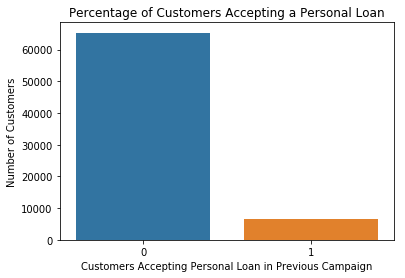

In [132]:
sns.barplot(personal_loan_values.index, personal_loan_values.values)
plt.title("Percentage of Customers Accepting a Personal Loan")
plt.ylabel("Number of Customers")
plt.xlabel("Customers Accepting Personal Loan in Previous Campaign")

not_accepted = (65347/(65347+6407)*100)
accepted = (6407/(65347+6407)*100)
print('accepted', round(accepted,2), '%')
print('not_accepted', round(not_accepted,2), '%')

This bar plot shows the percentage of people who were offered and accepted the personal loan in the previous campaign and the percentage of people who weren't offered a loan in the previous campaign. This corresponds to  8.93% and 91.07% respectively. 

We can see that there are clear class imbalance problems in our data. We will deal with this by applying the class_weight = 'balanced' technique to our training data set before we begin to produce our models.

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


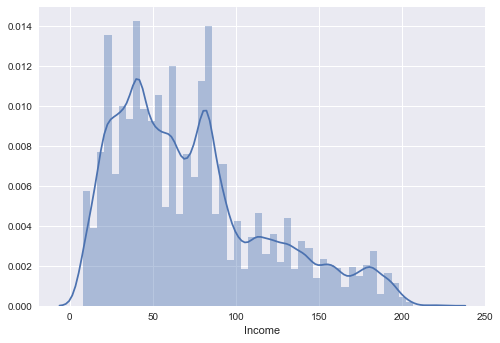

In [240]:
sns.distplot(bank_cali_merge_new.Income)

We can see that our income skews to the right

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


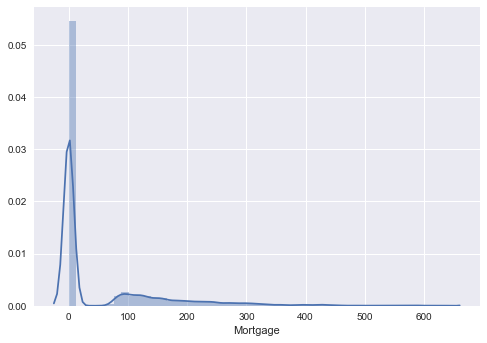

In [241]:
sns.distplot(bank_cali_merge_new.Mortgage)

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


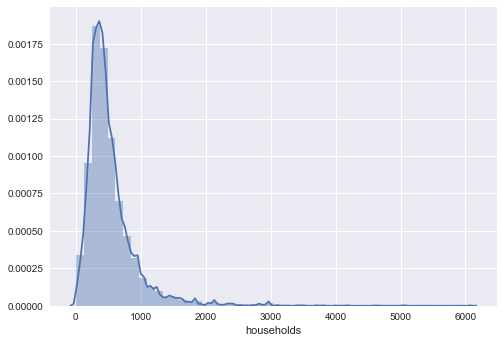

In [242]:
sns.distplot(bank_cali_merge_new.households)

Our mortgage also skews very heavily to the right. If we got rid of our outliers we would have ended up getting rid of a lot of our data.

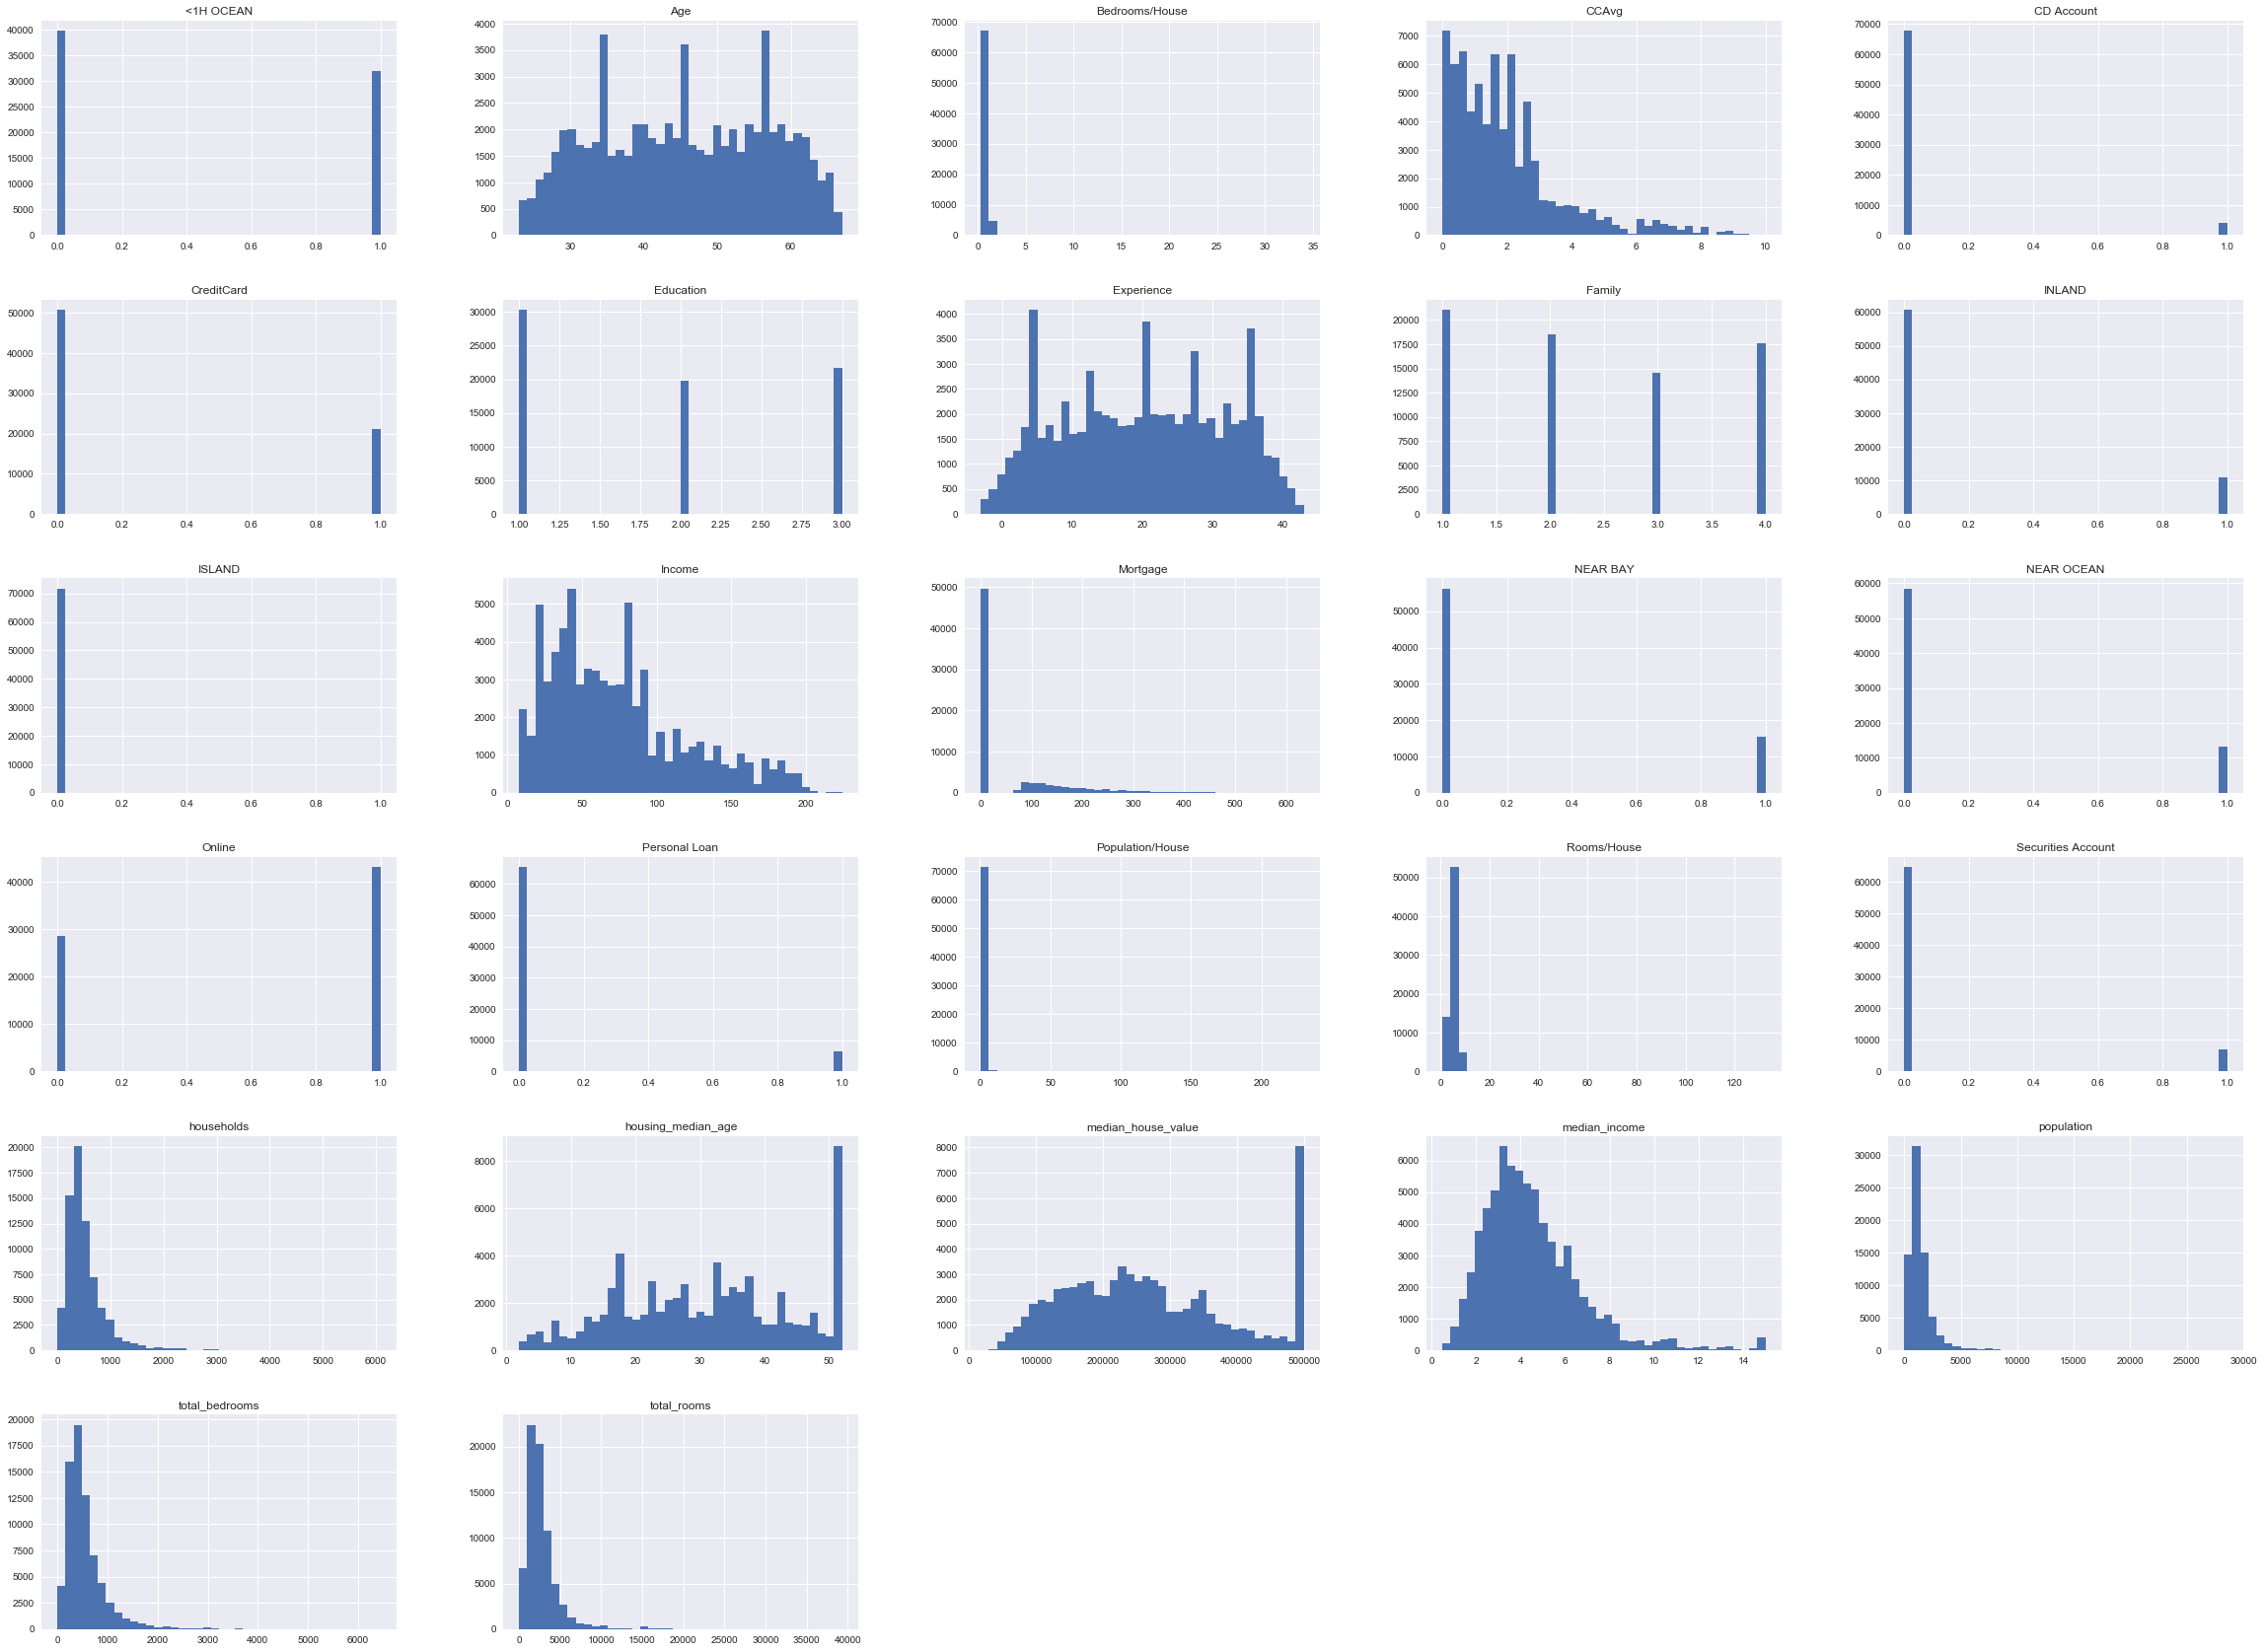

In [275]:
bank_cali_merge_new.hist(bins = 40, figsize = (40,30))
plt.show()

After producing both our distplots for income and mortgage we can see that both sets of data skew to the right

In [276]:
#Converting our column names into a list

list_index = list(bank_cali_merge_new.columns)

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`mat

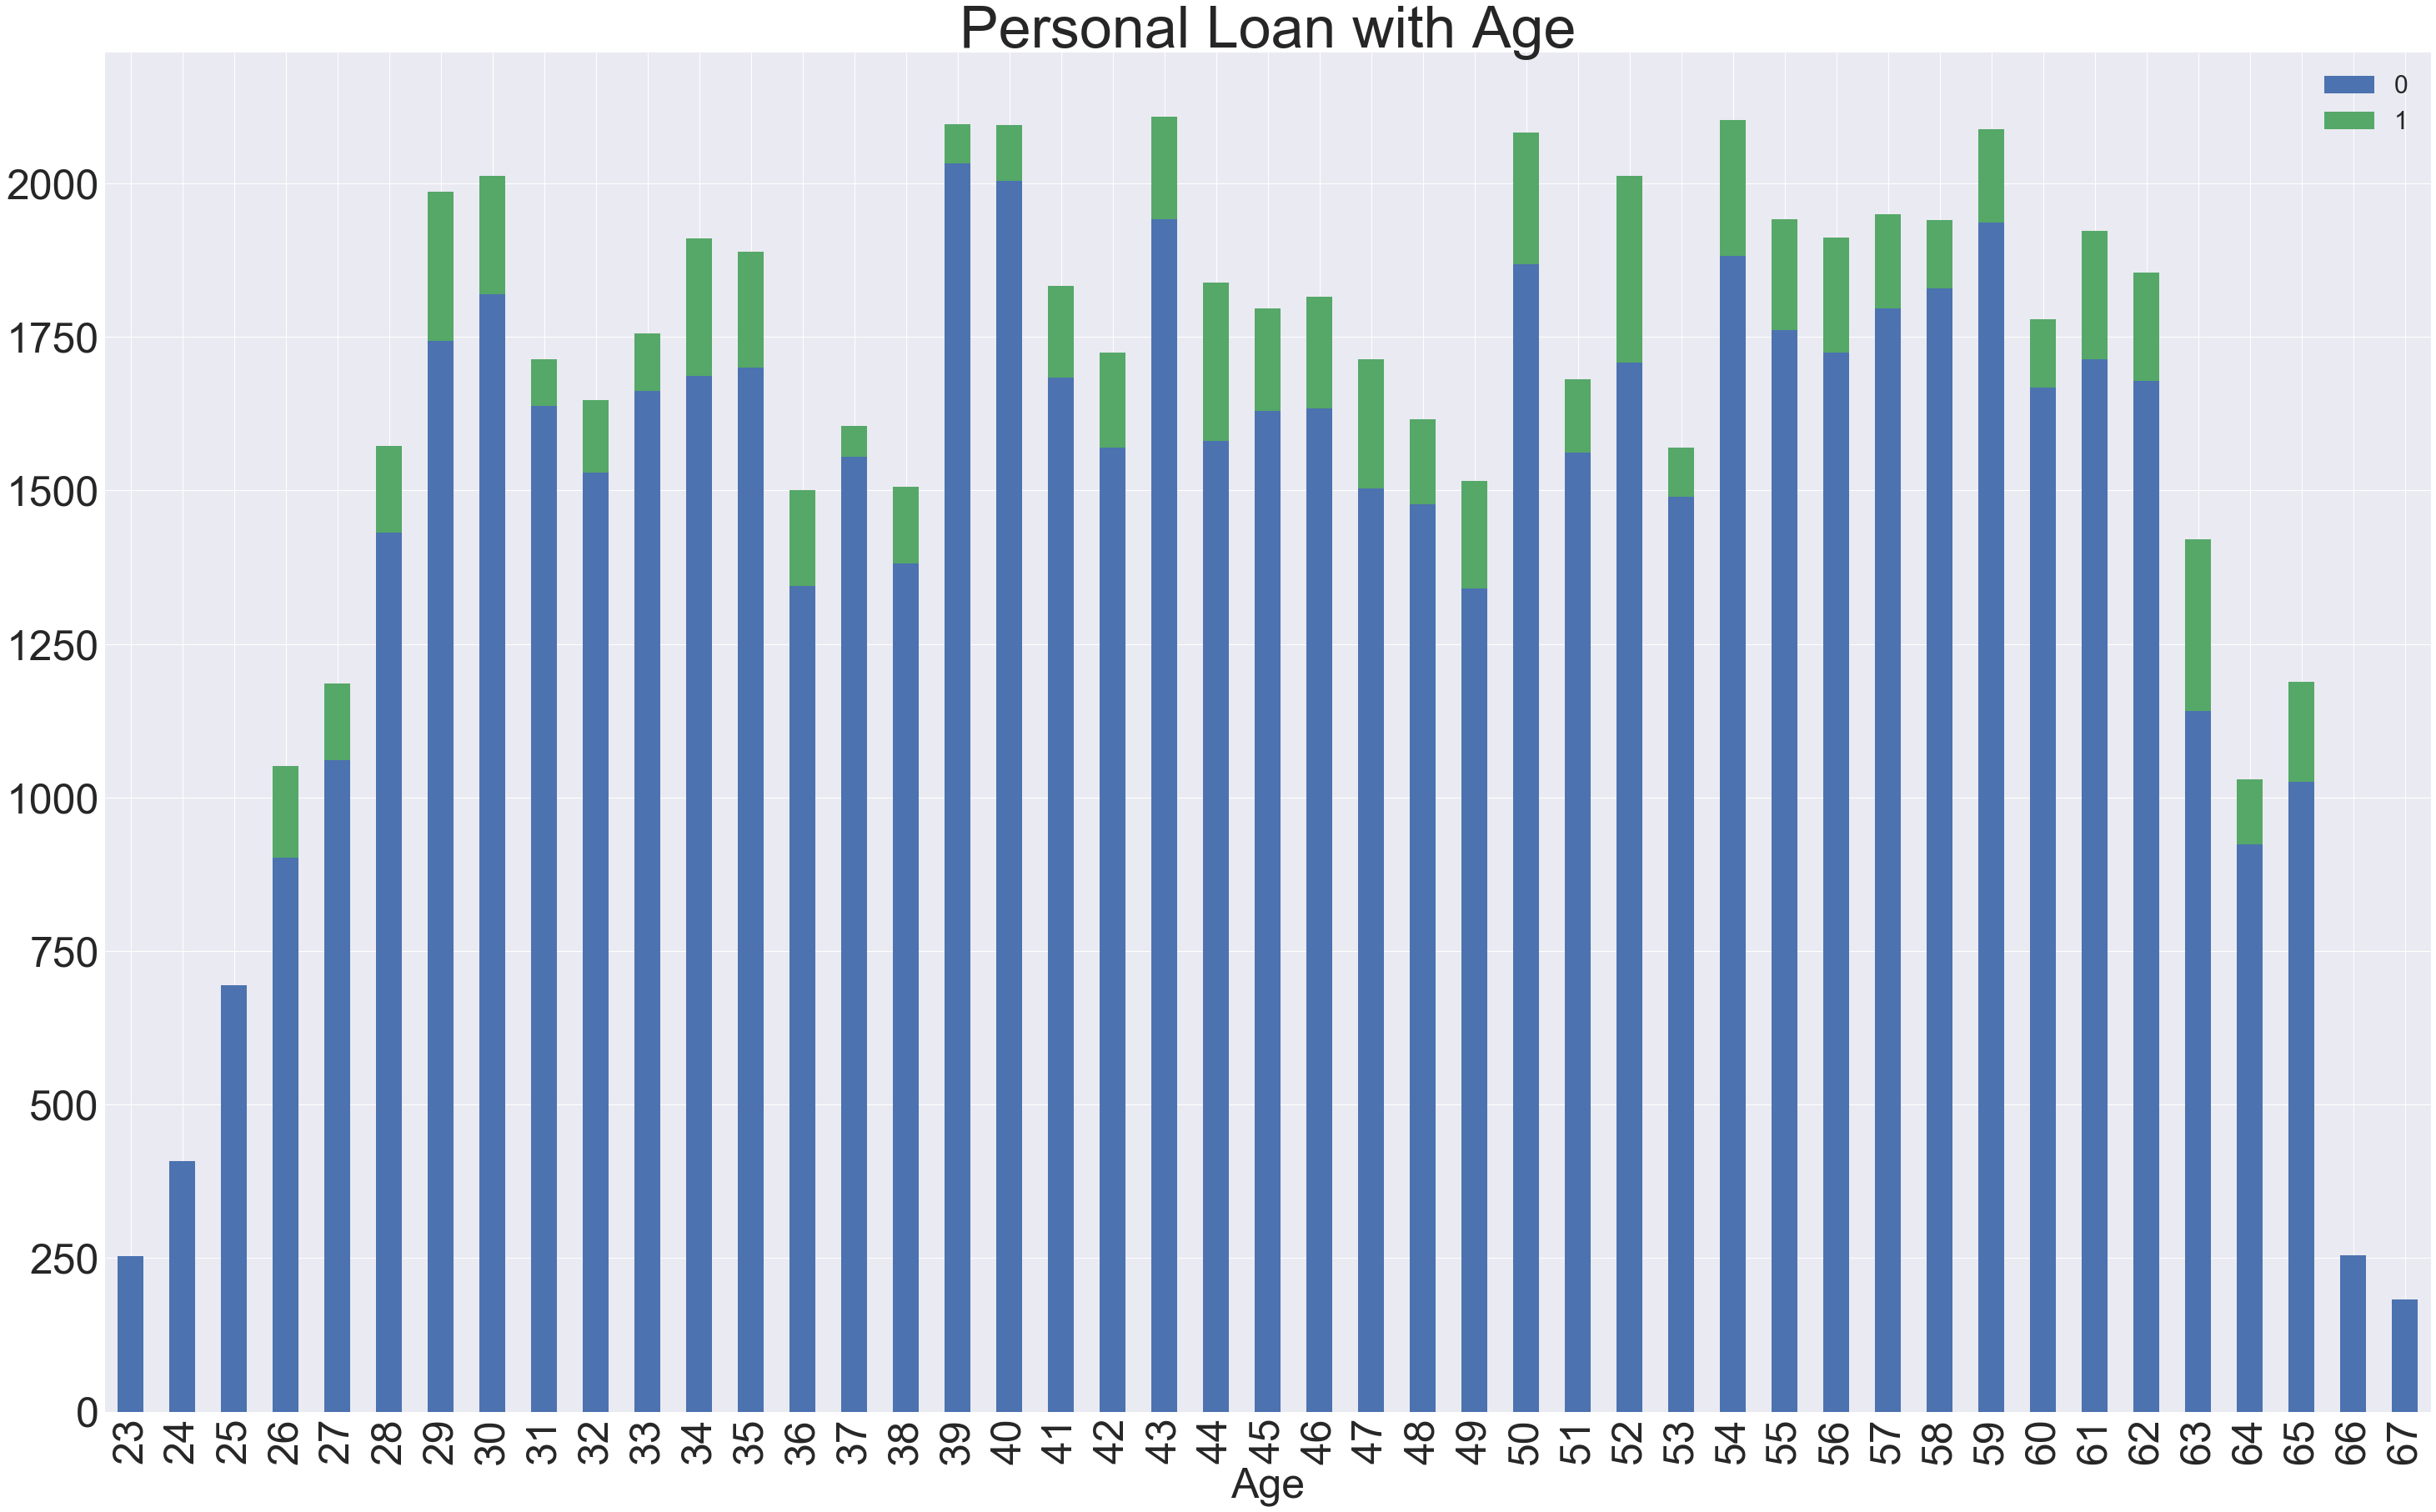

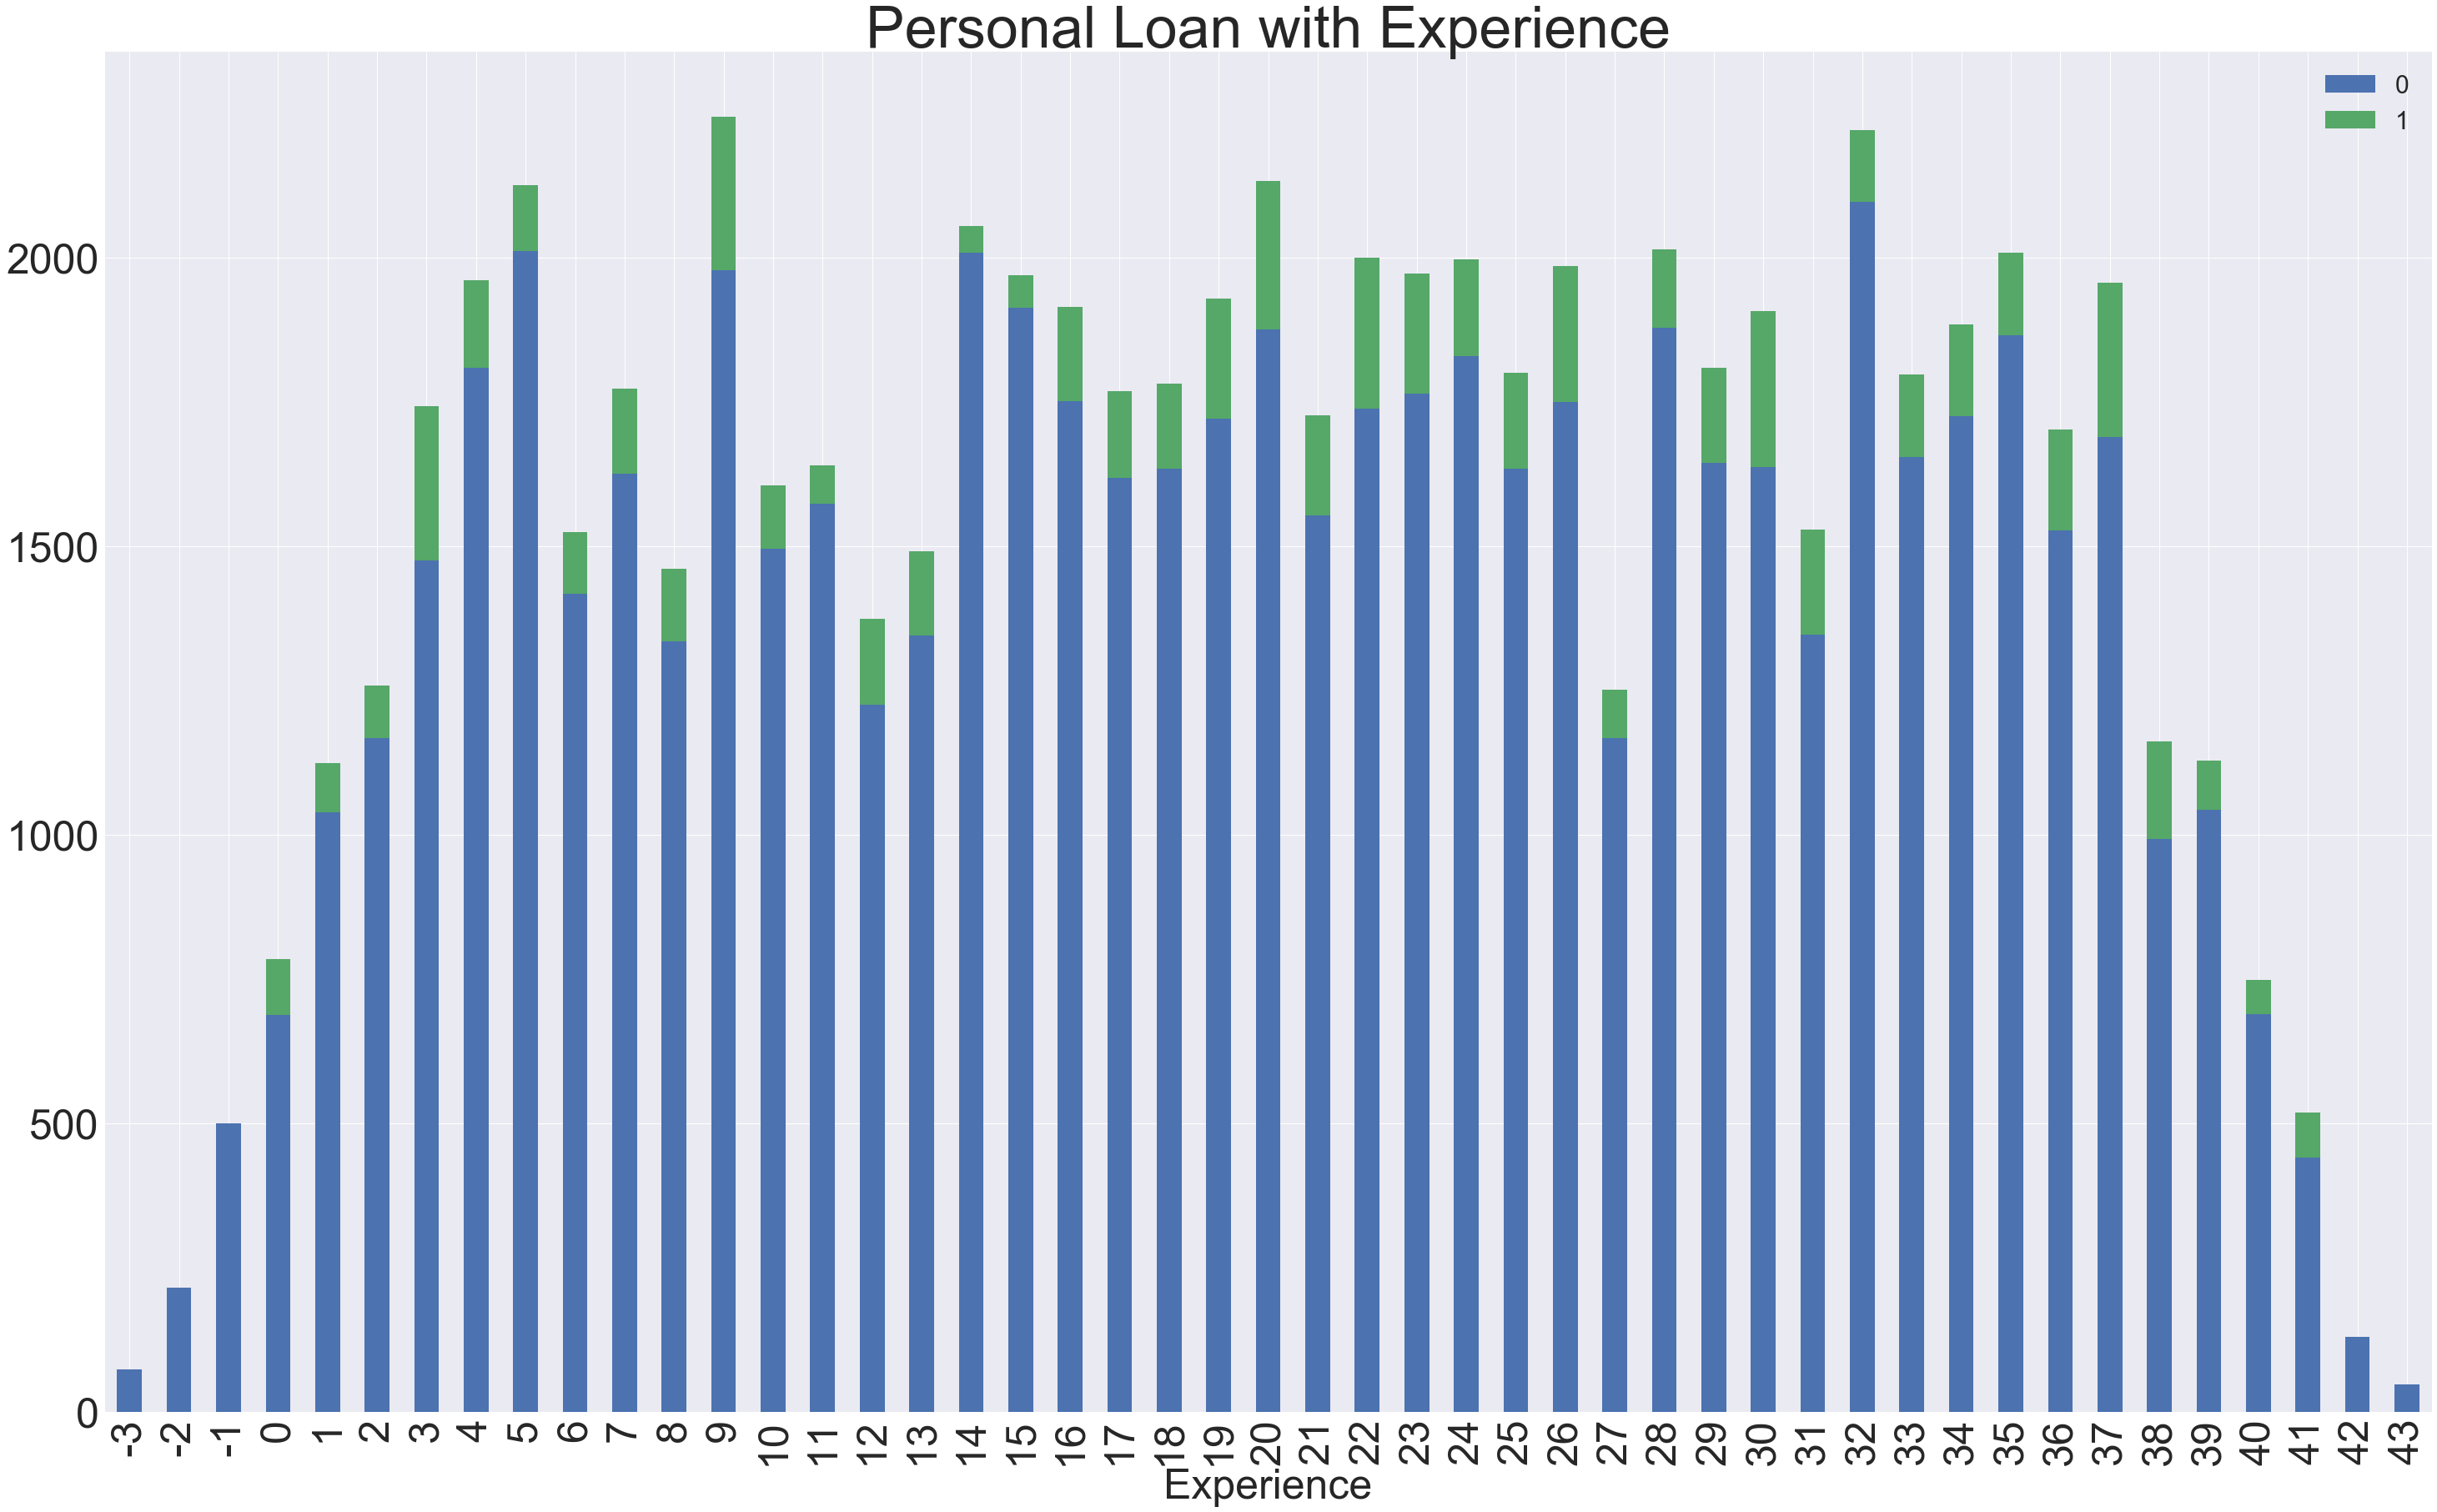

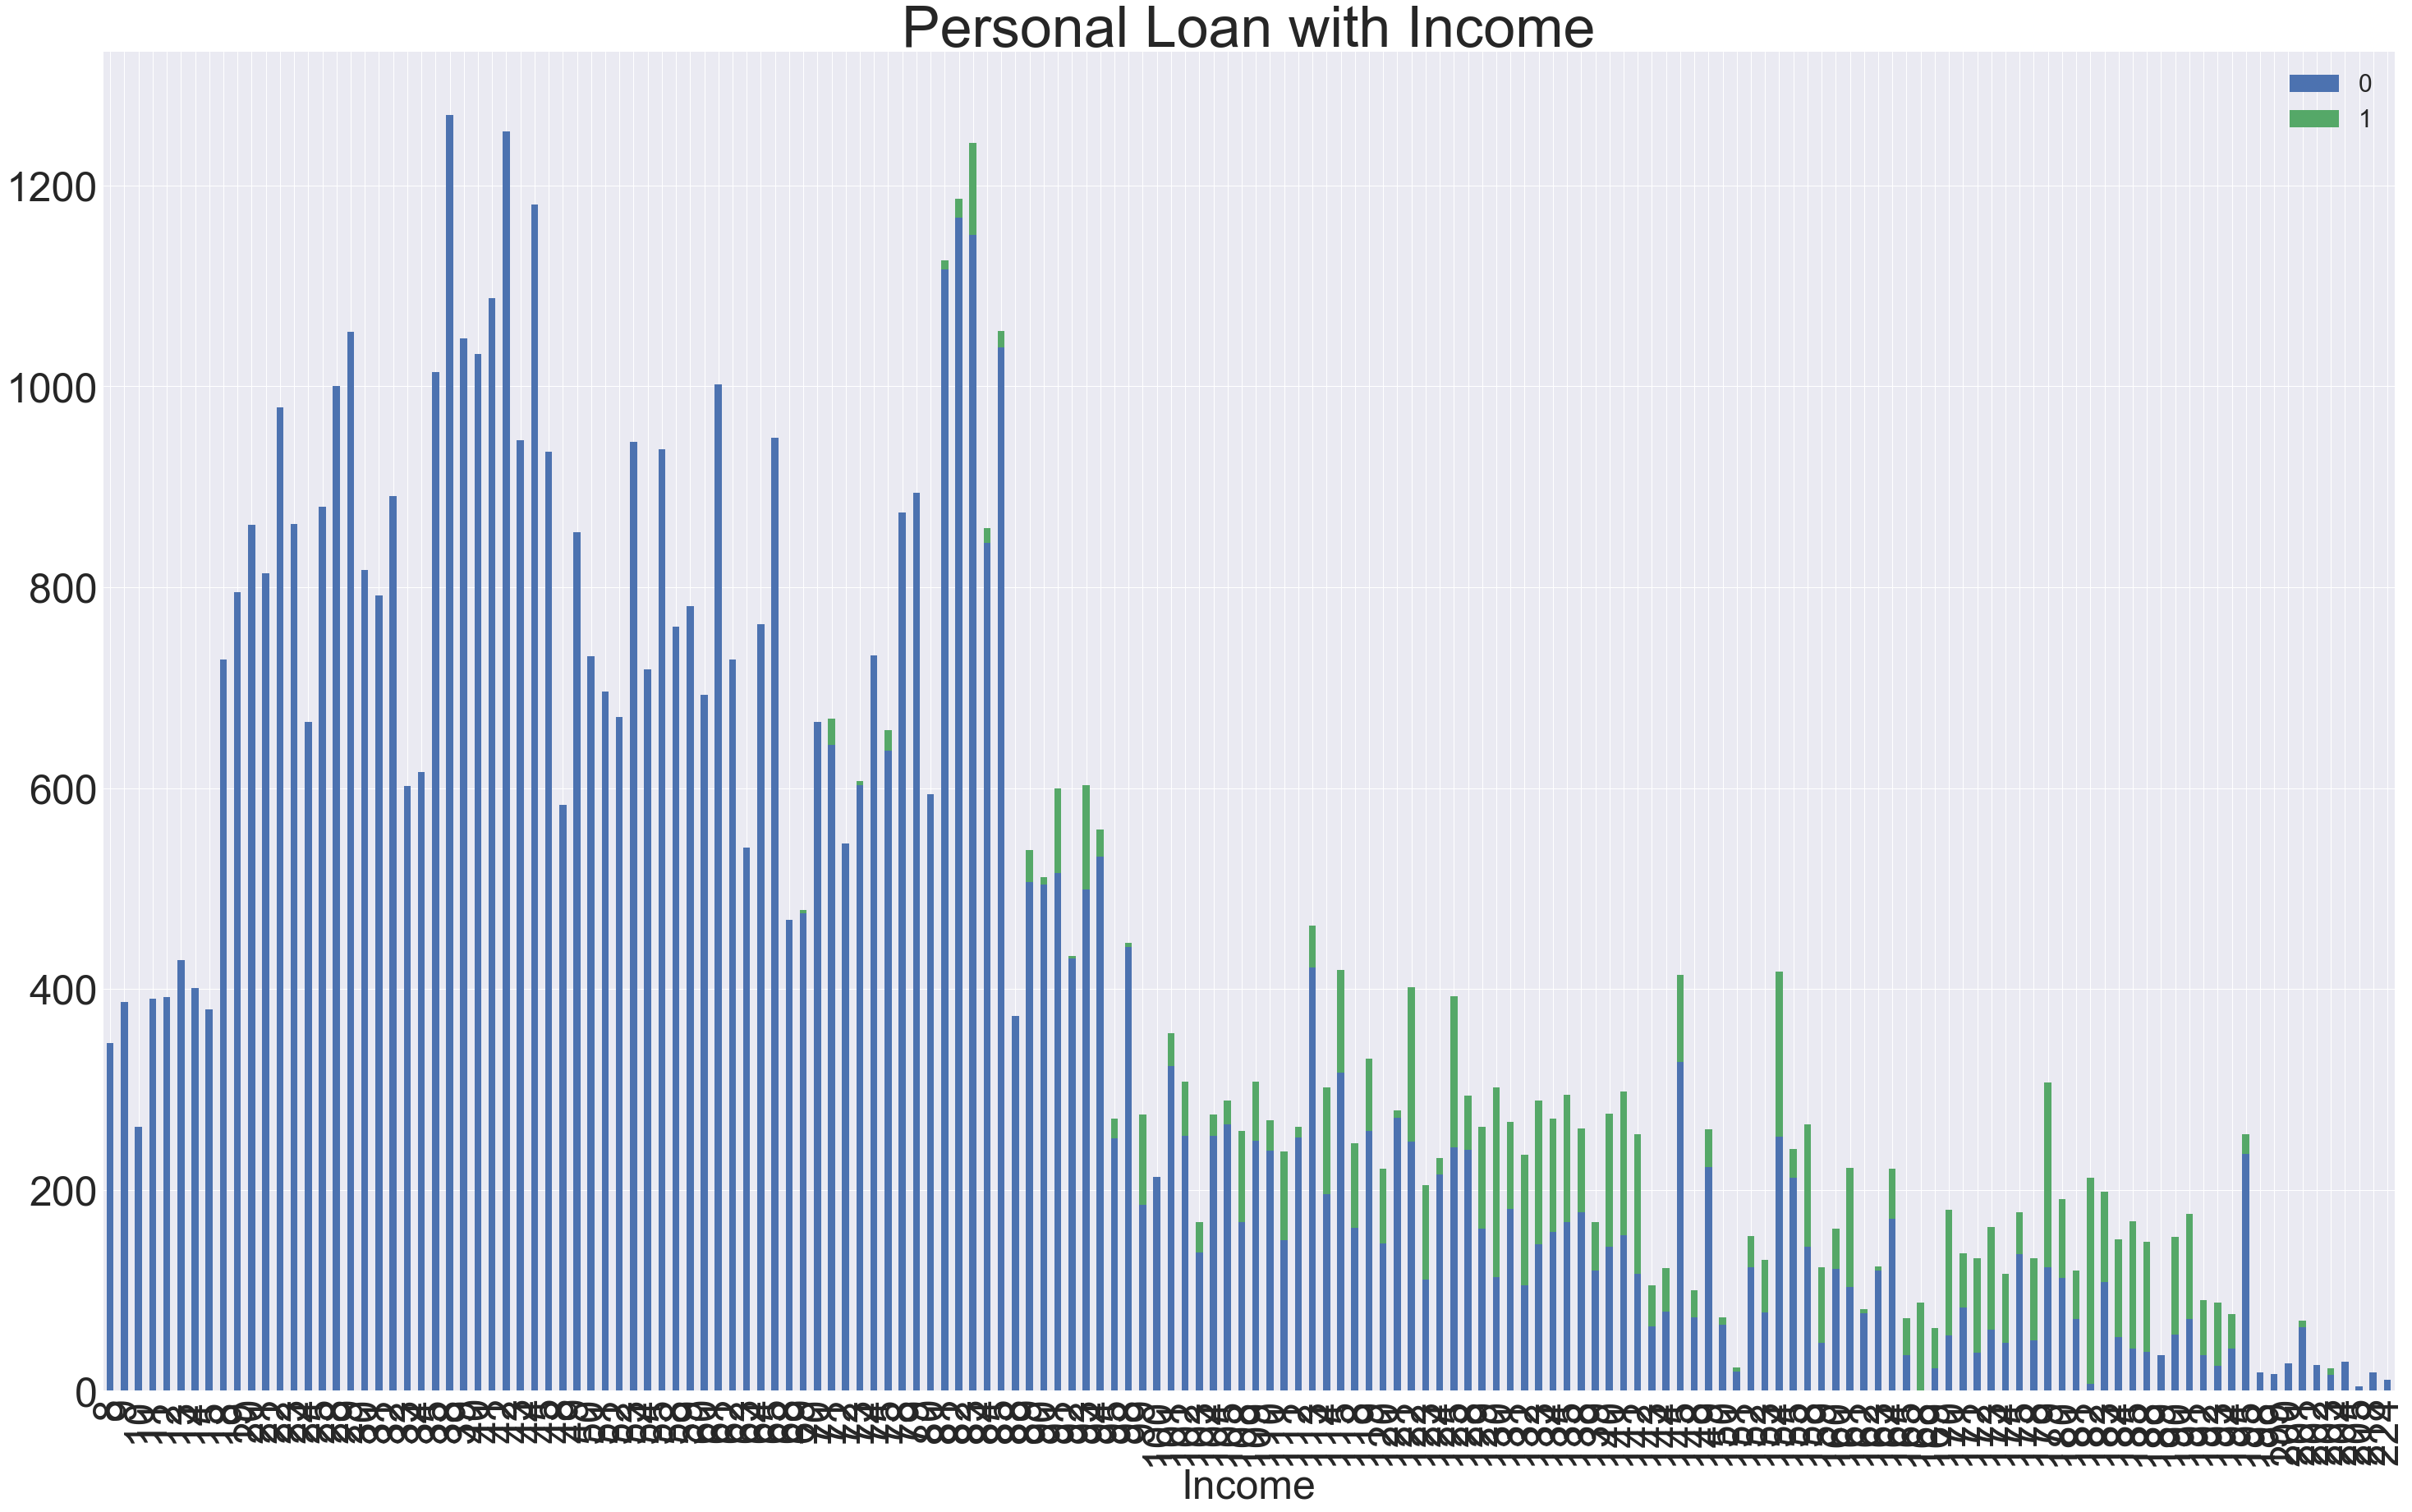

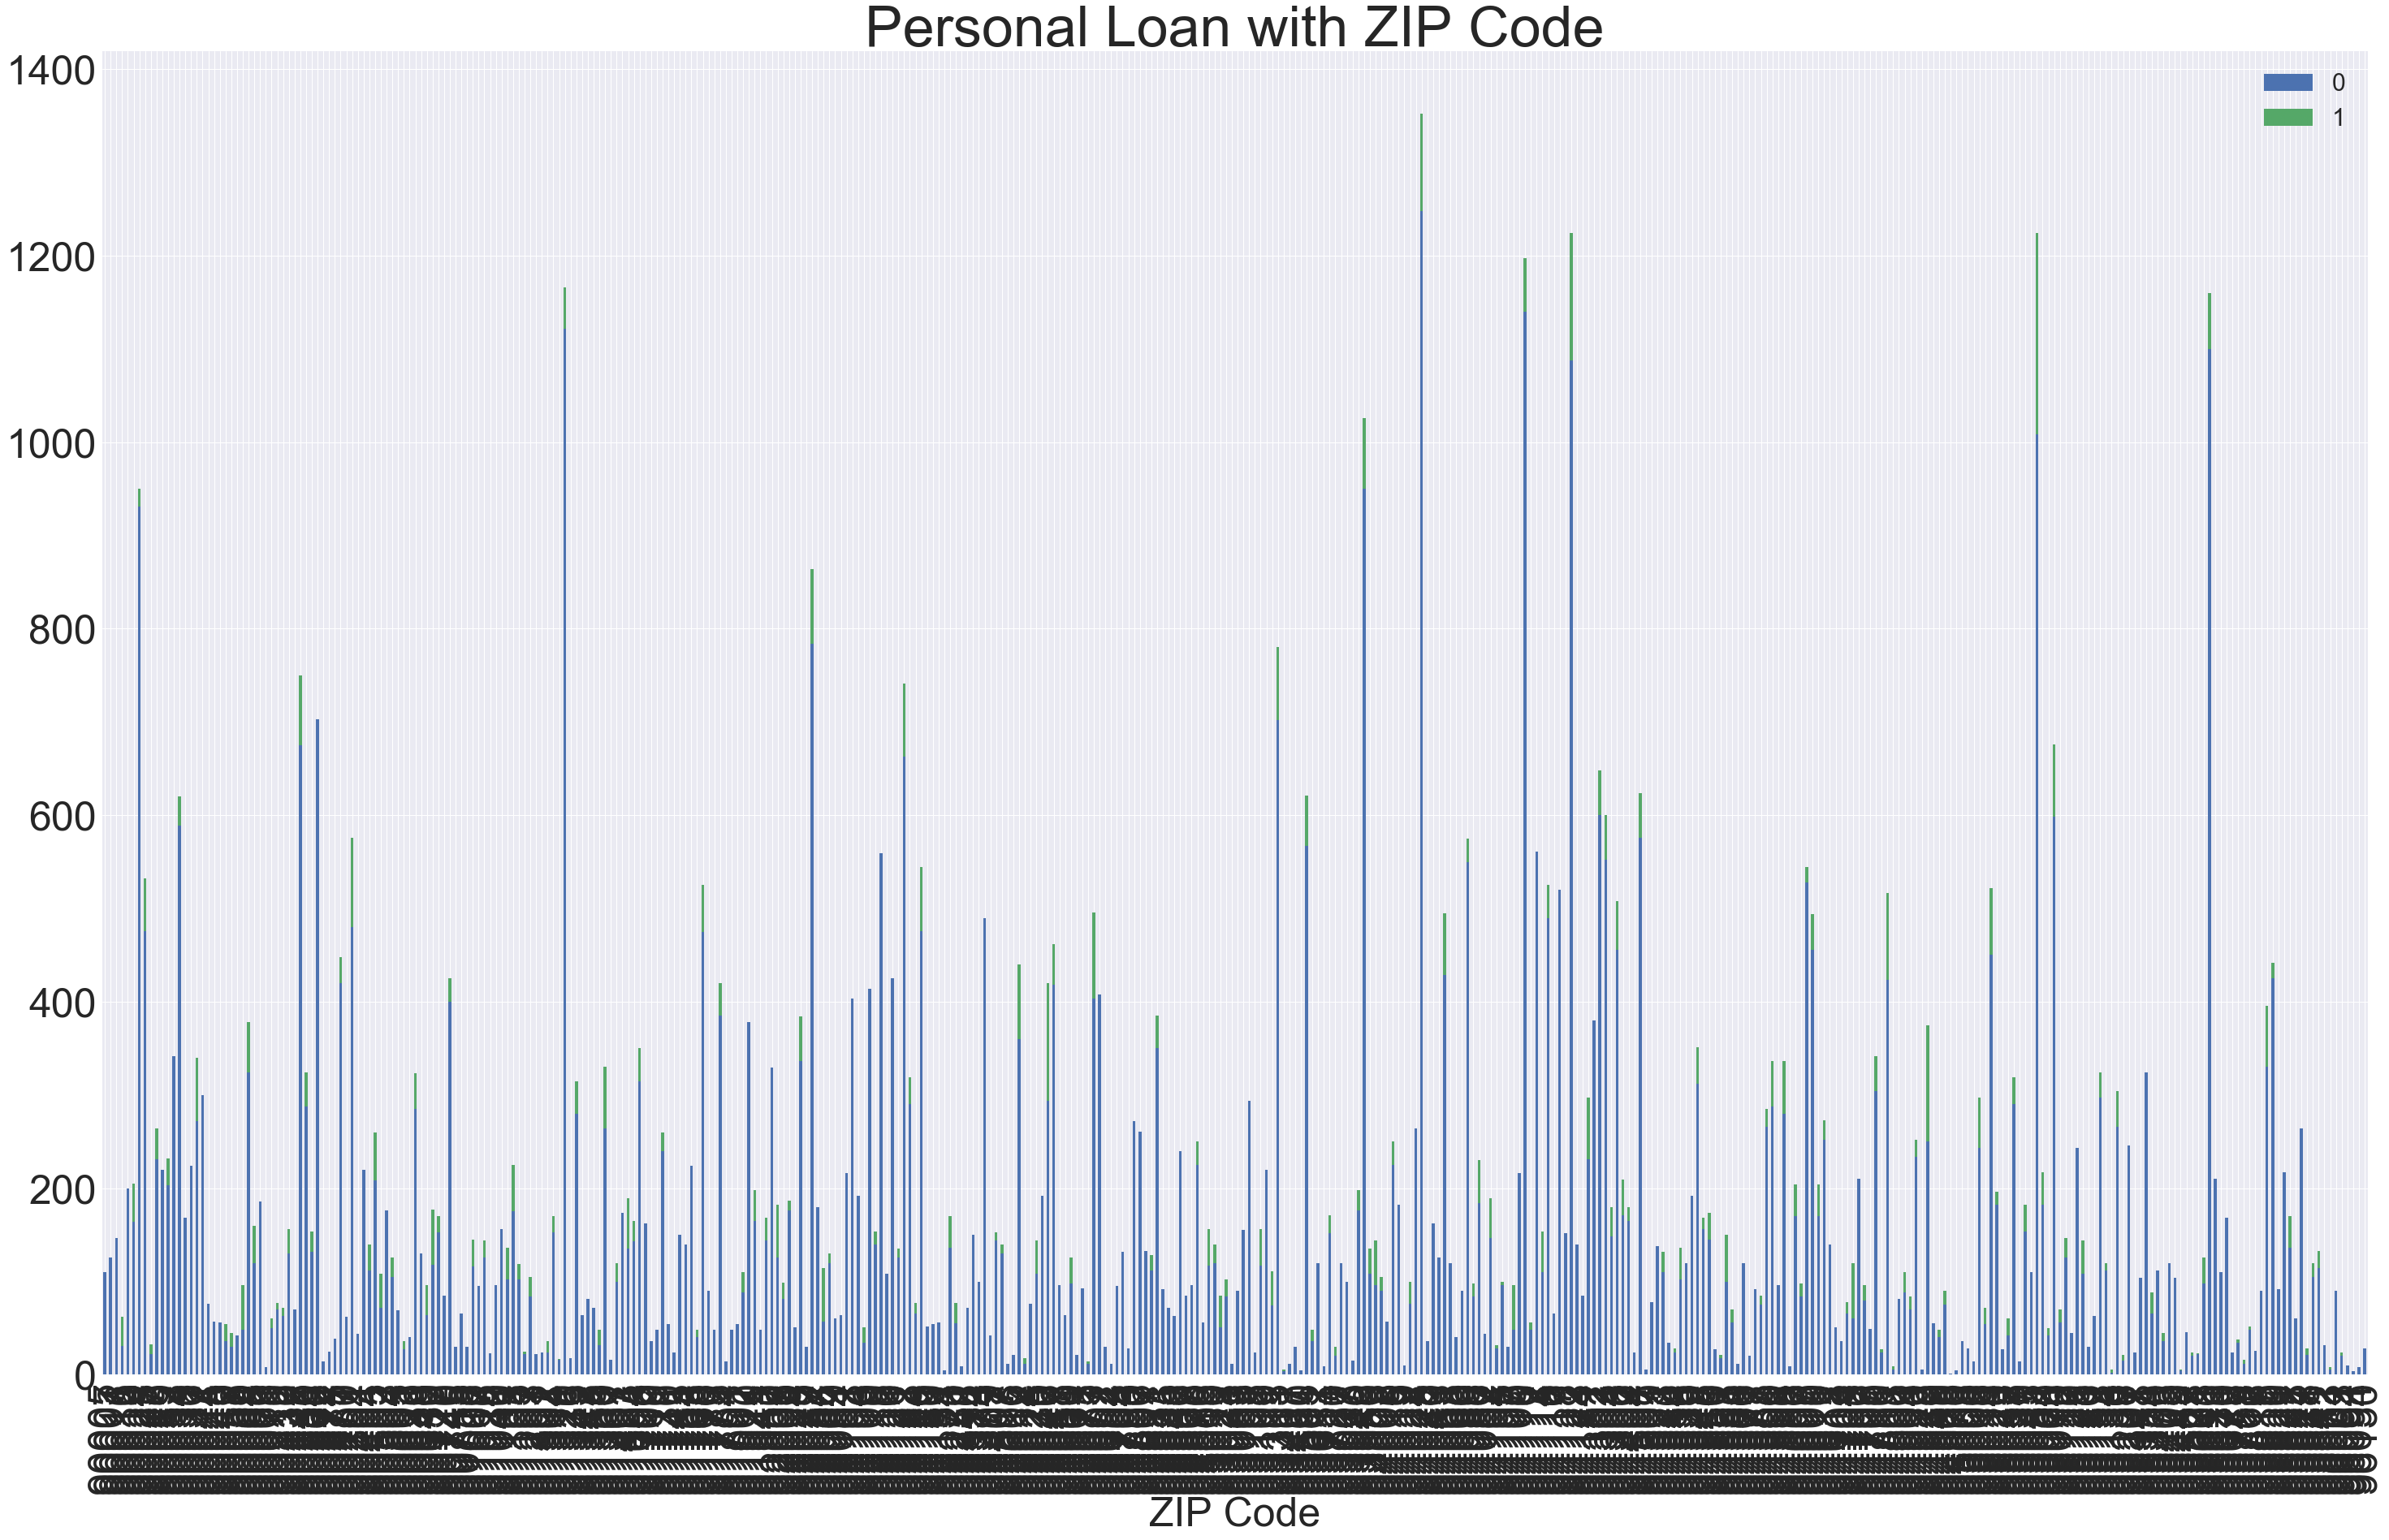

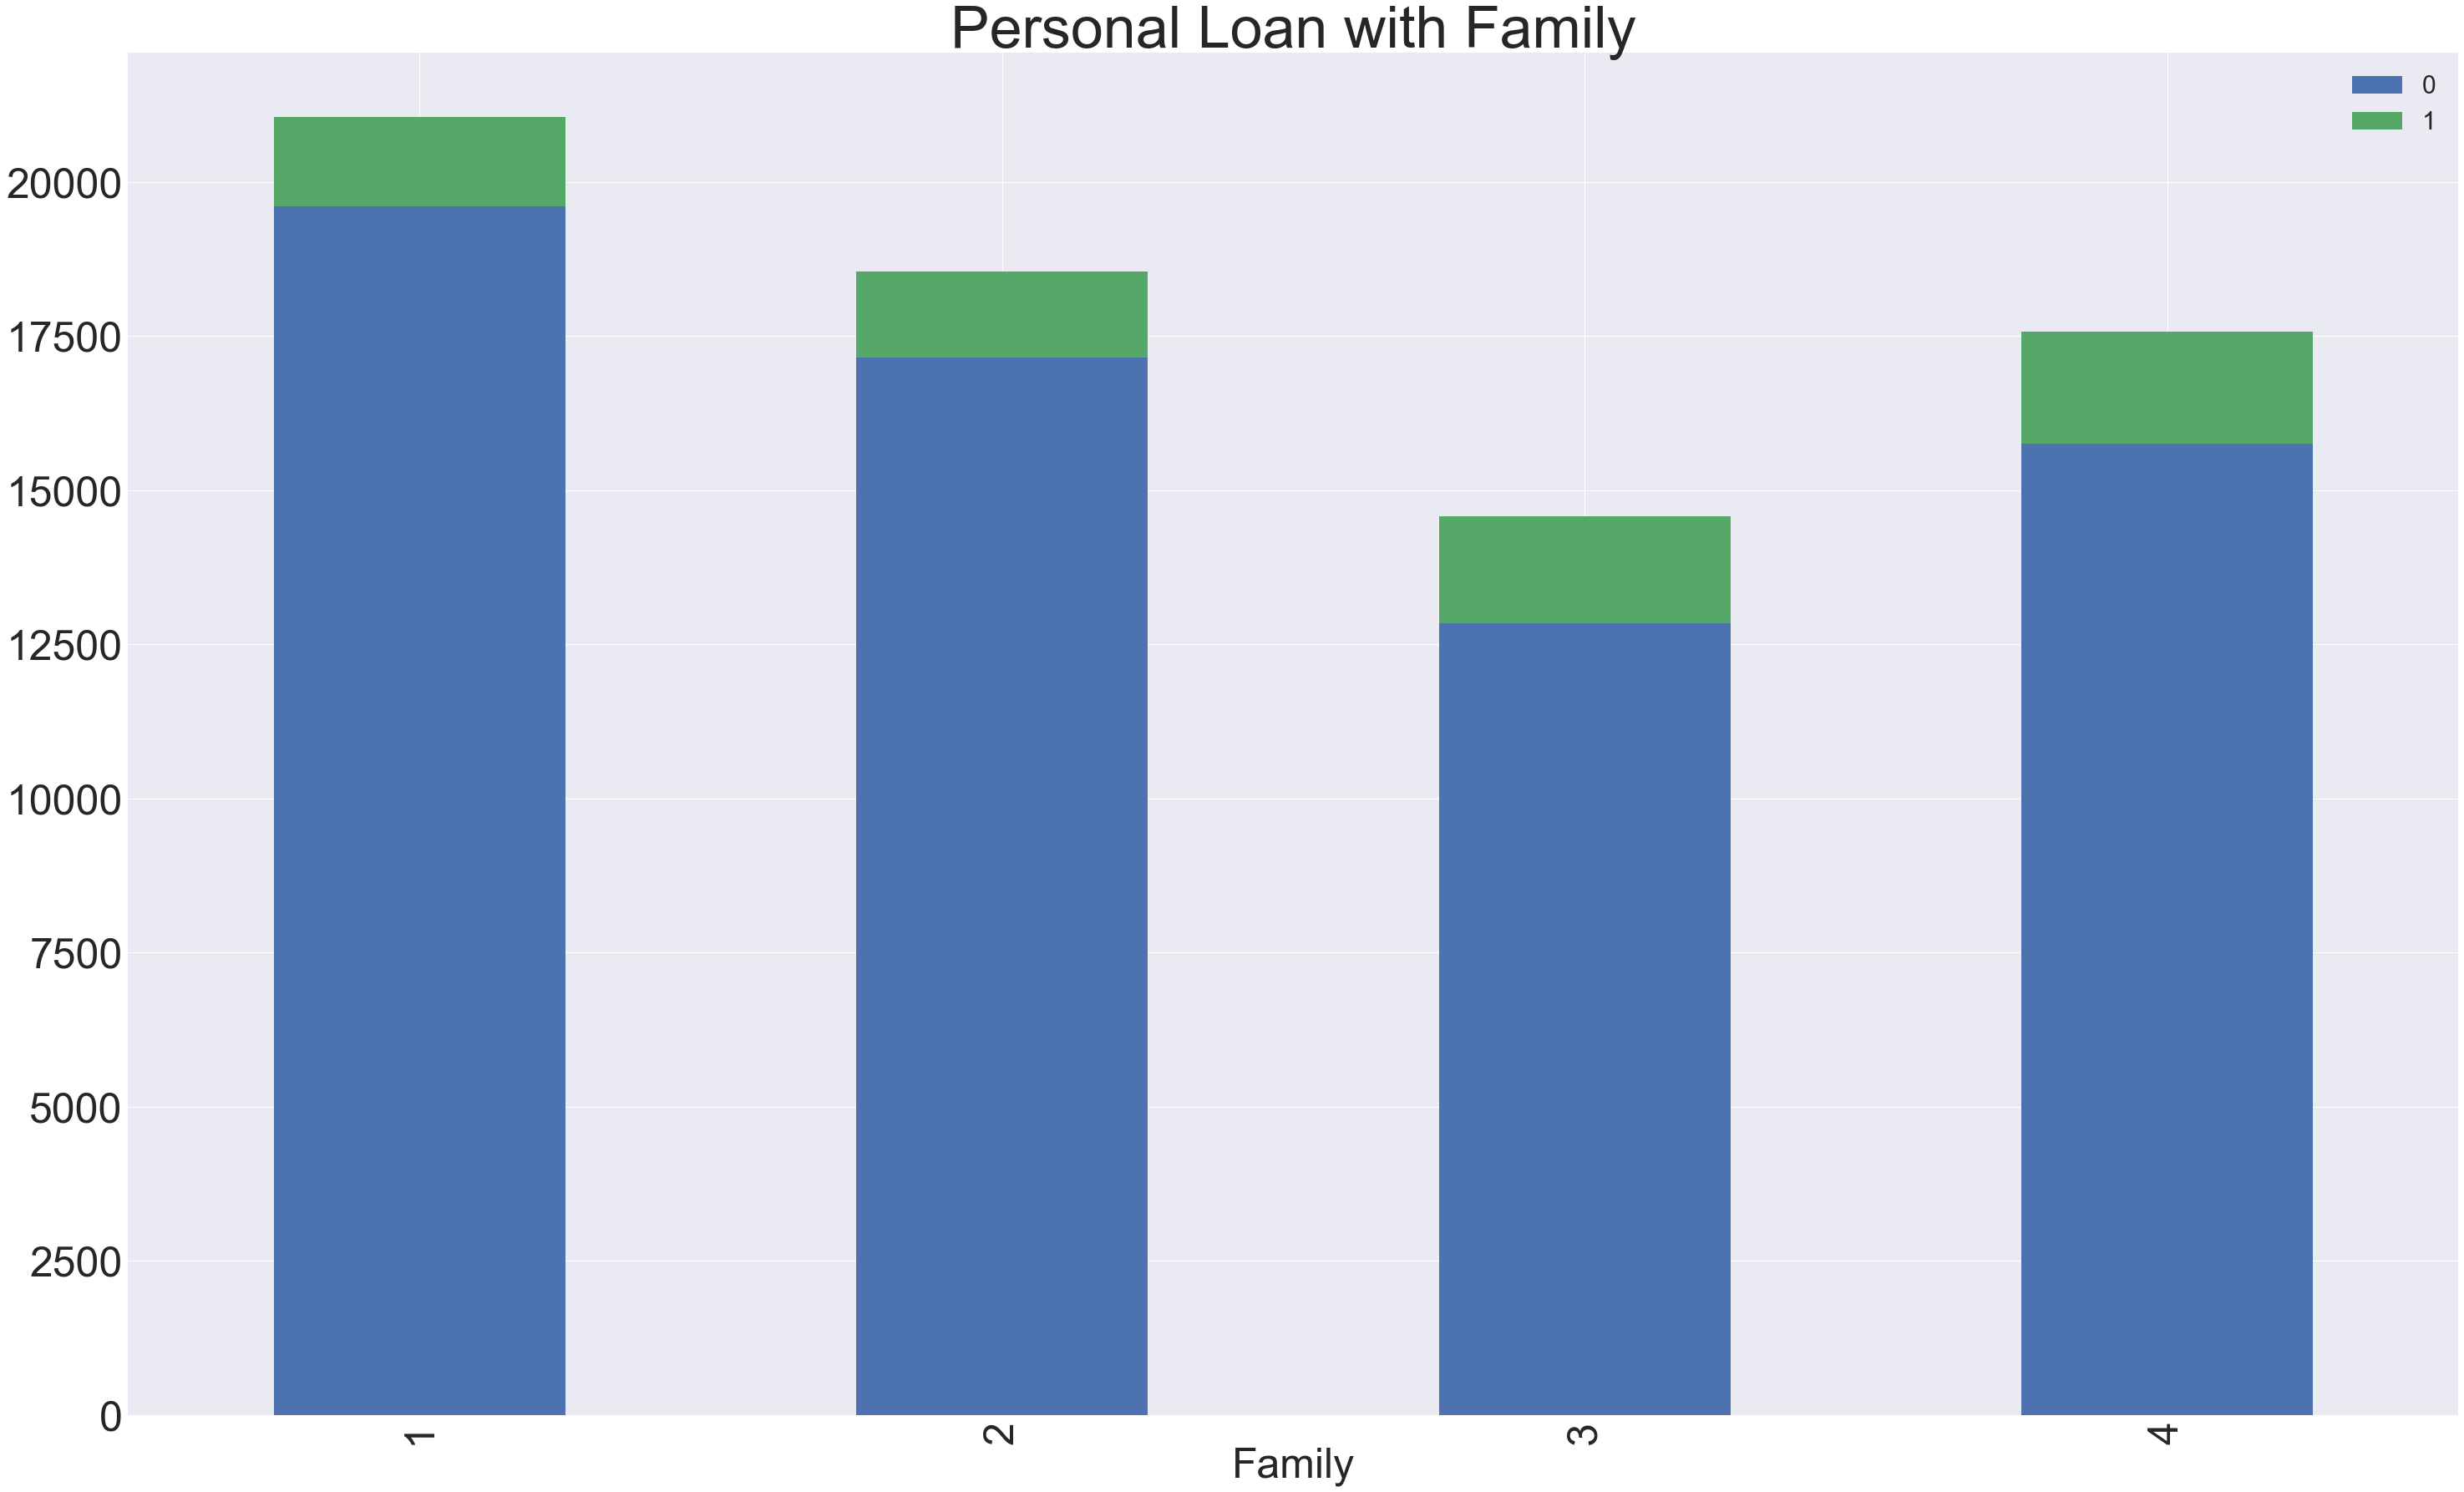

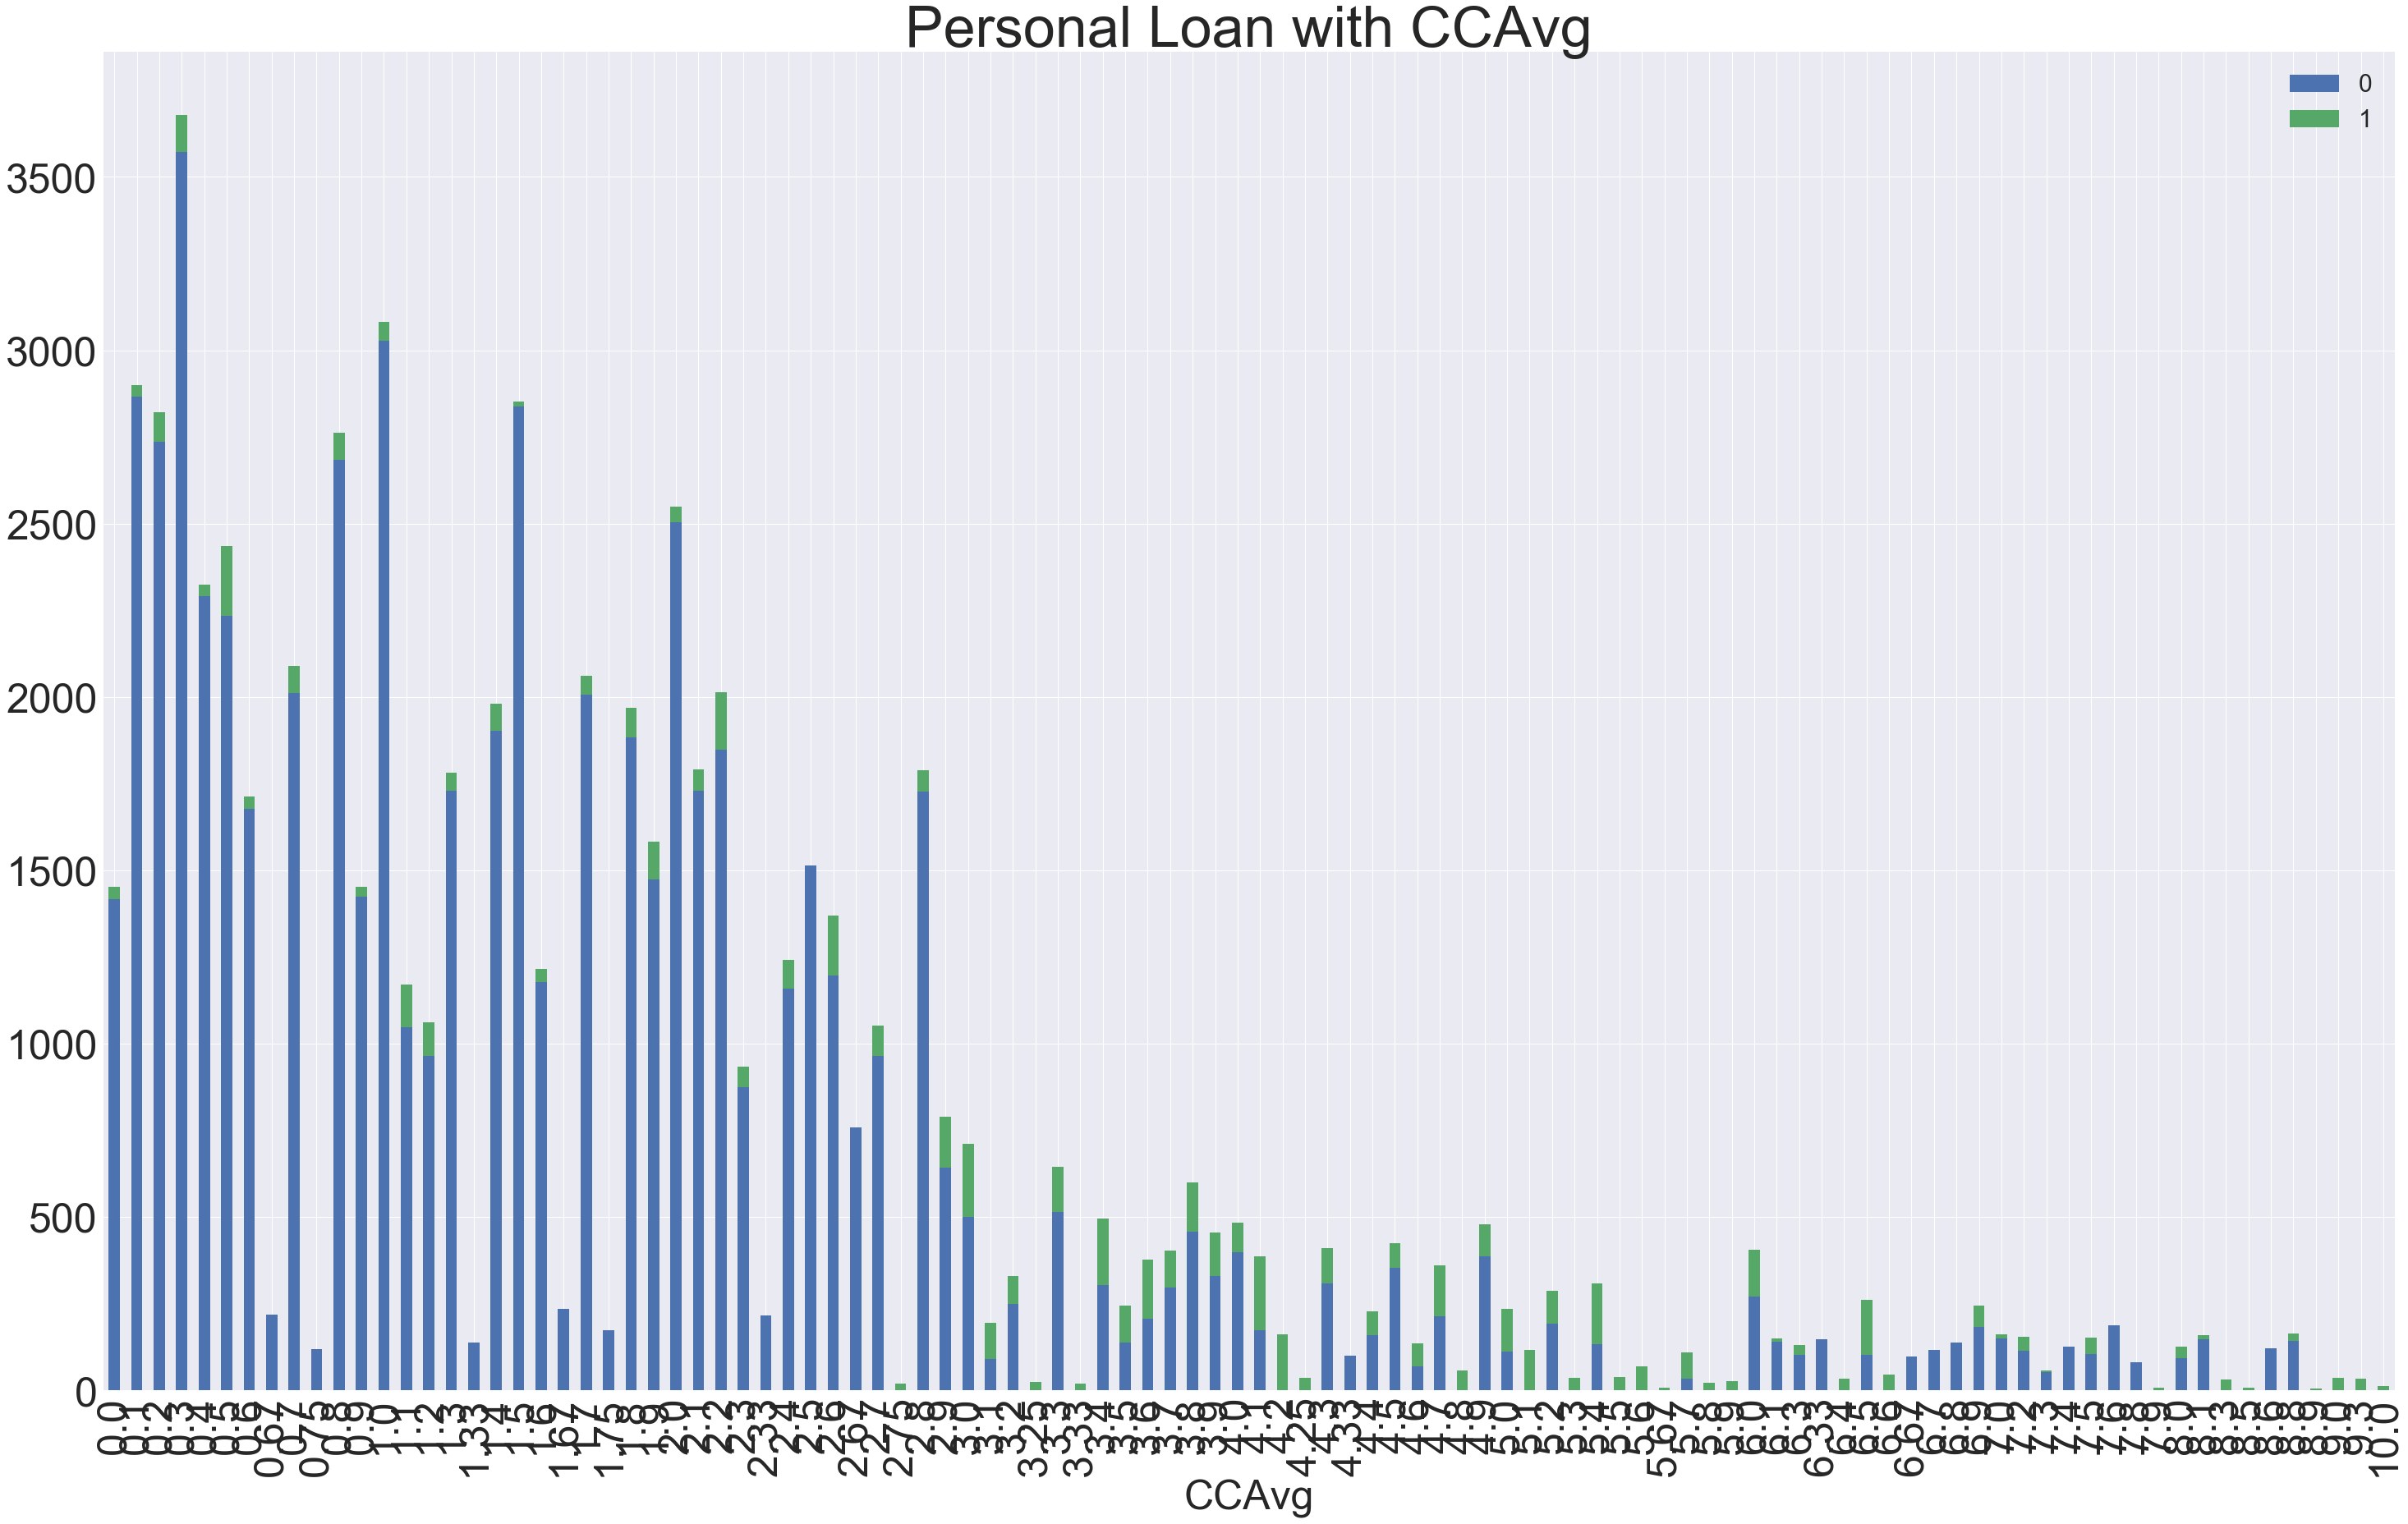

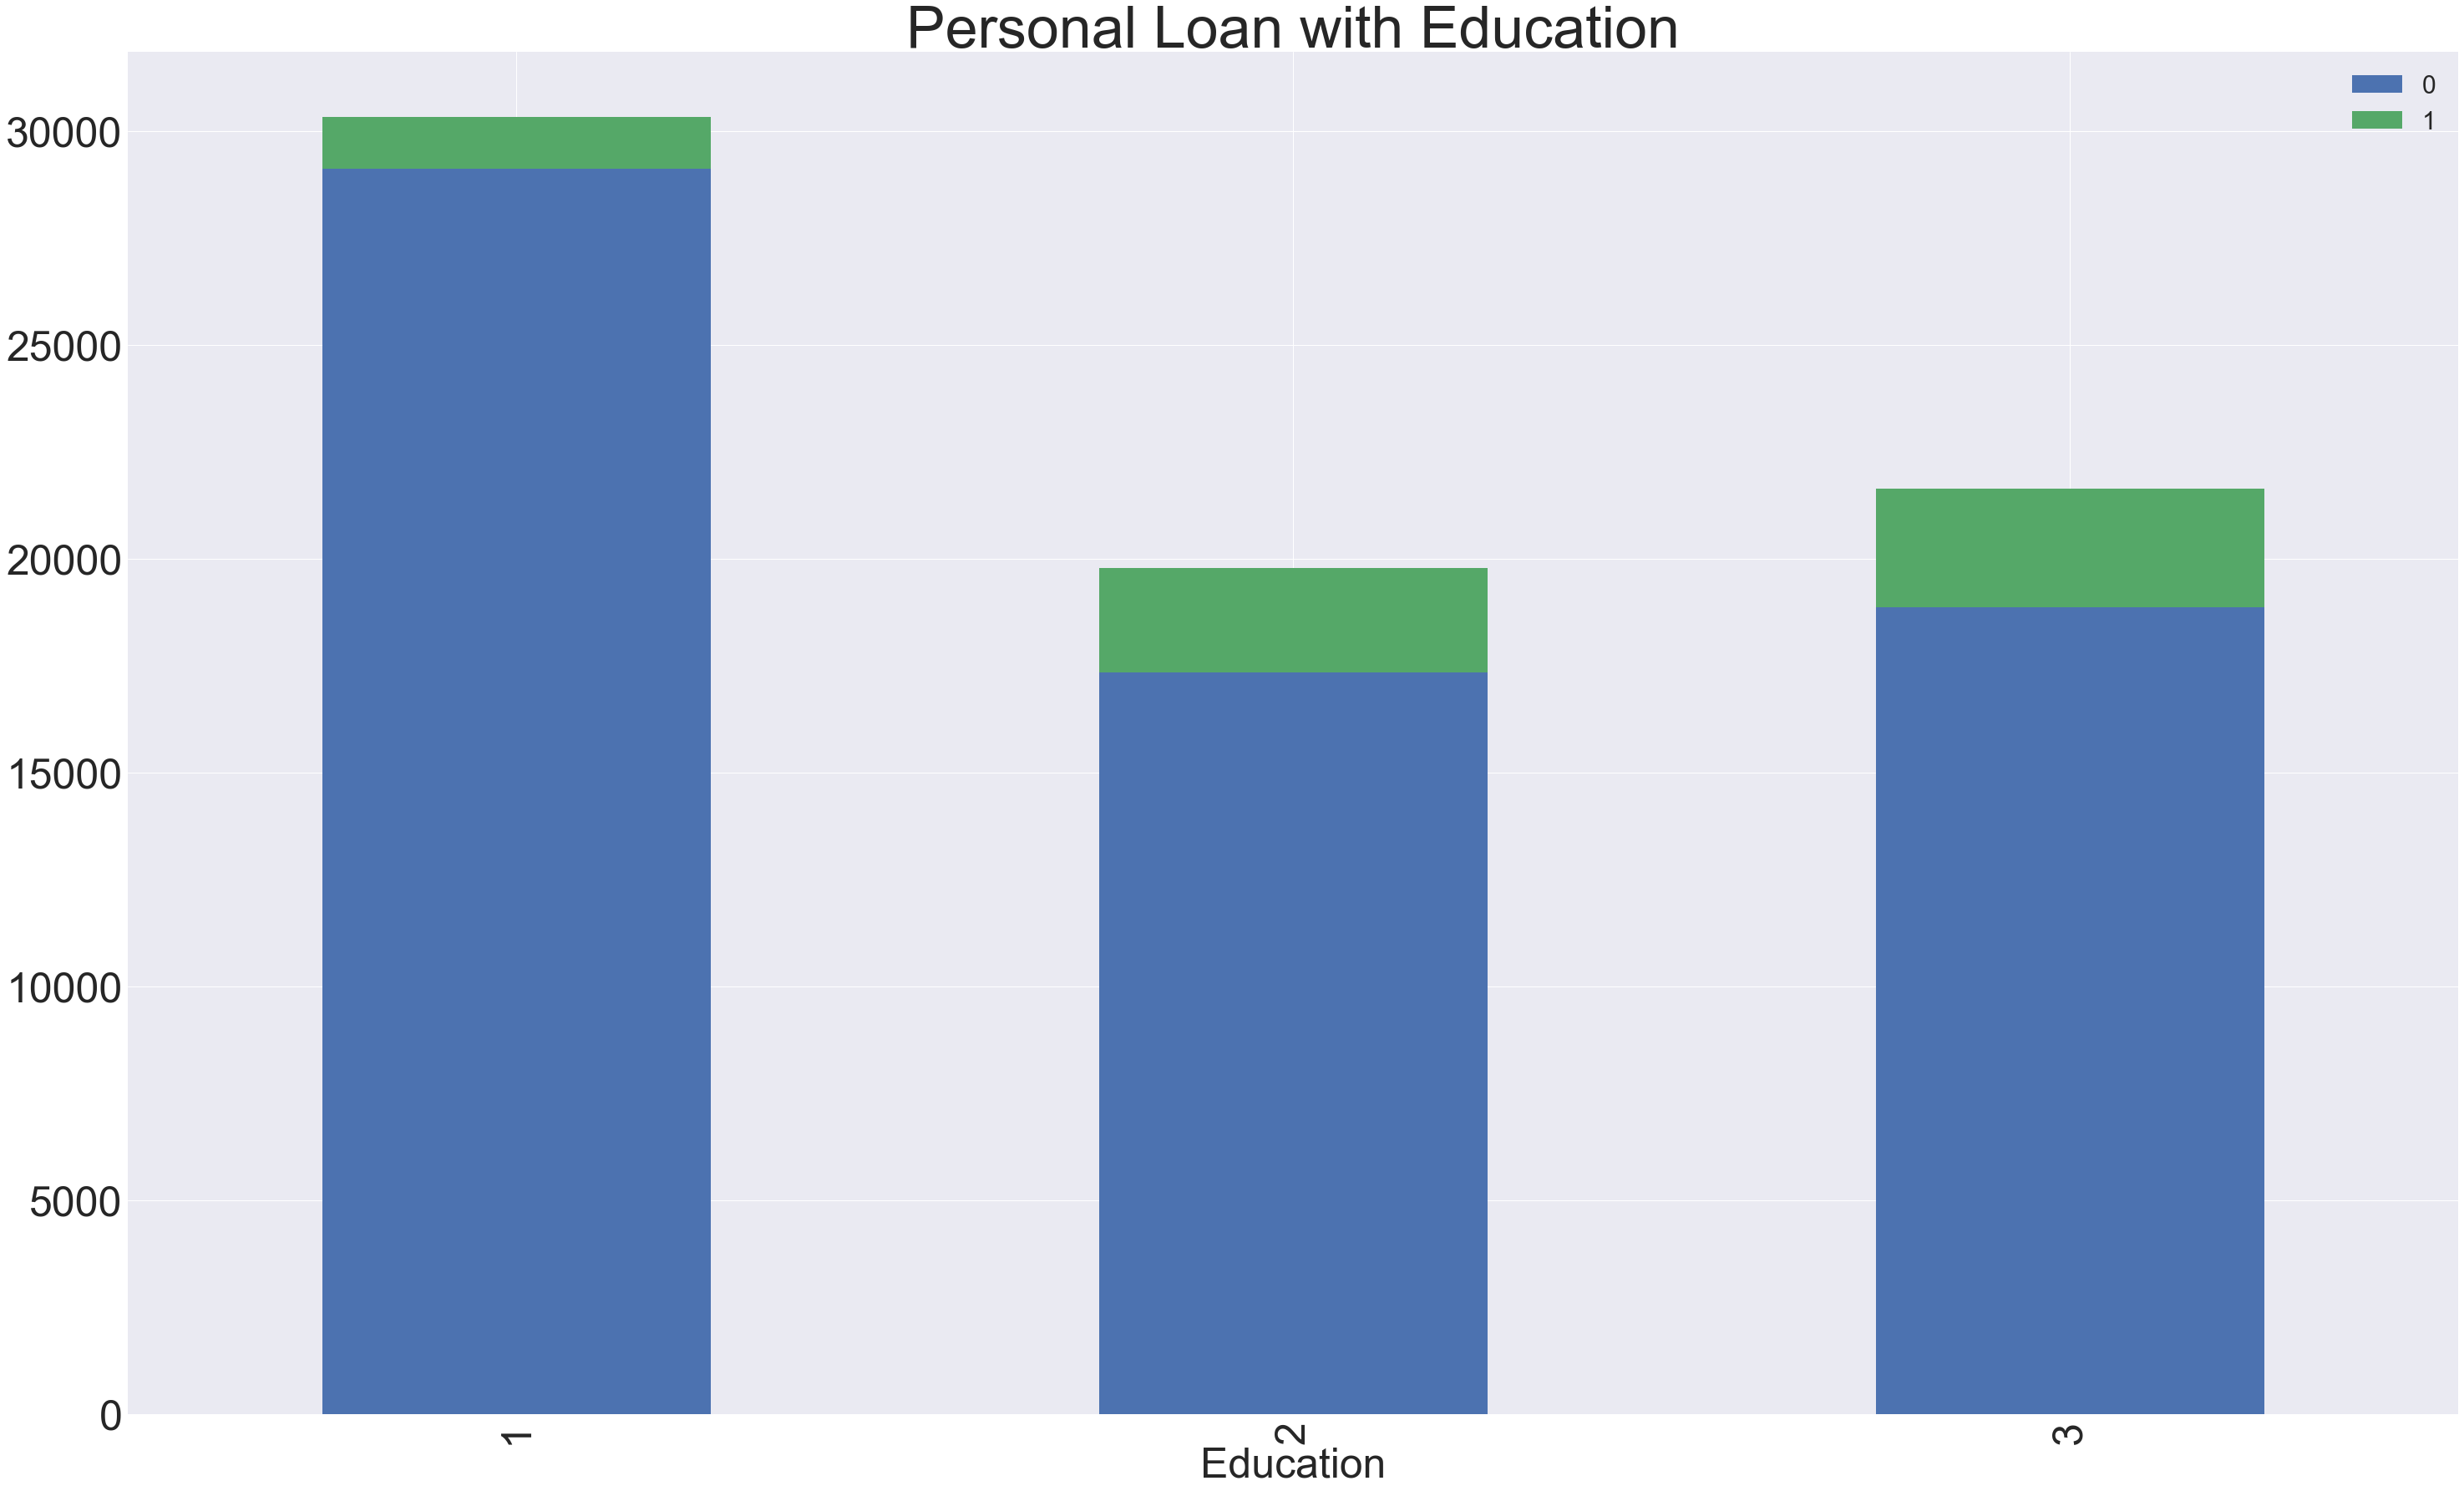

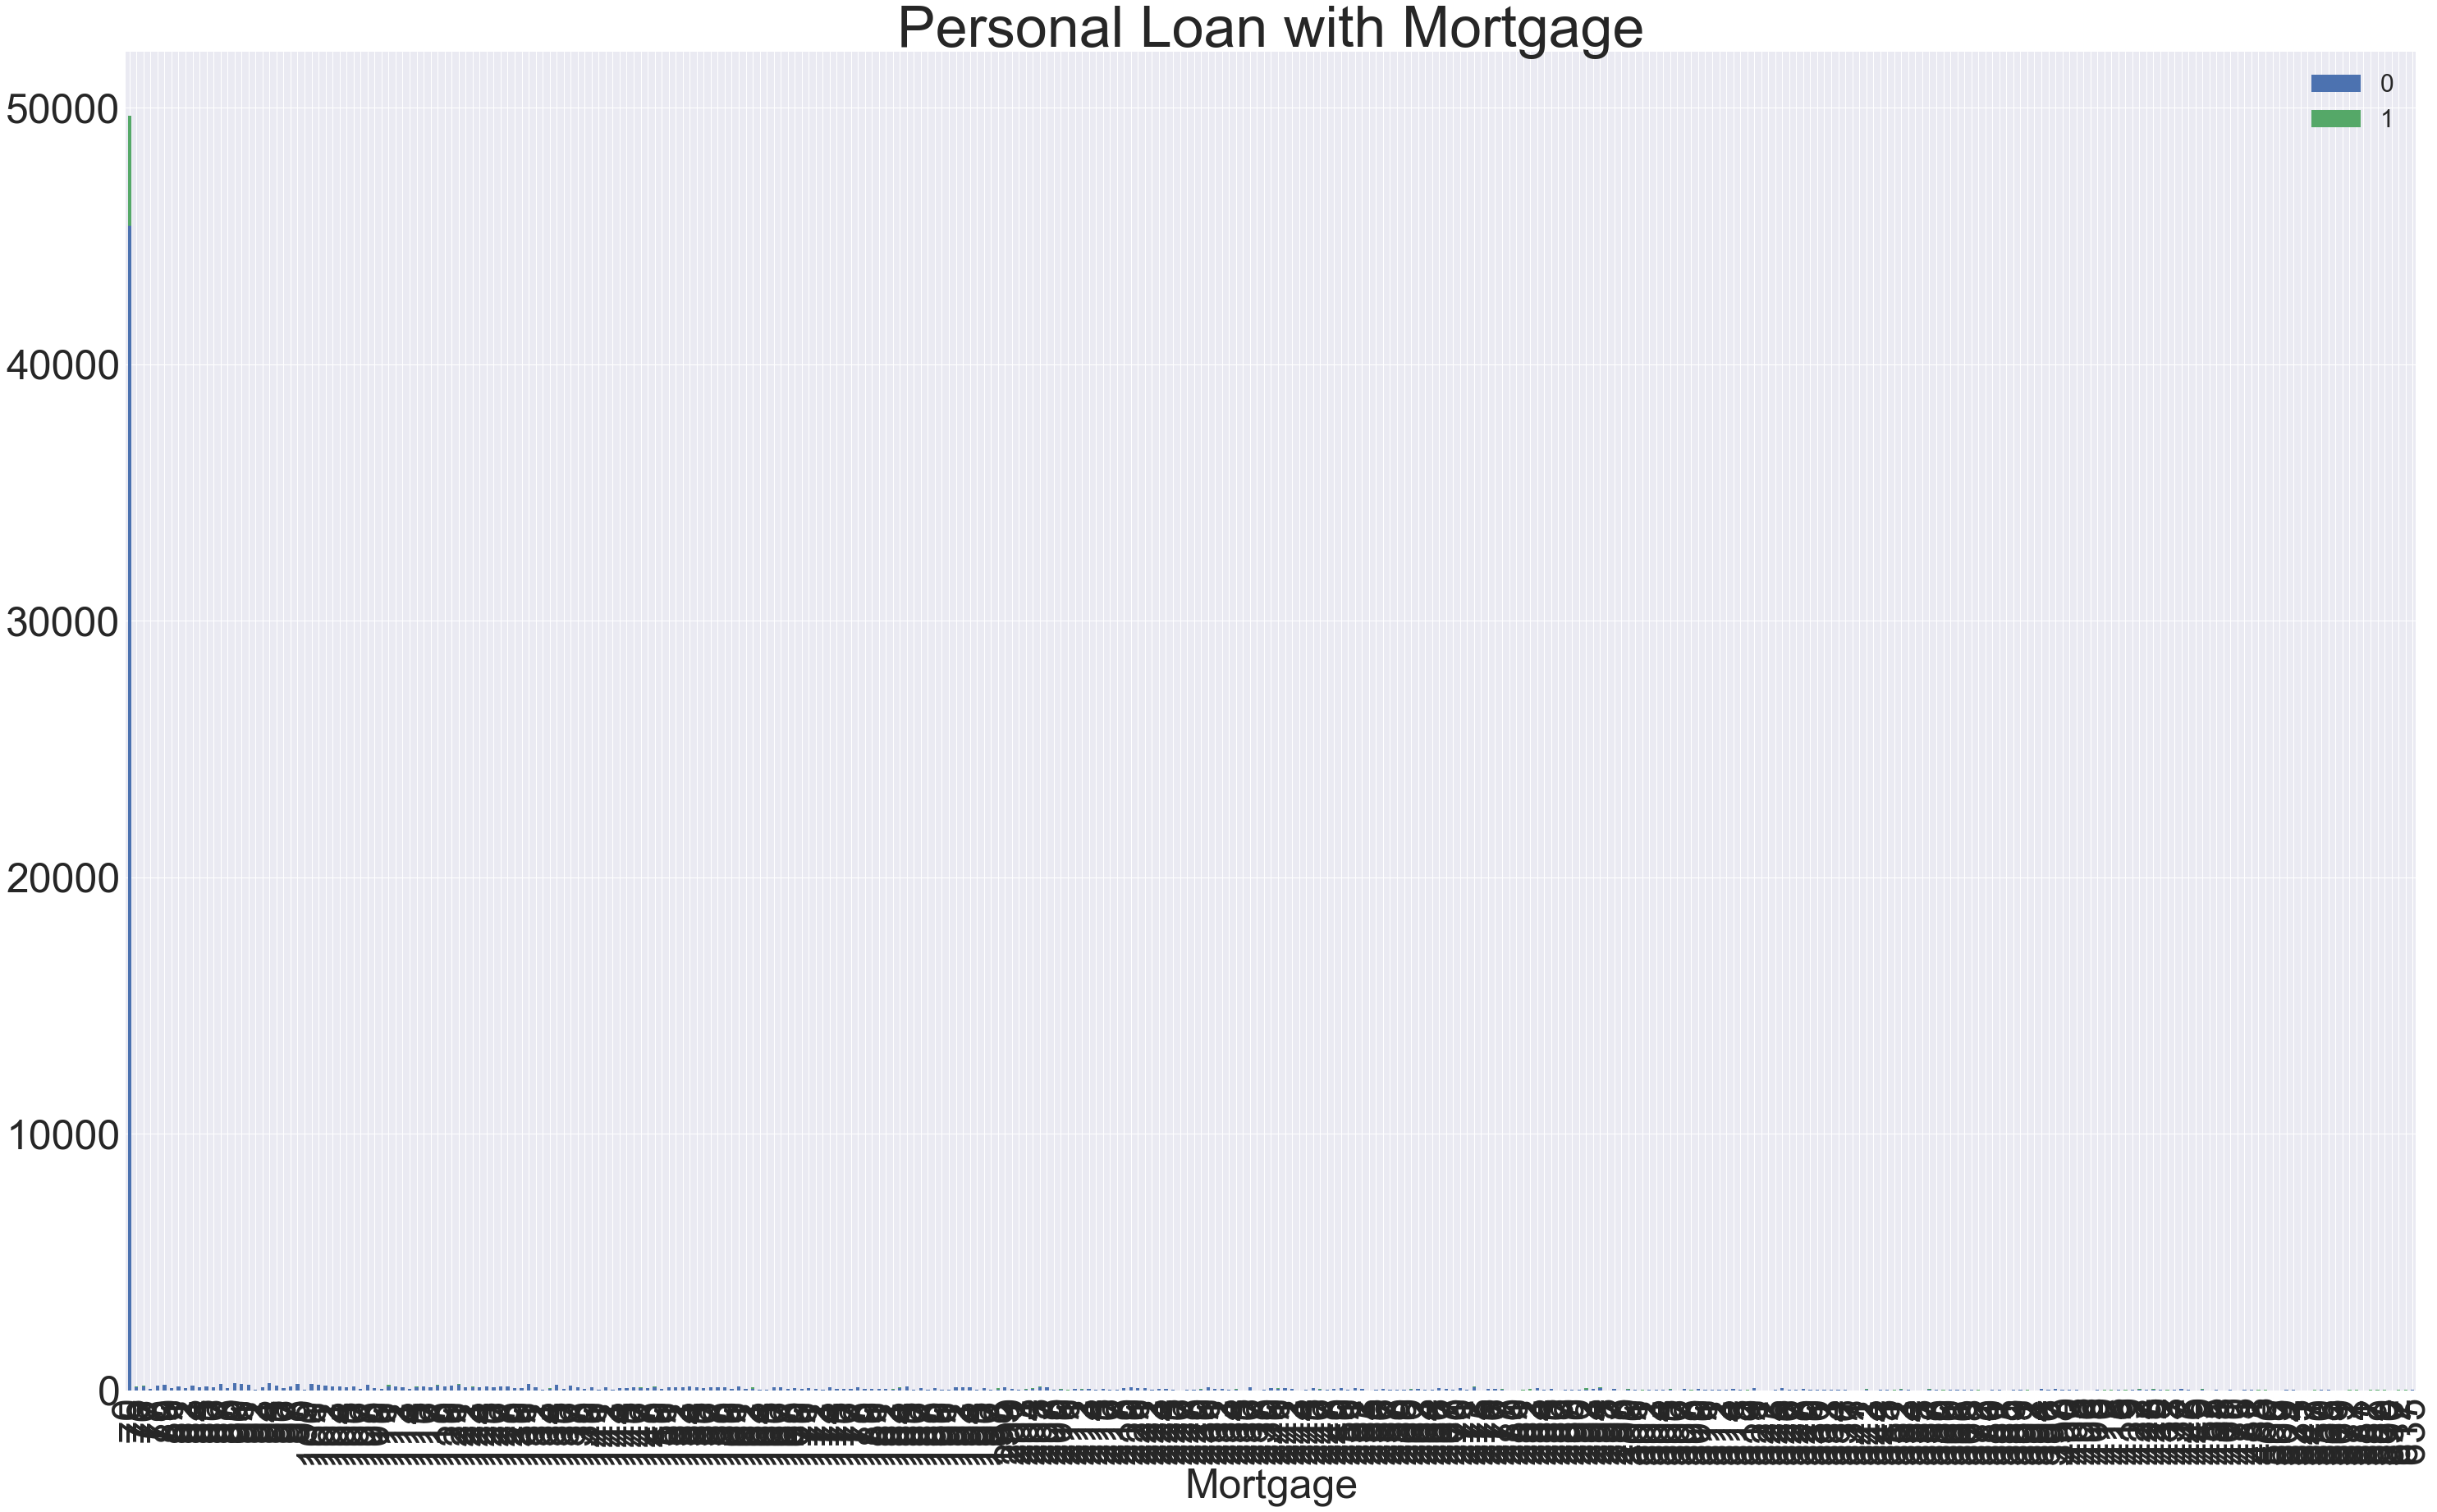

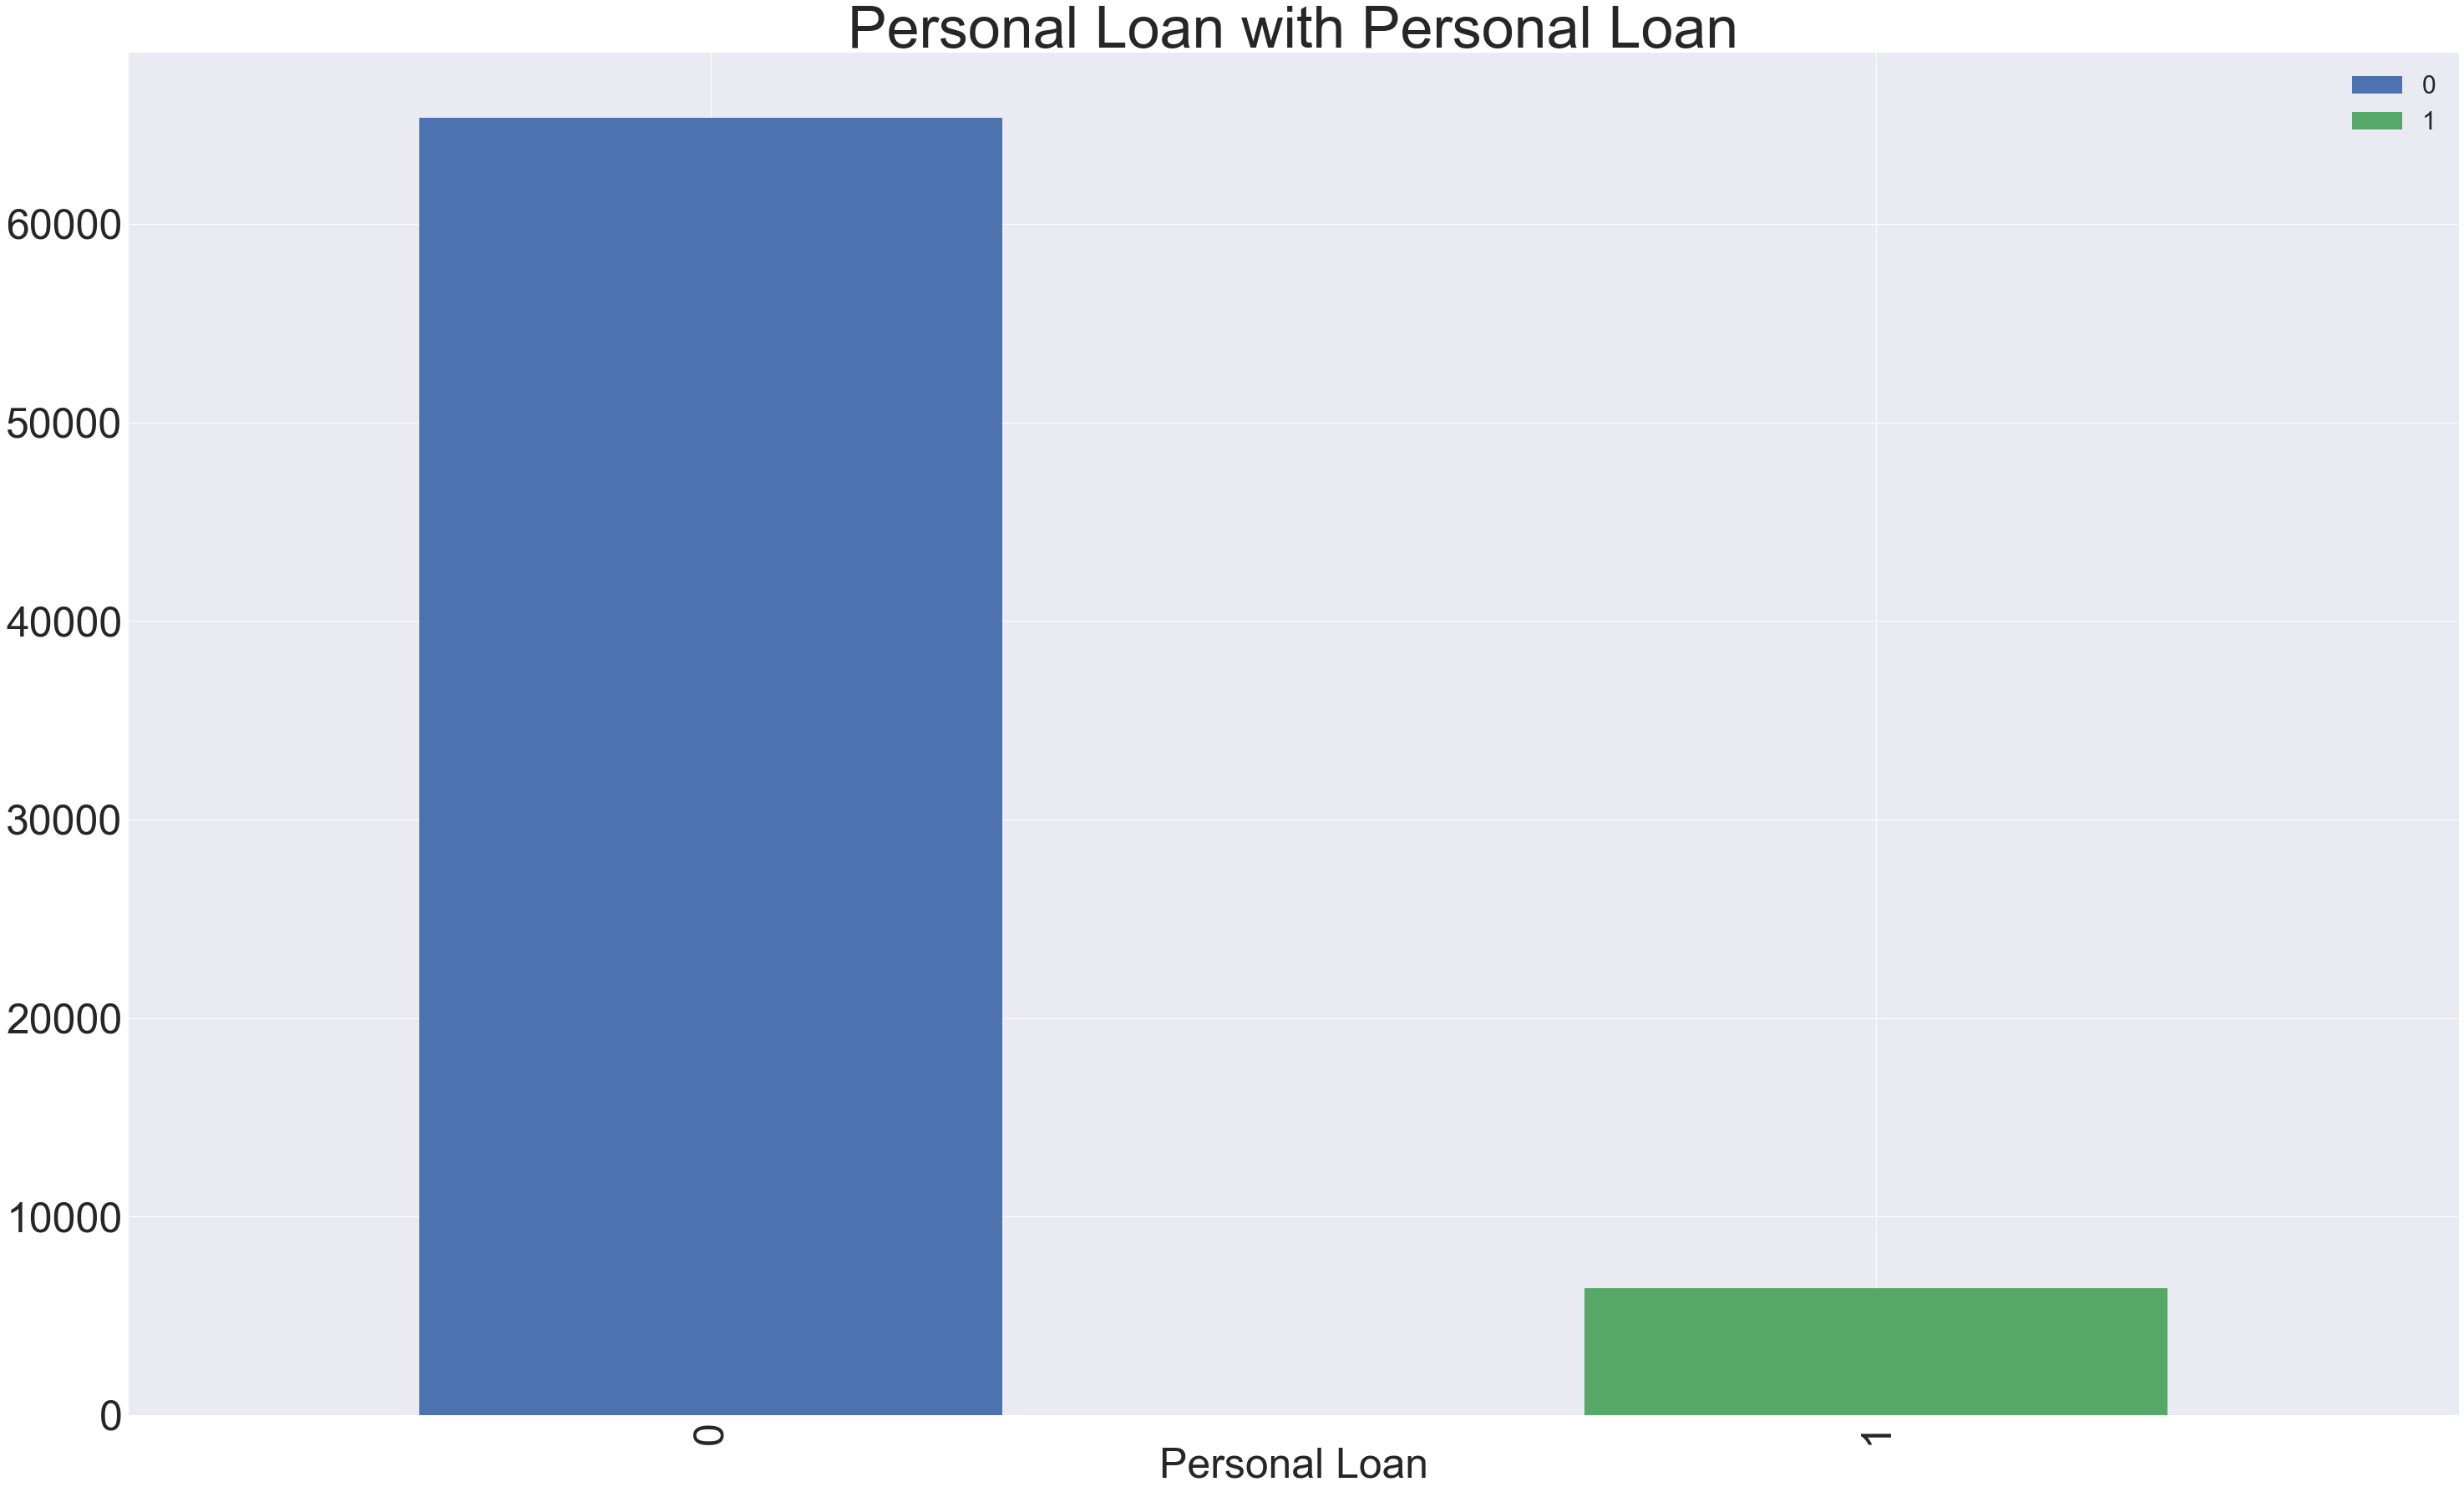

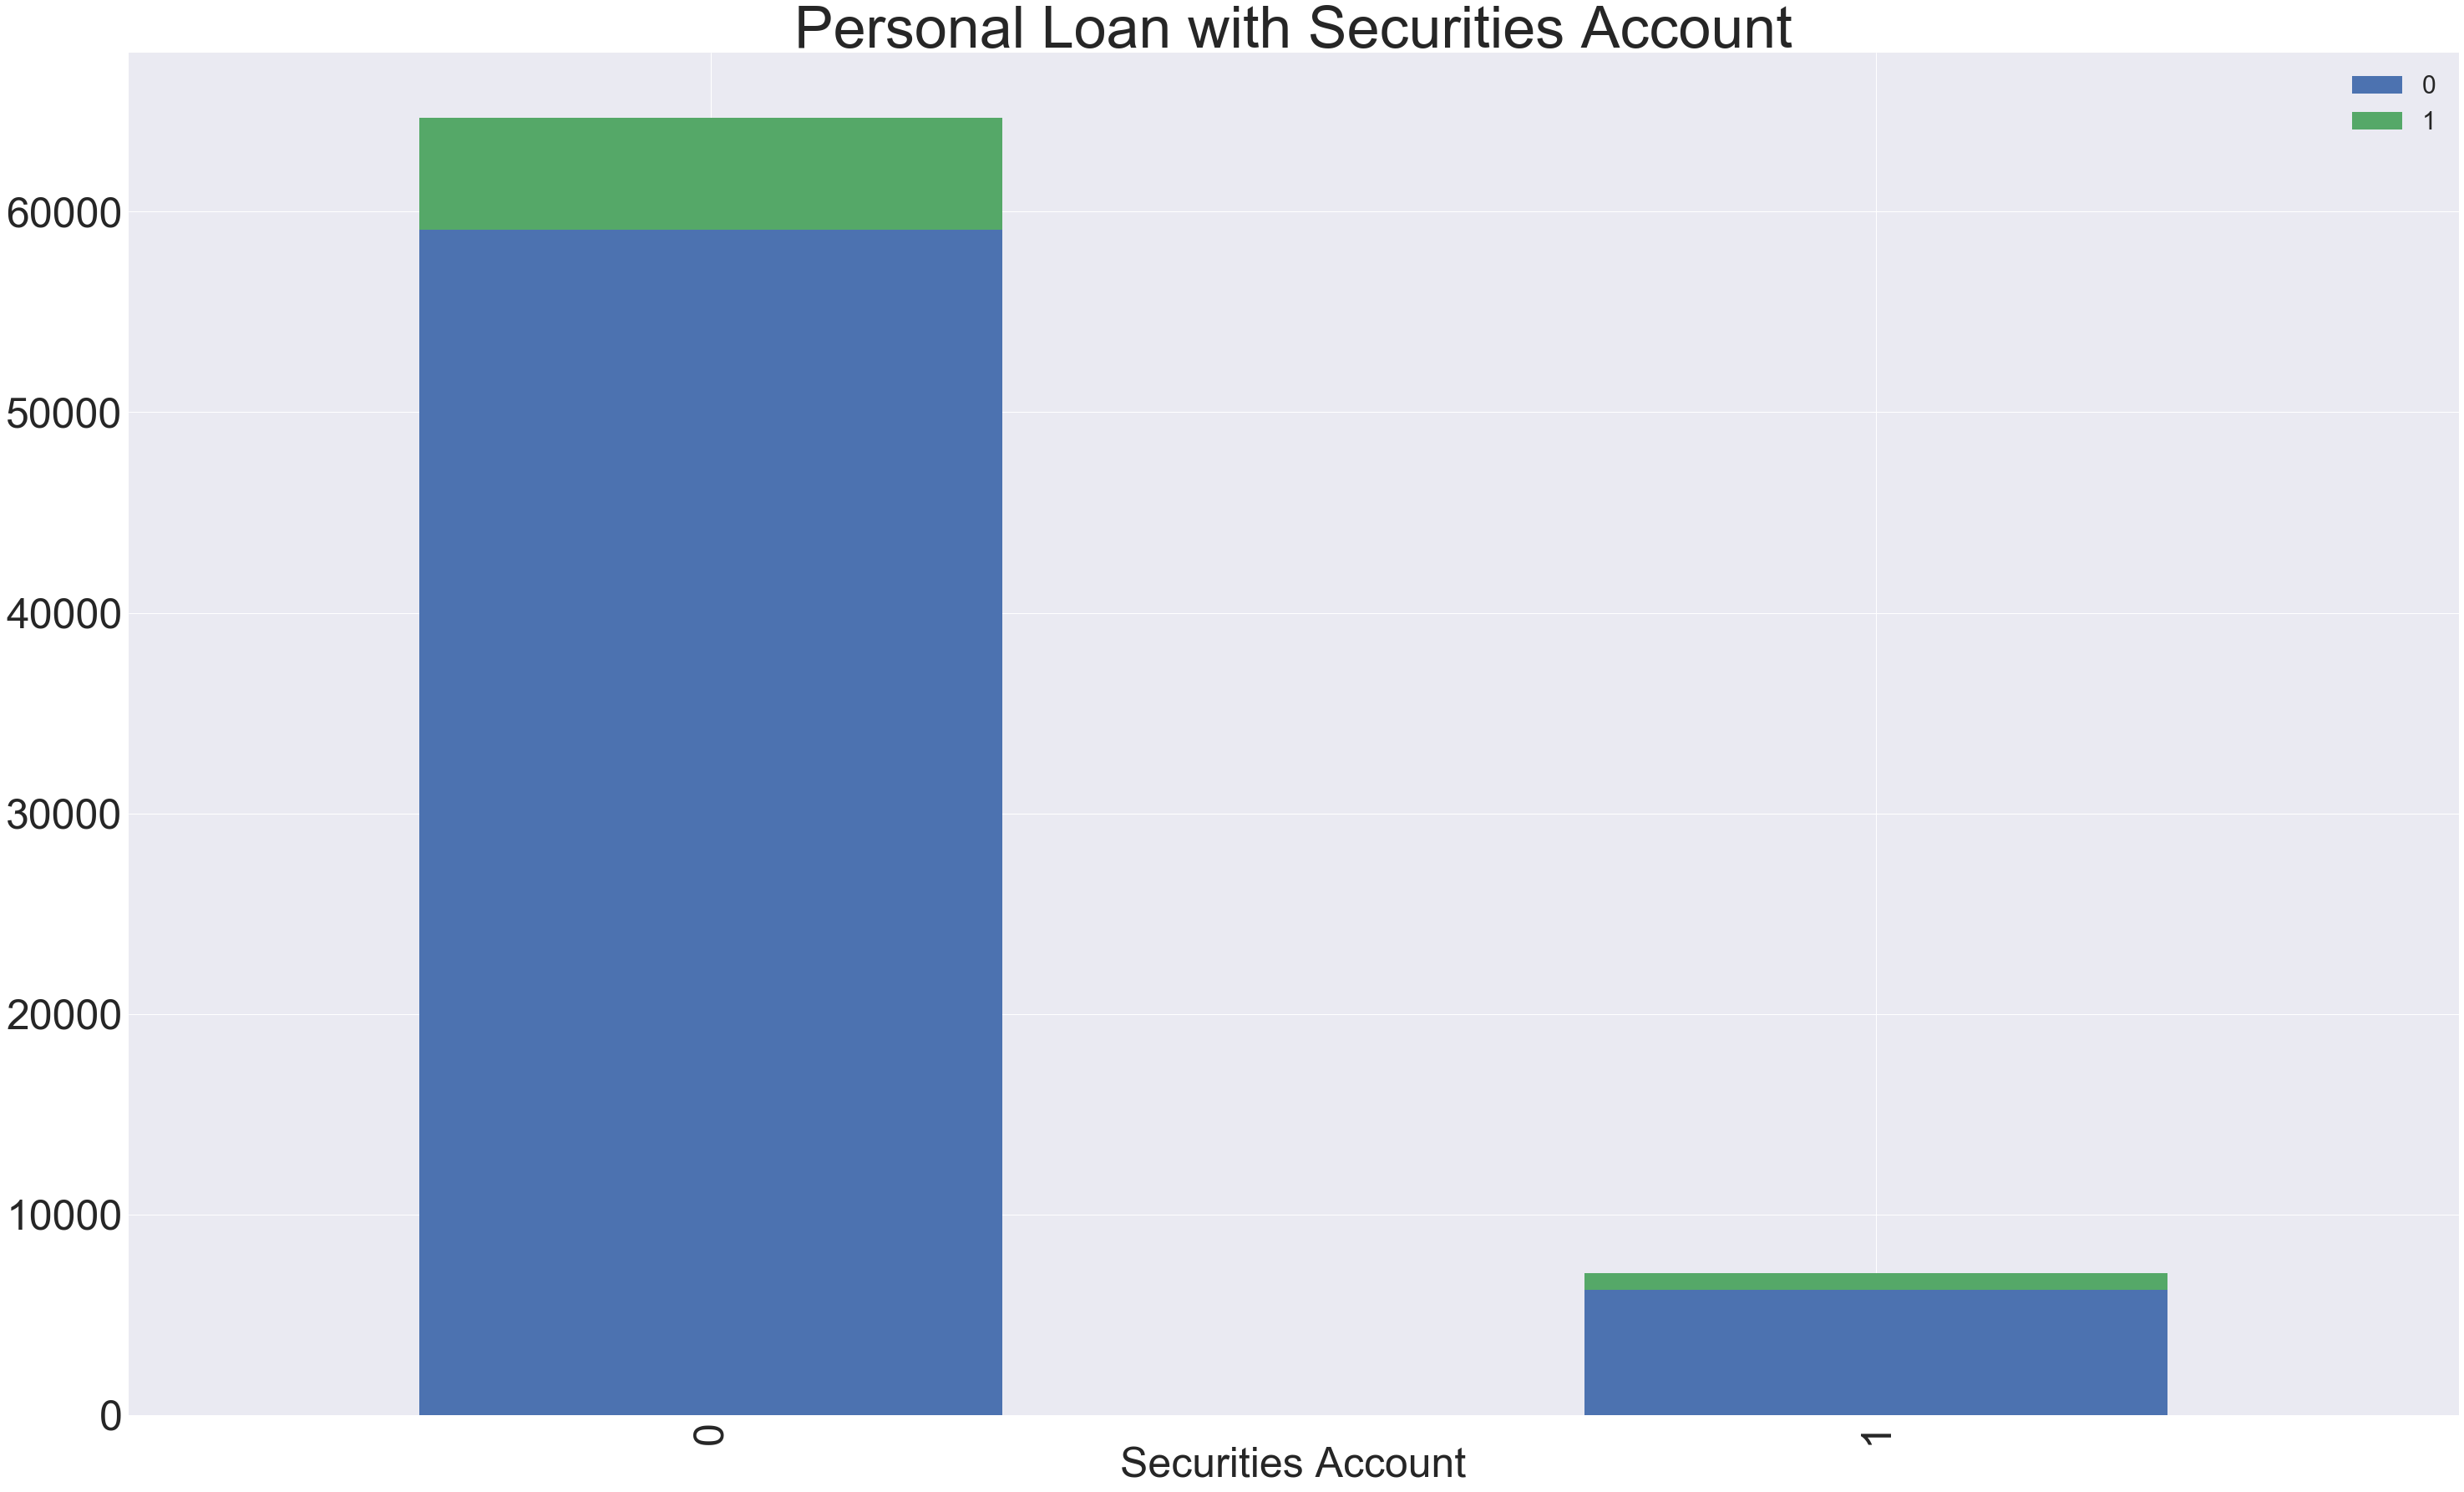

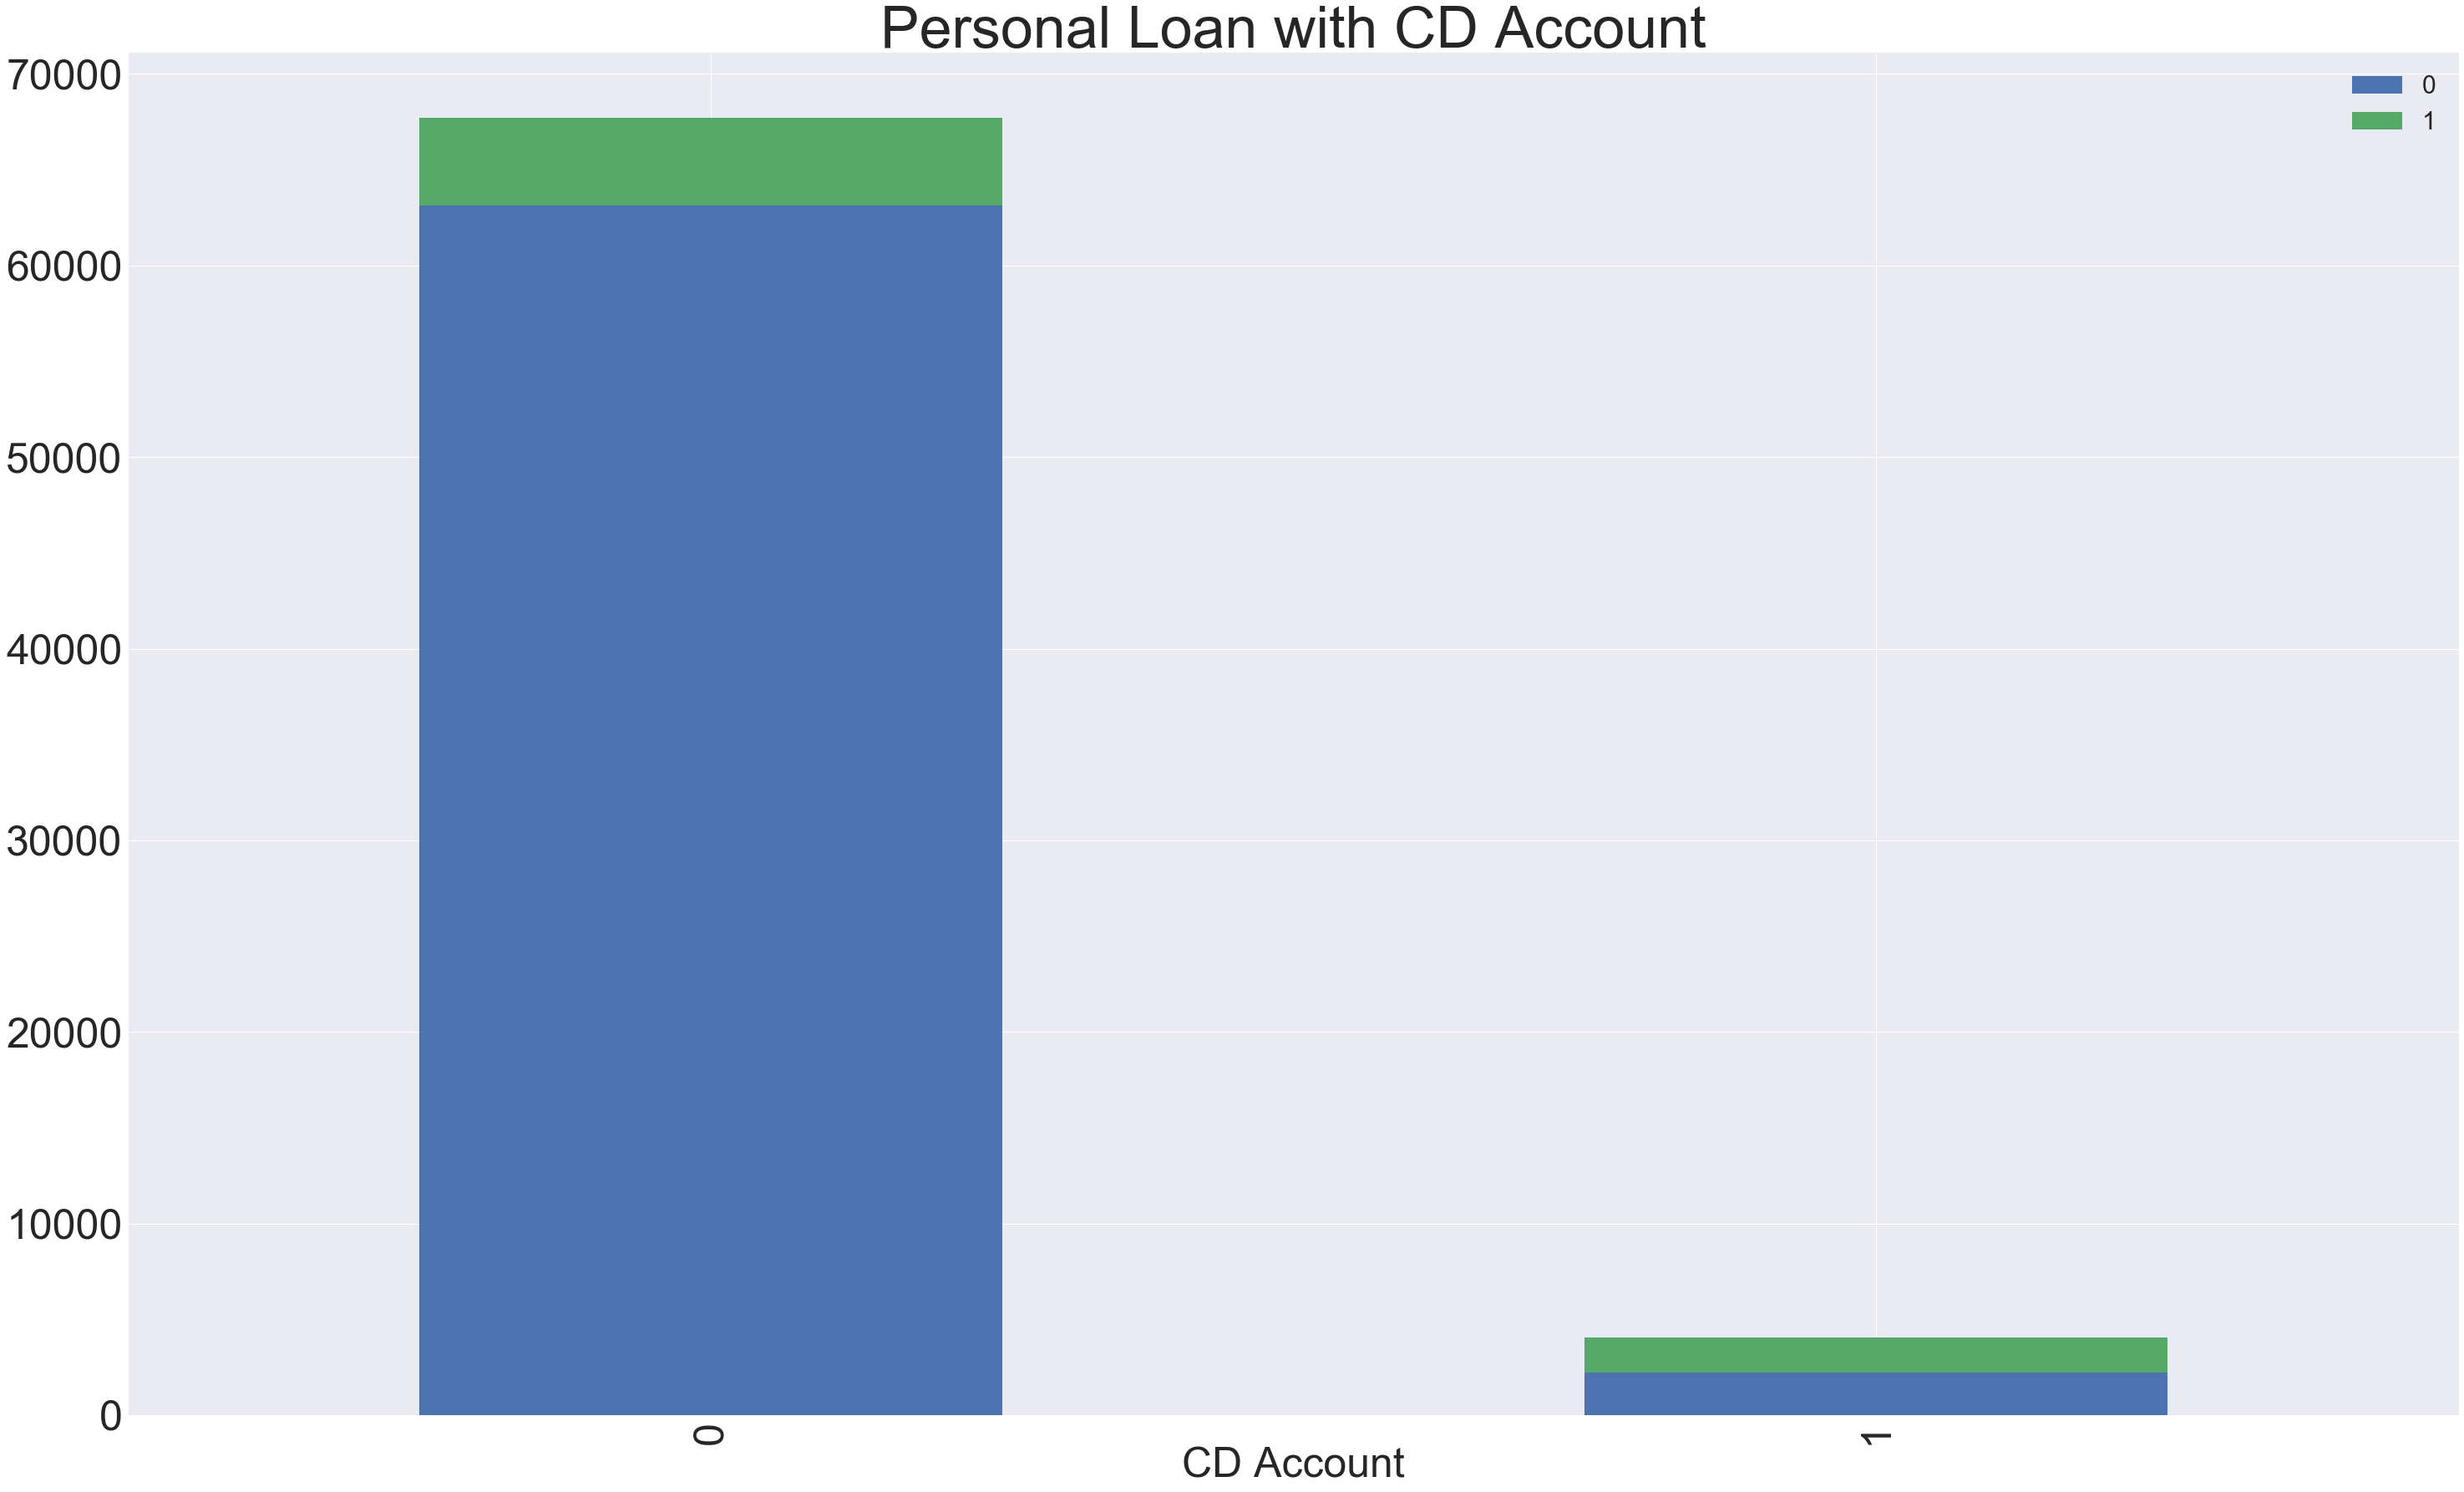

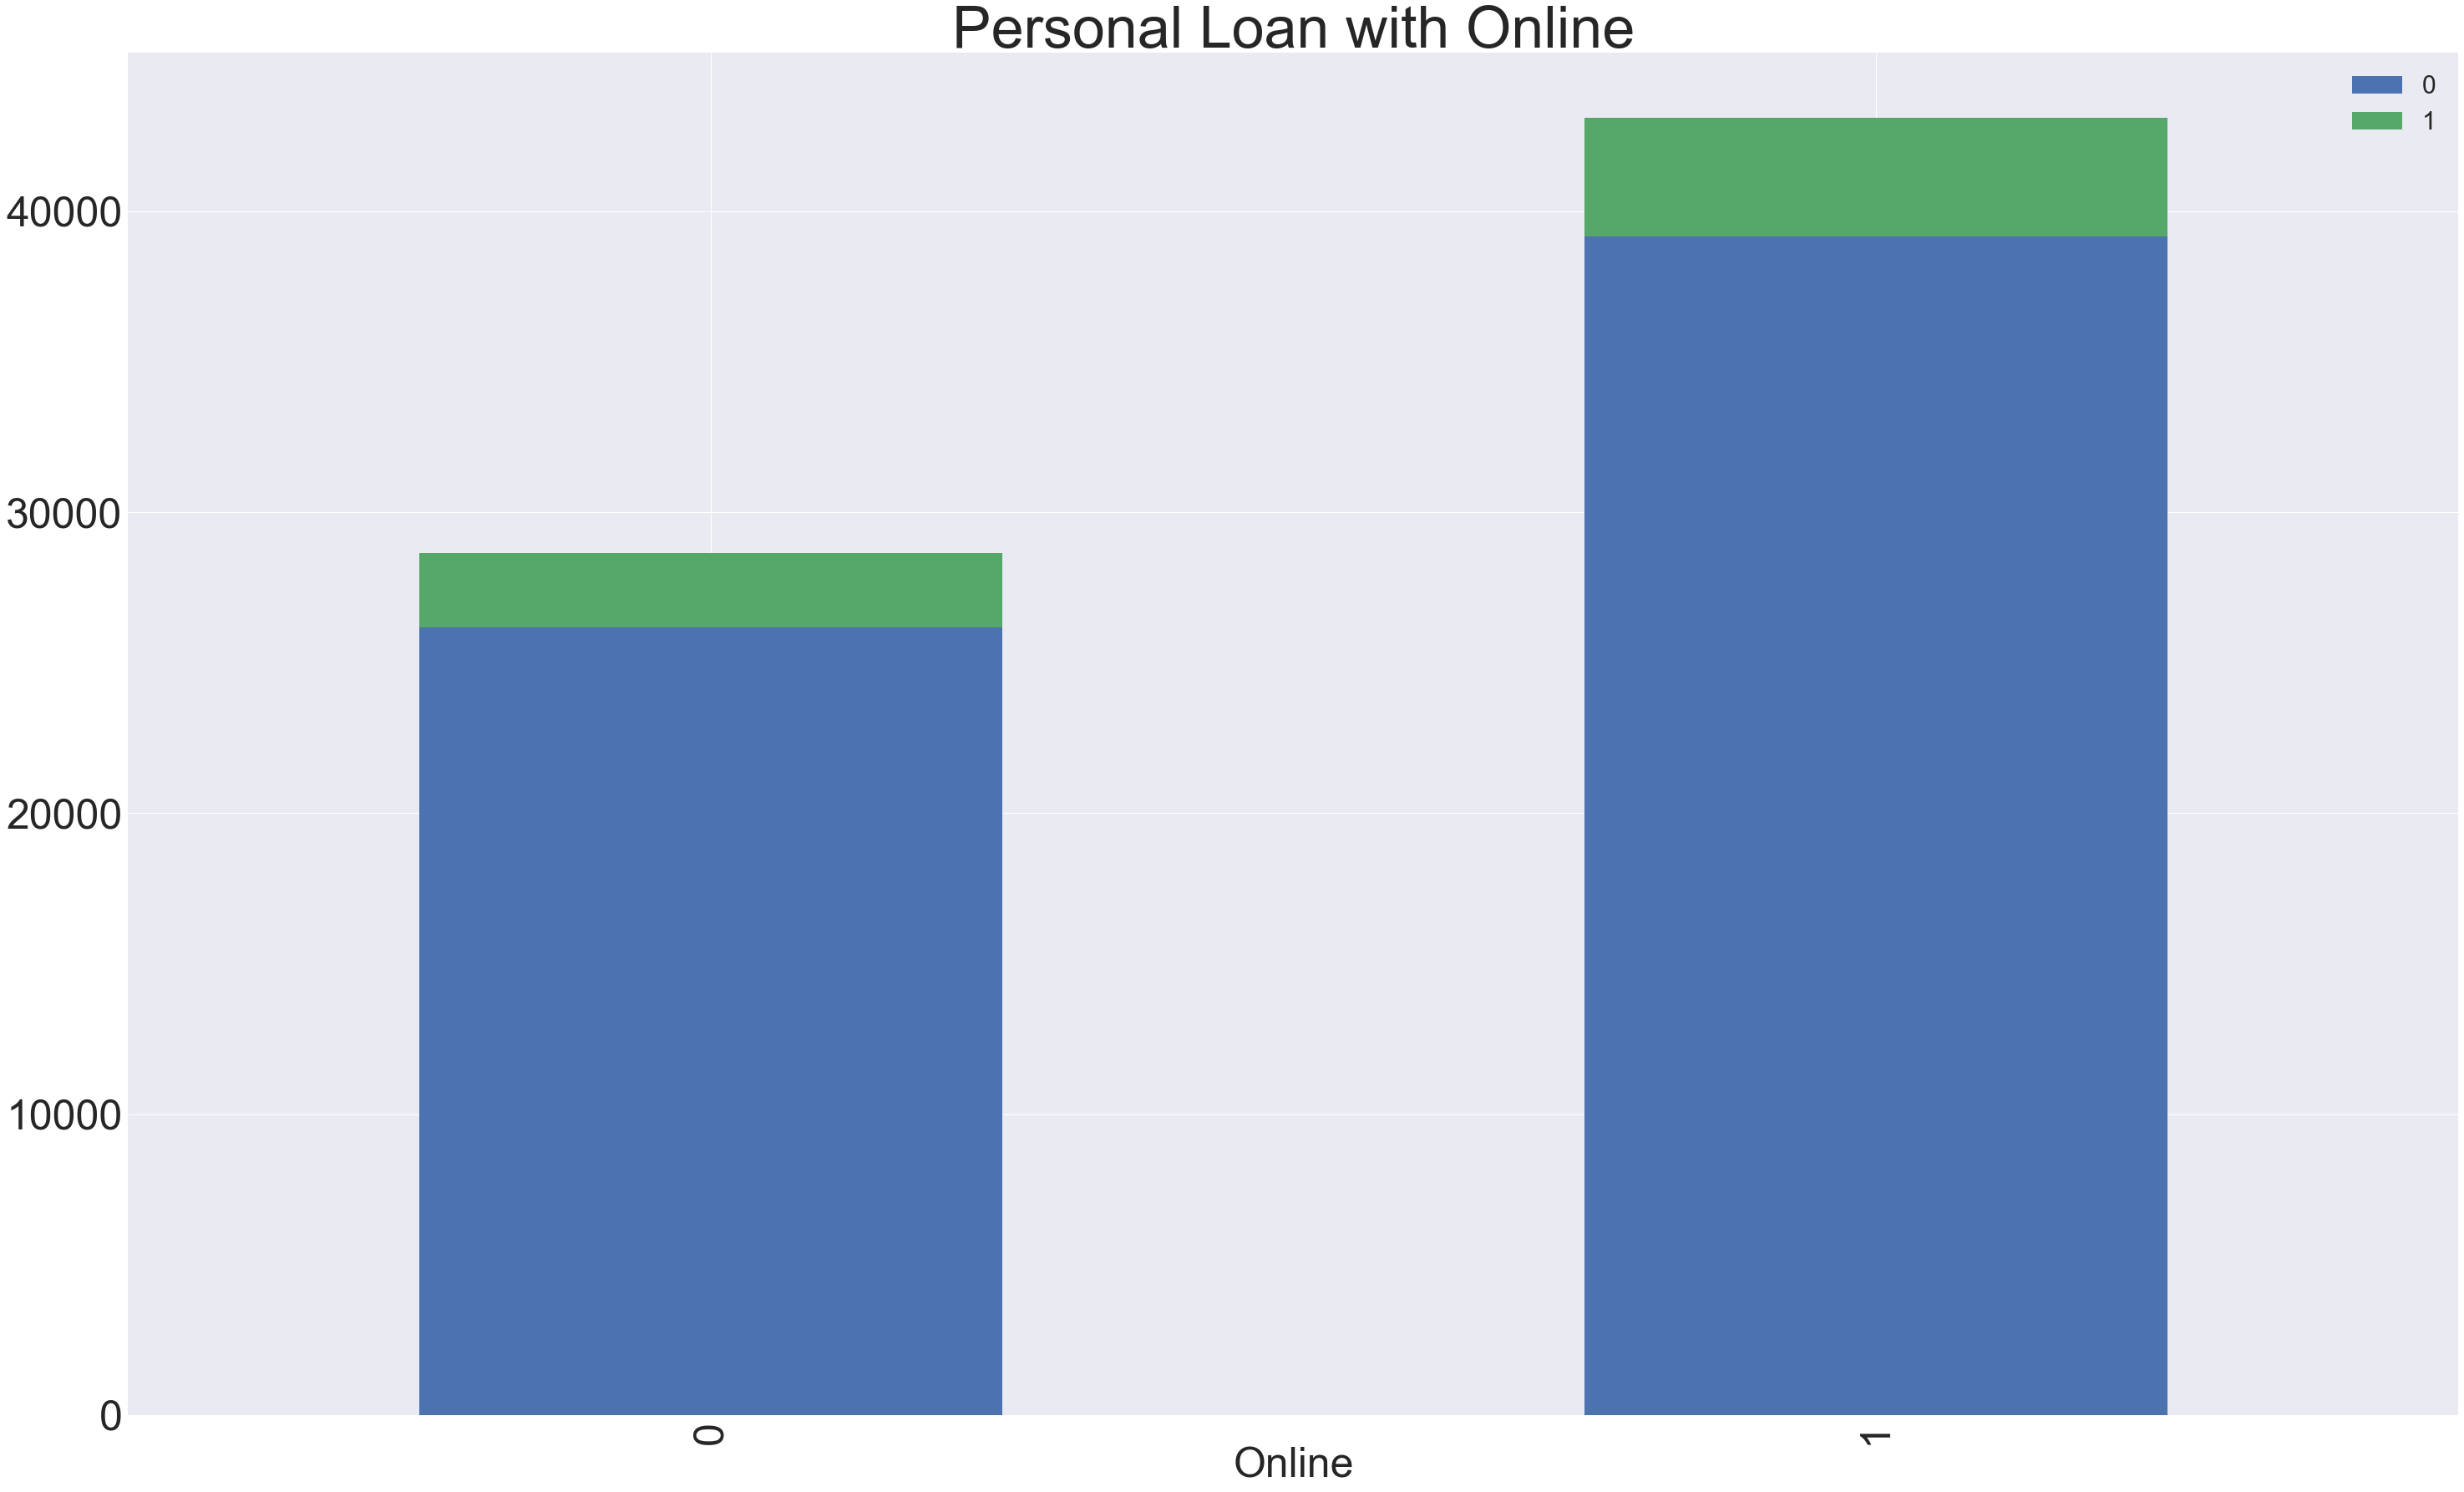

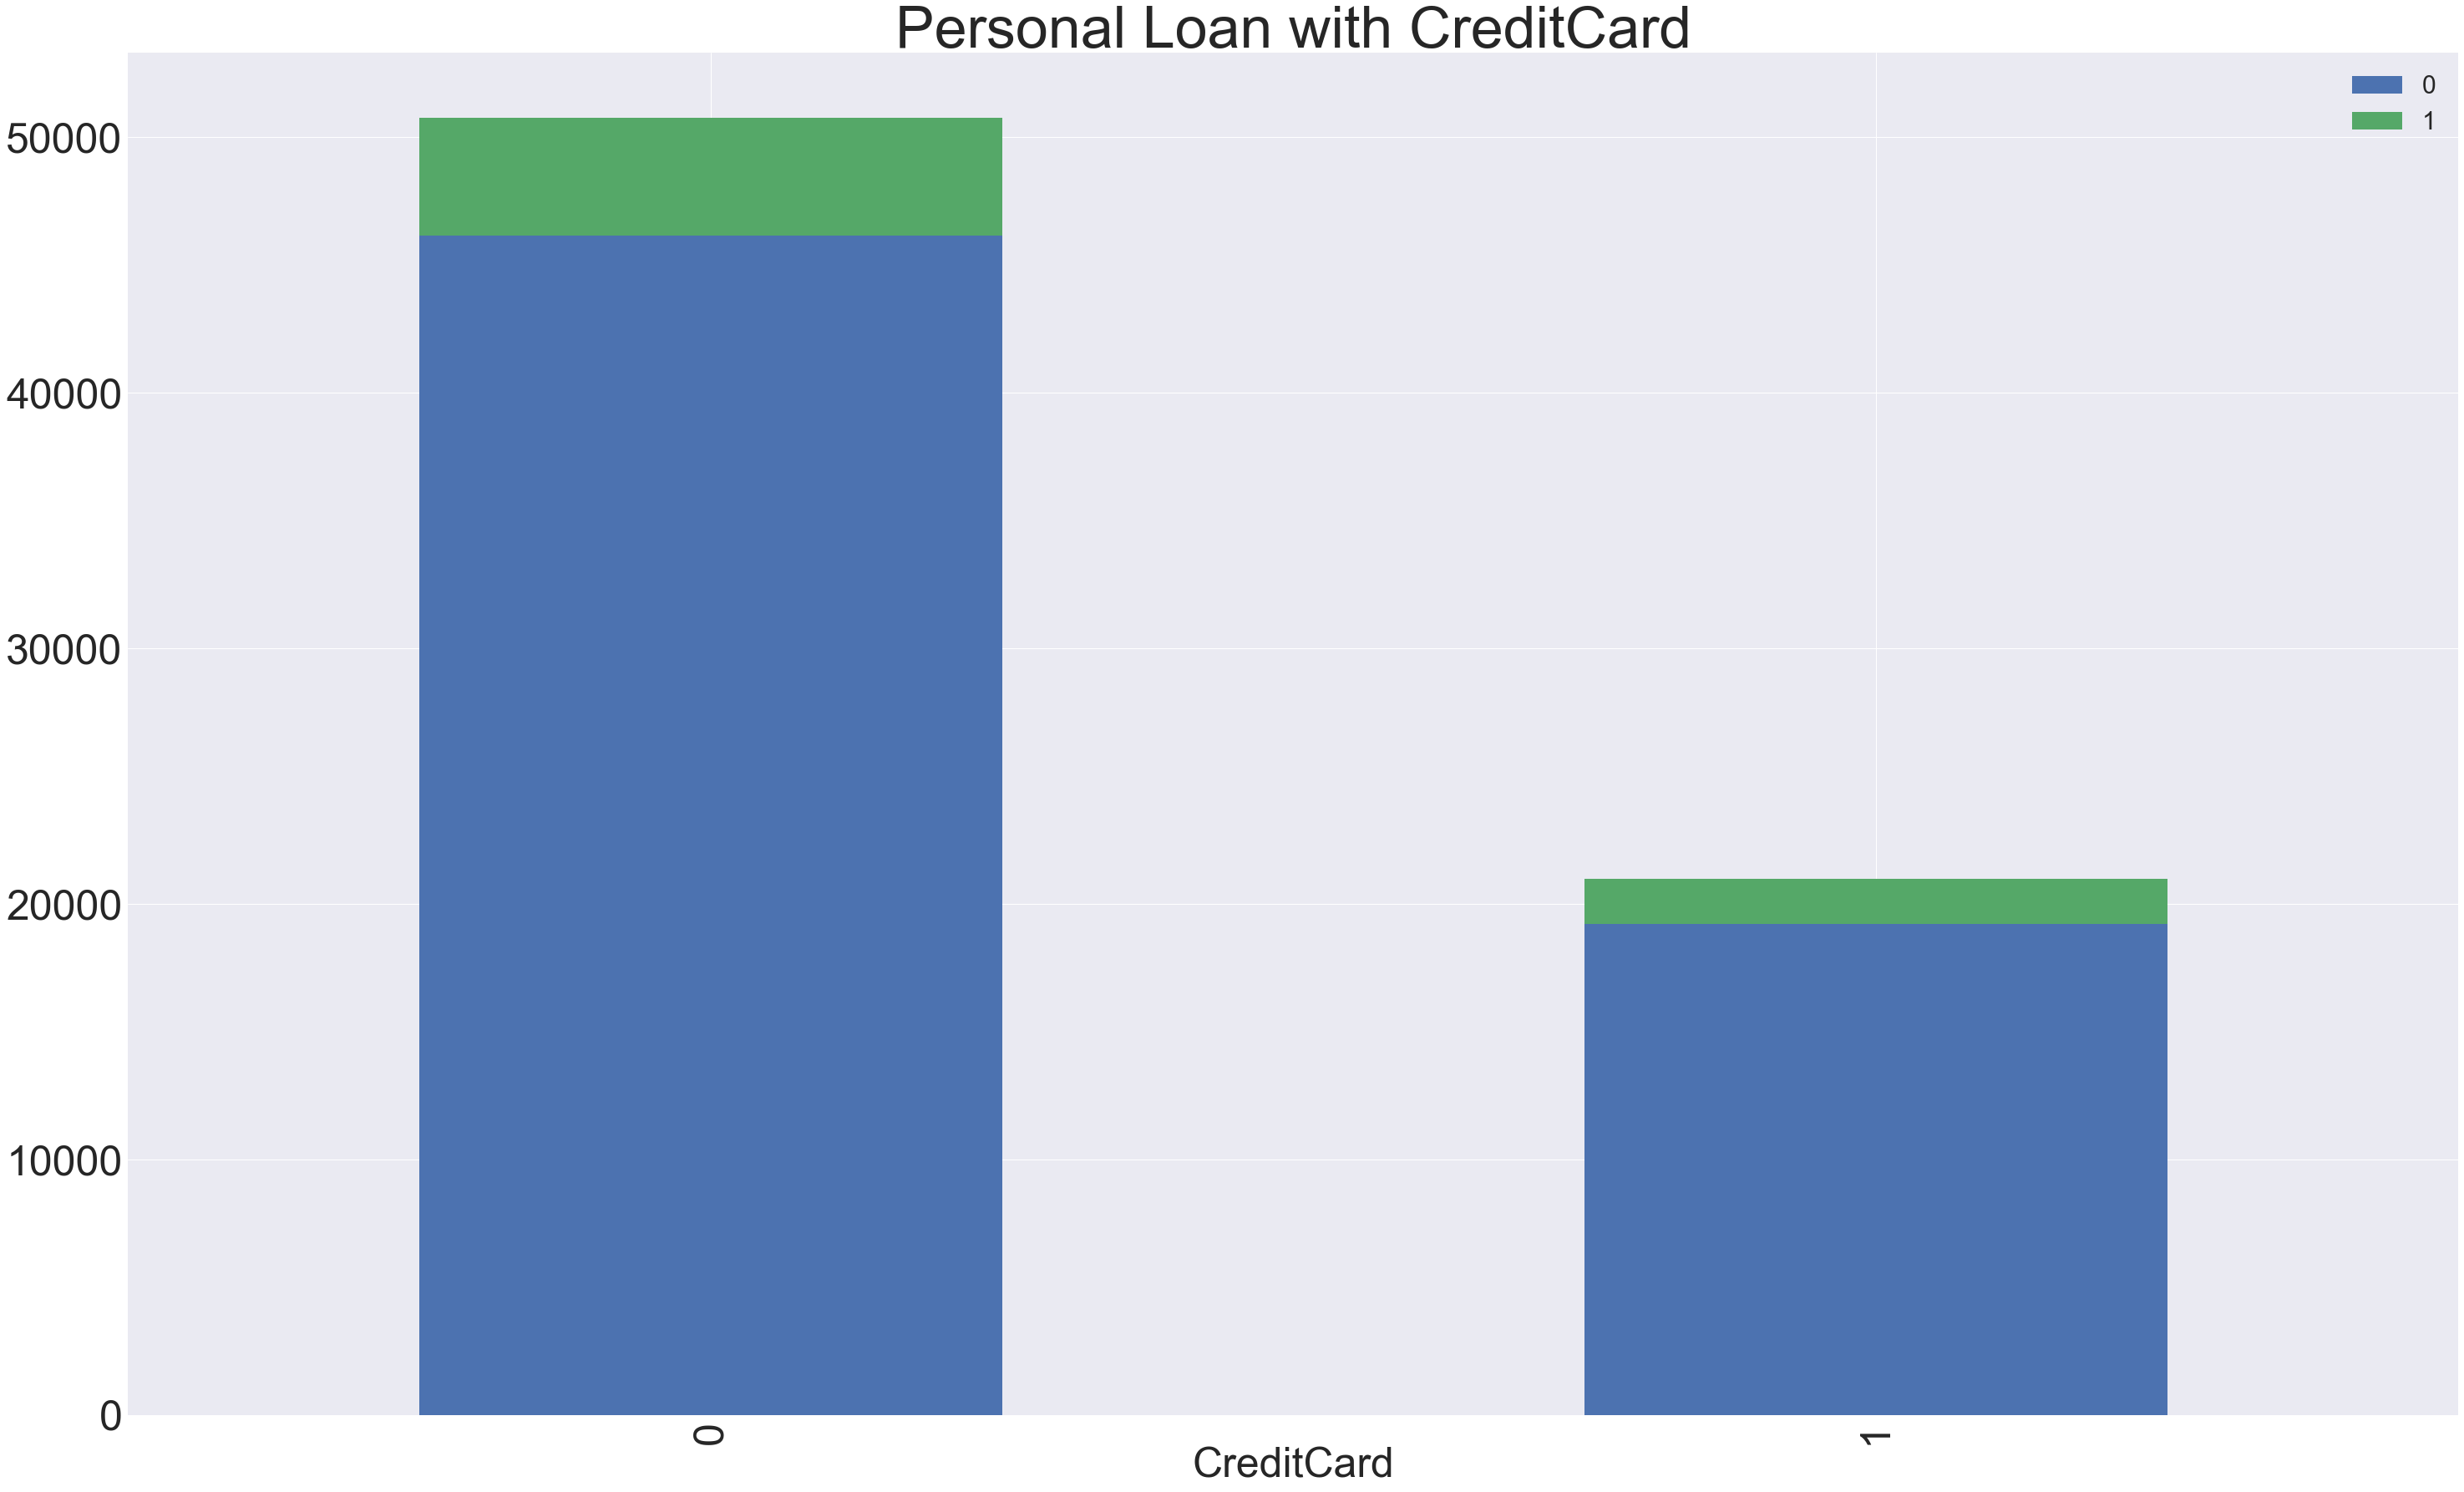

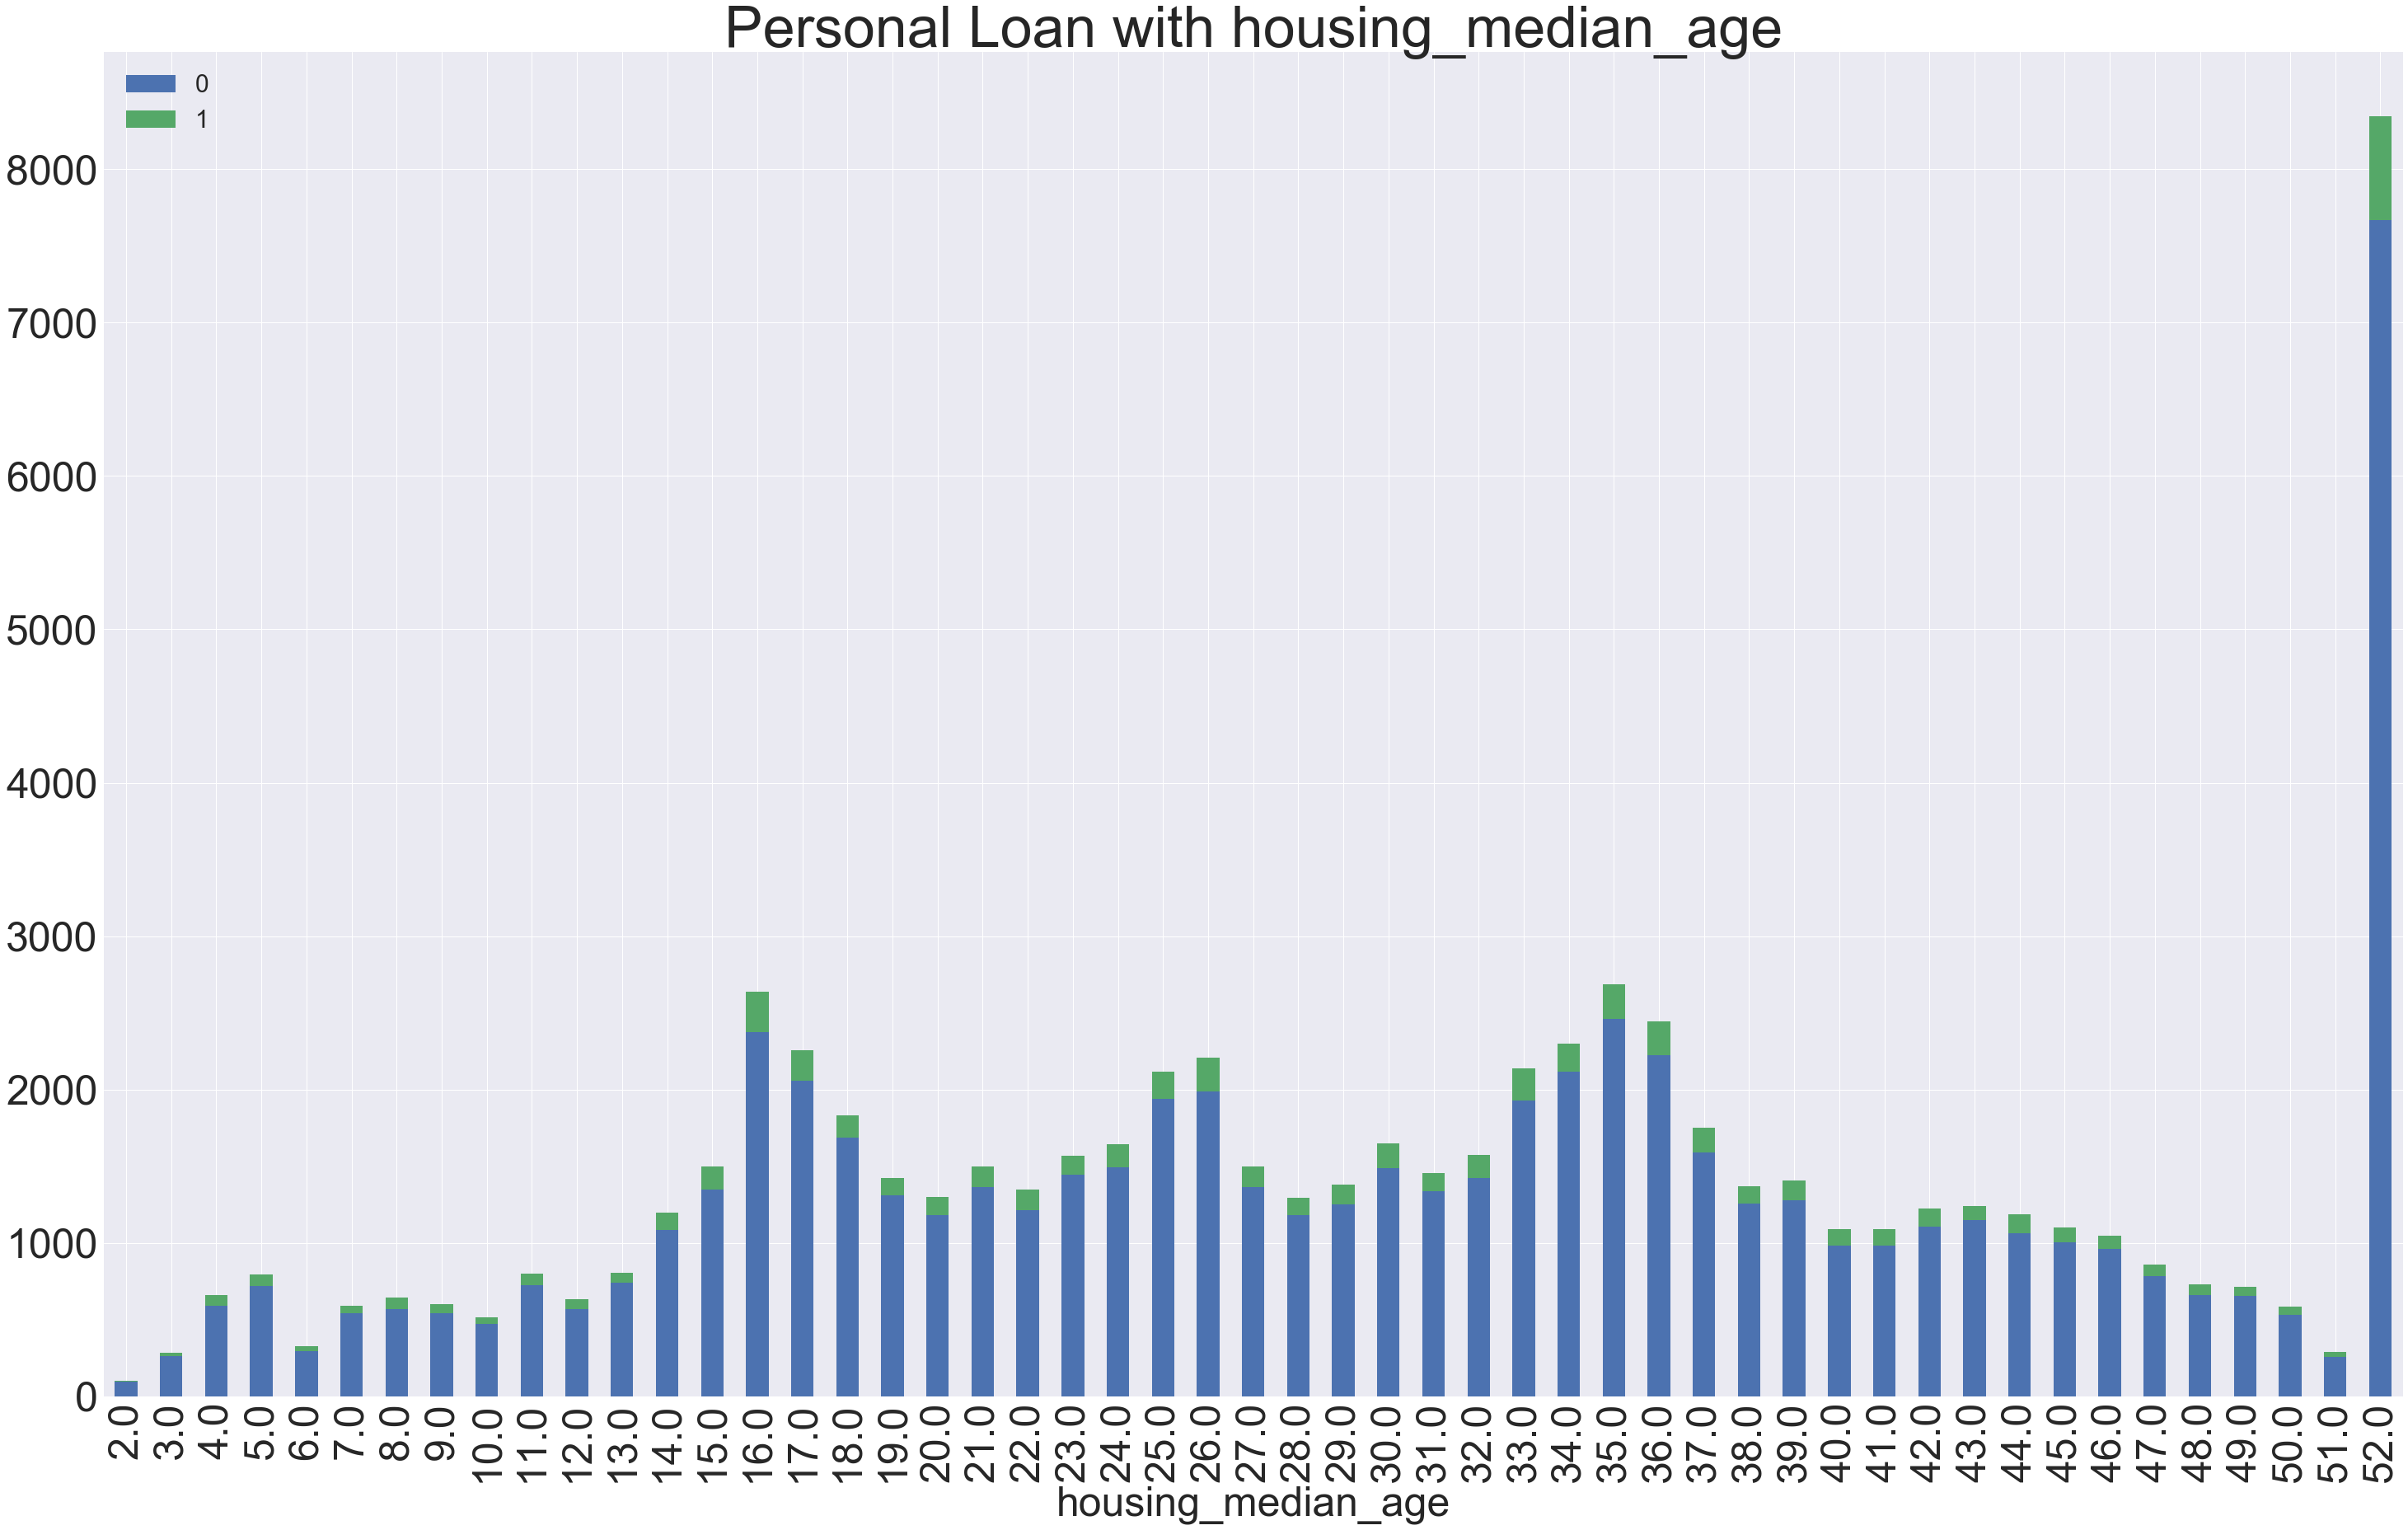

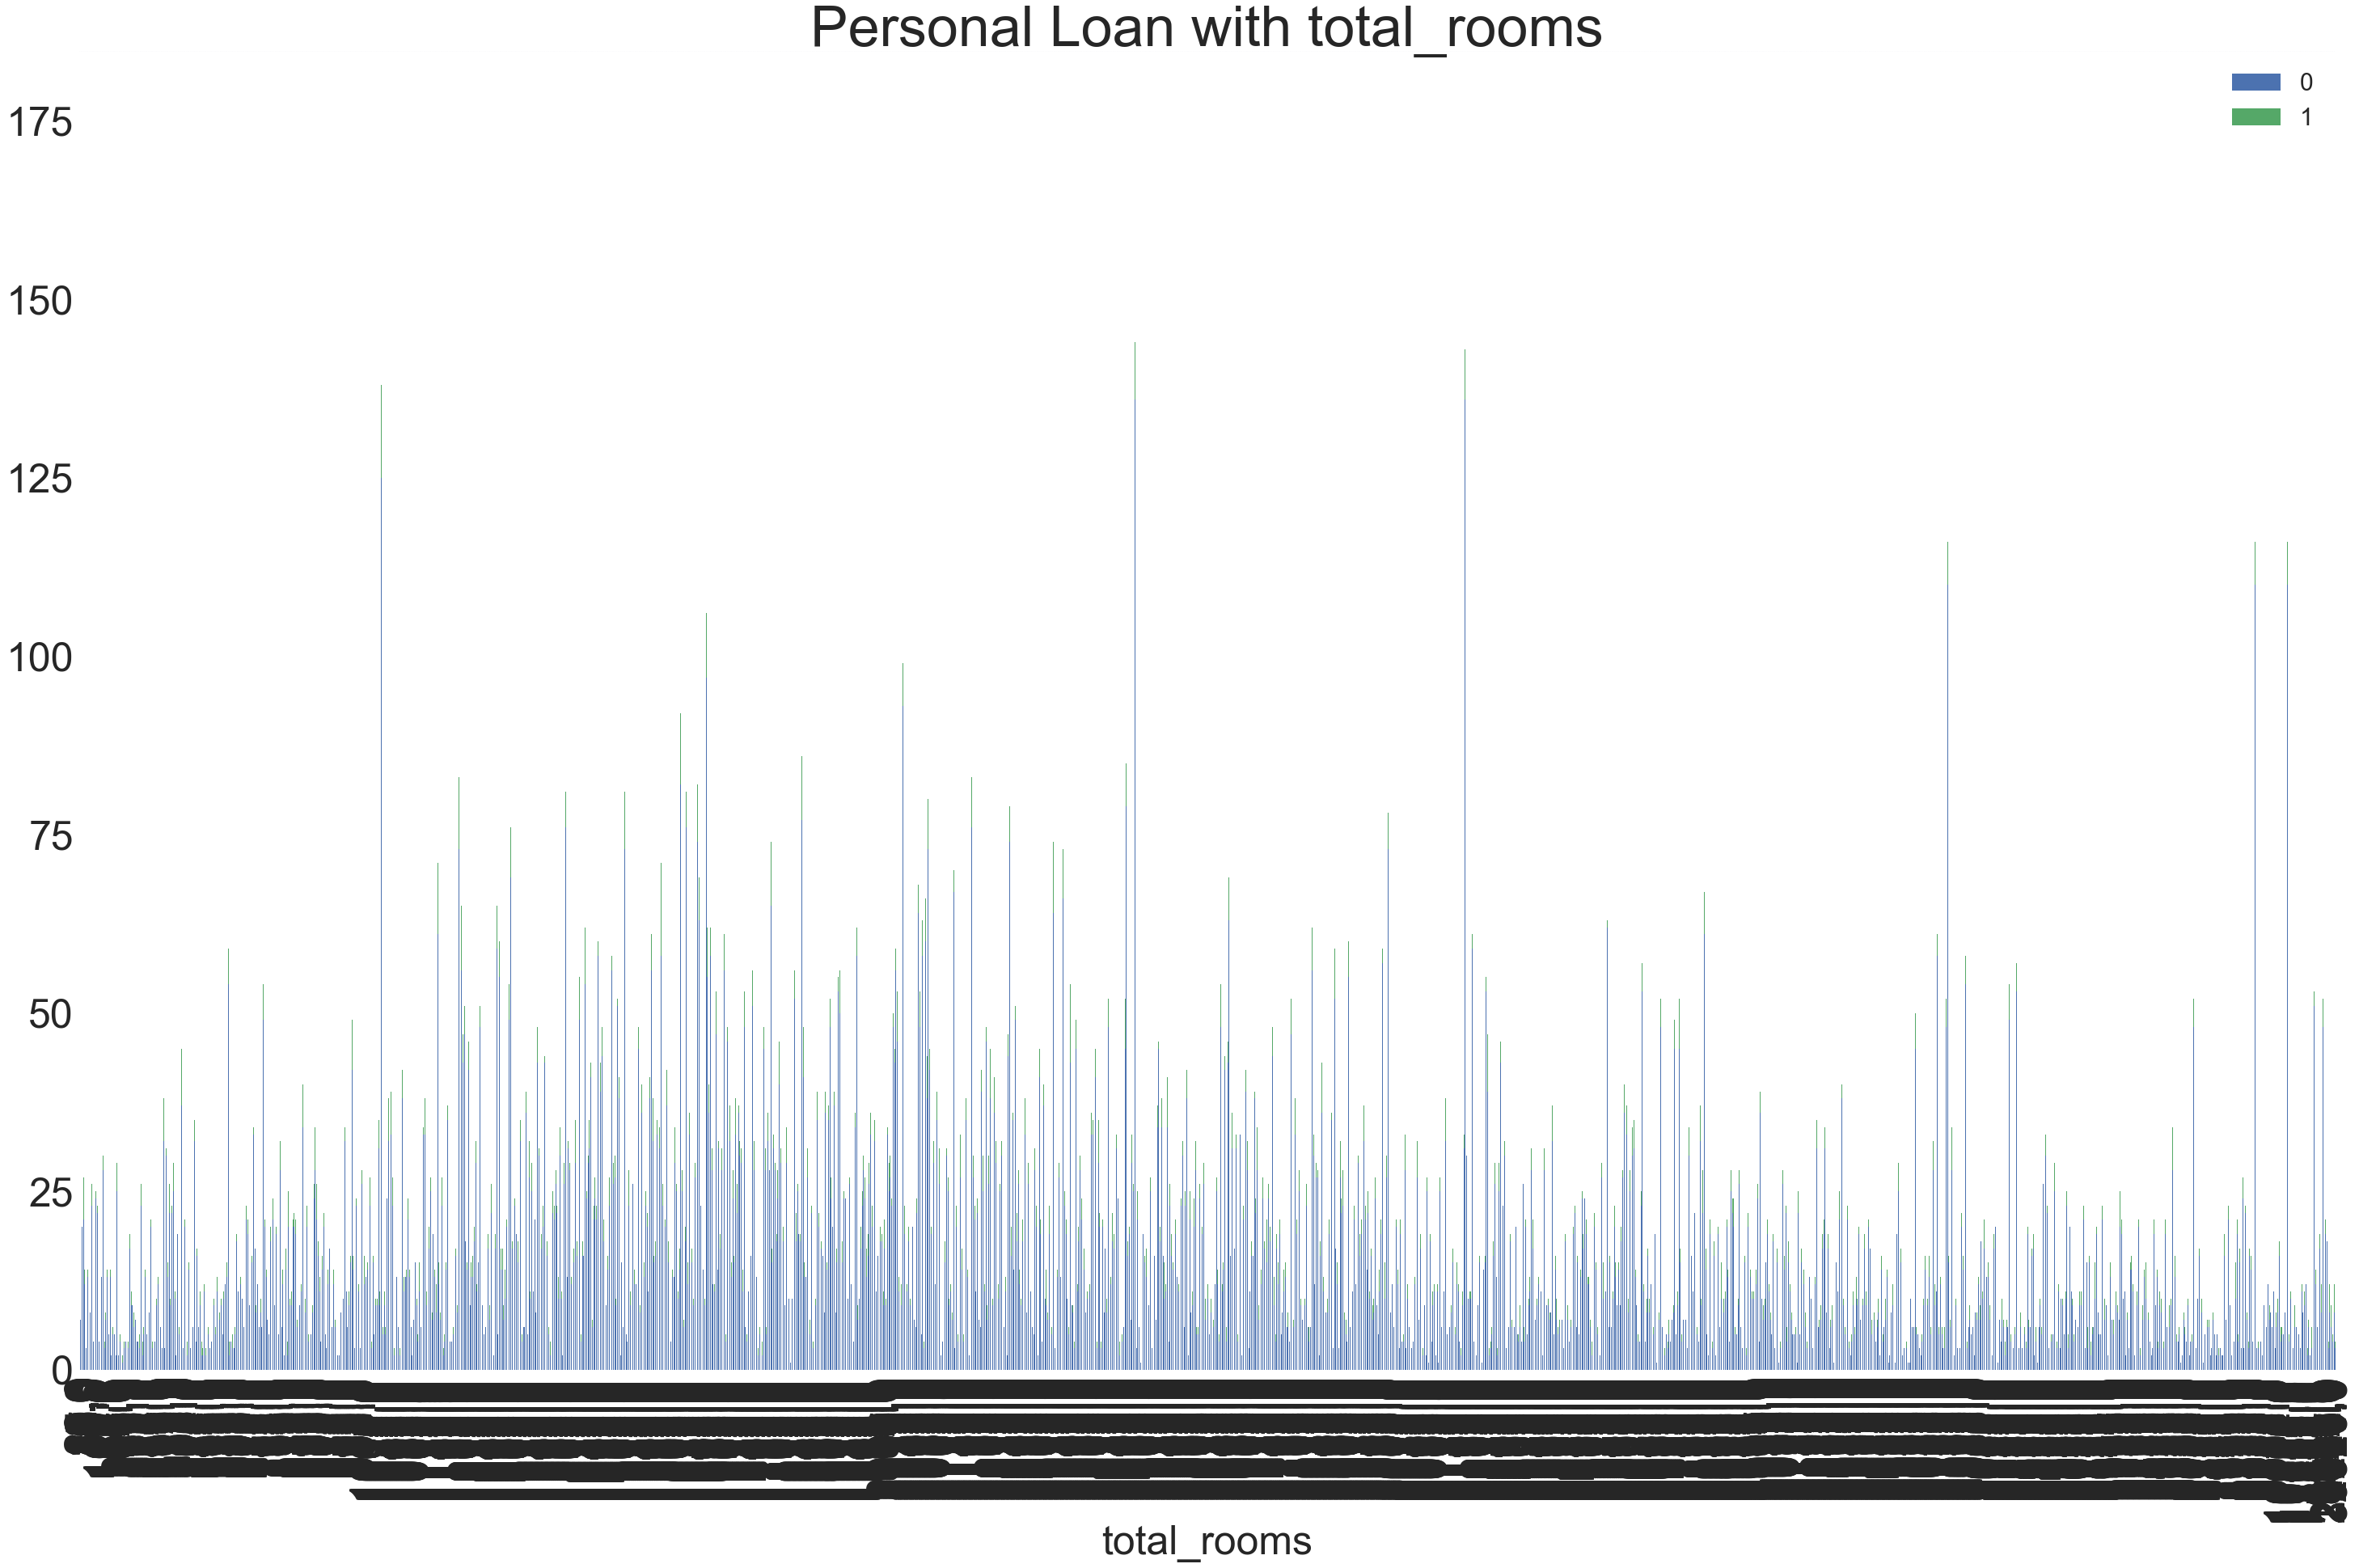

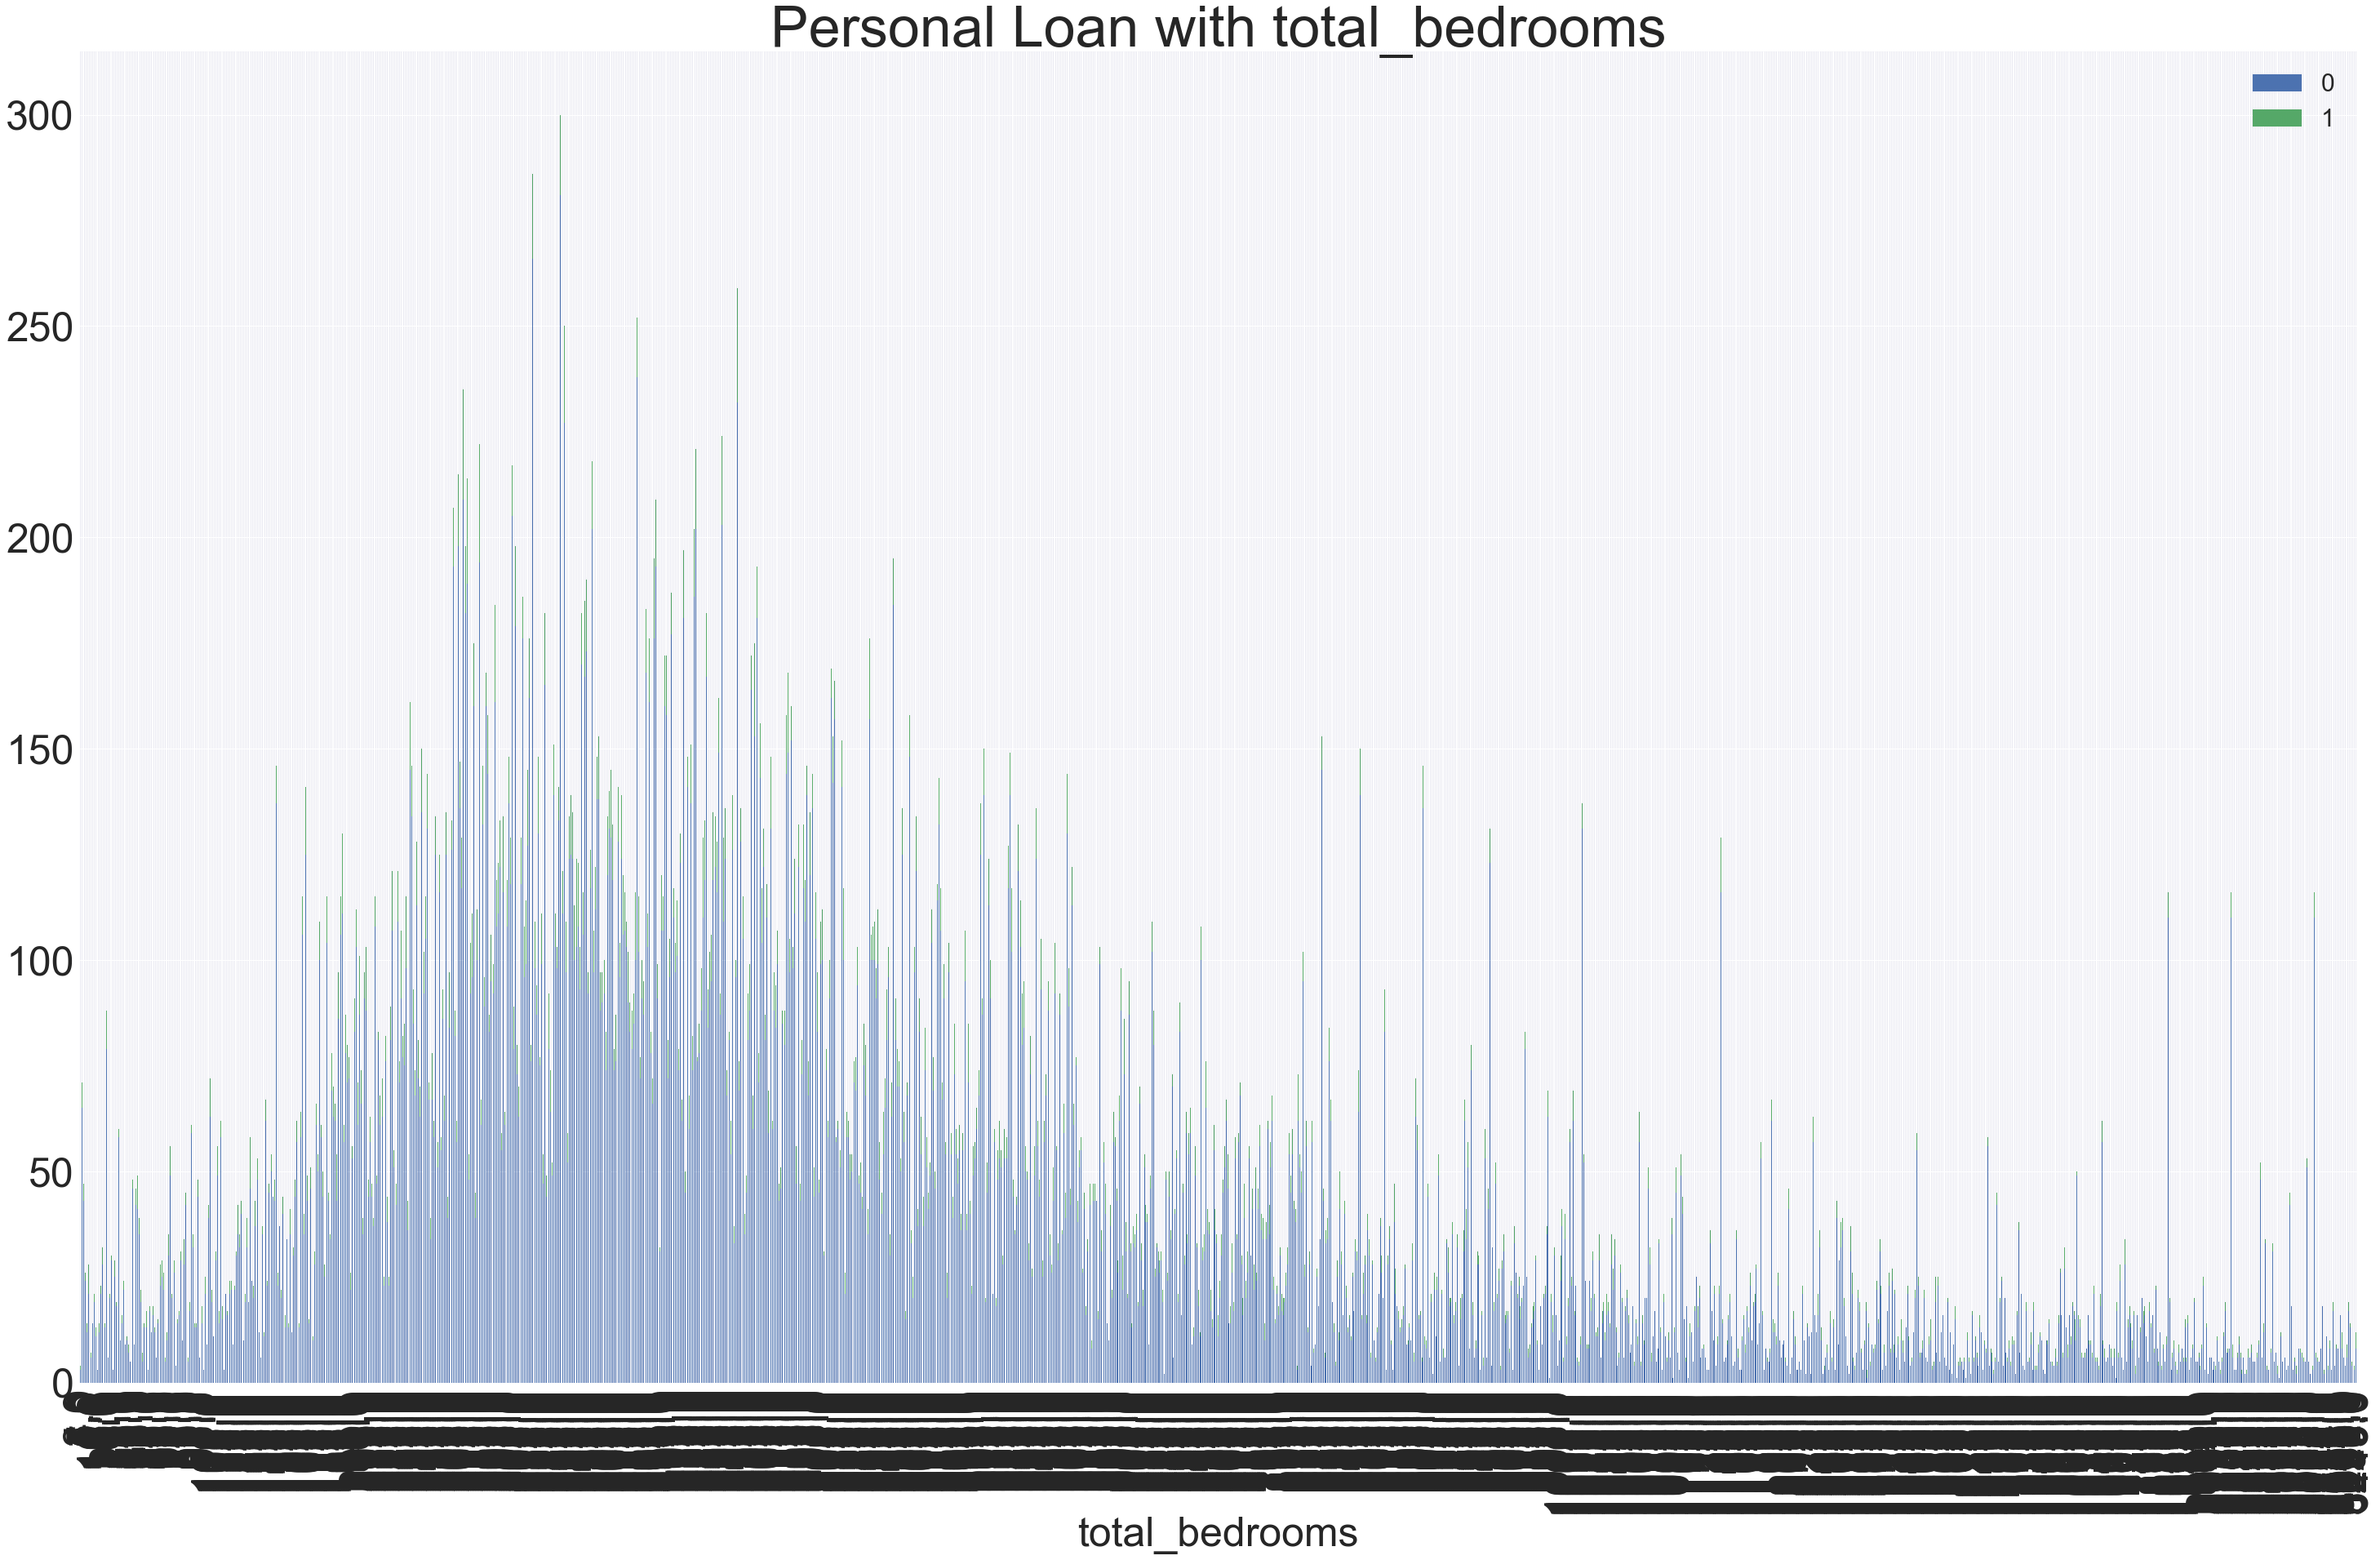

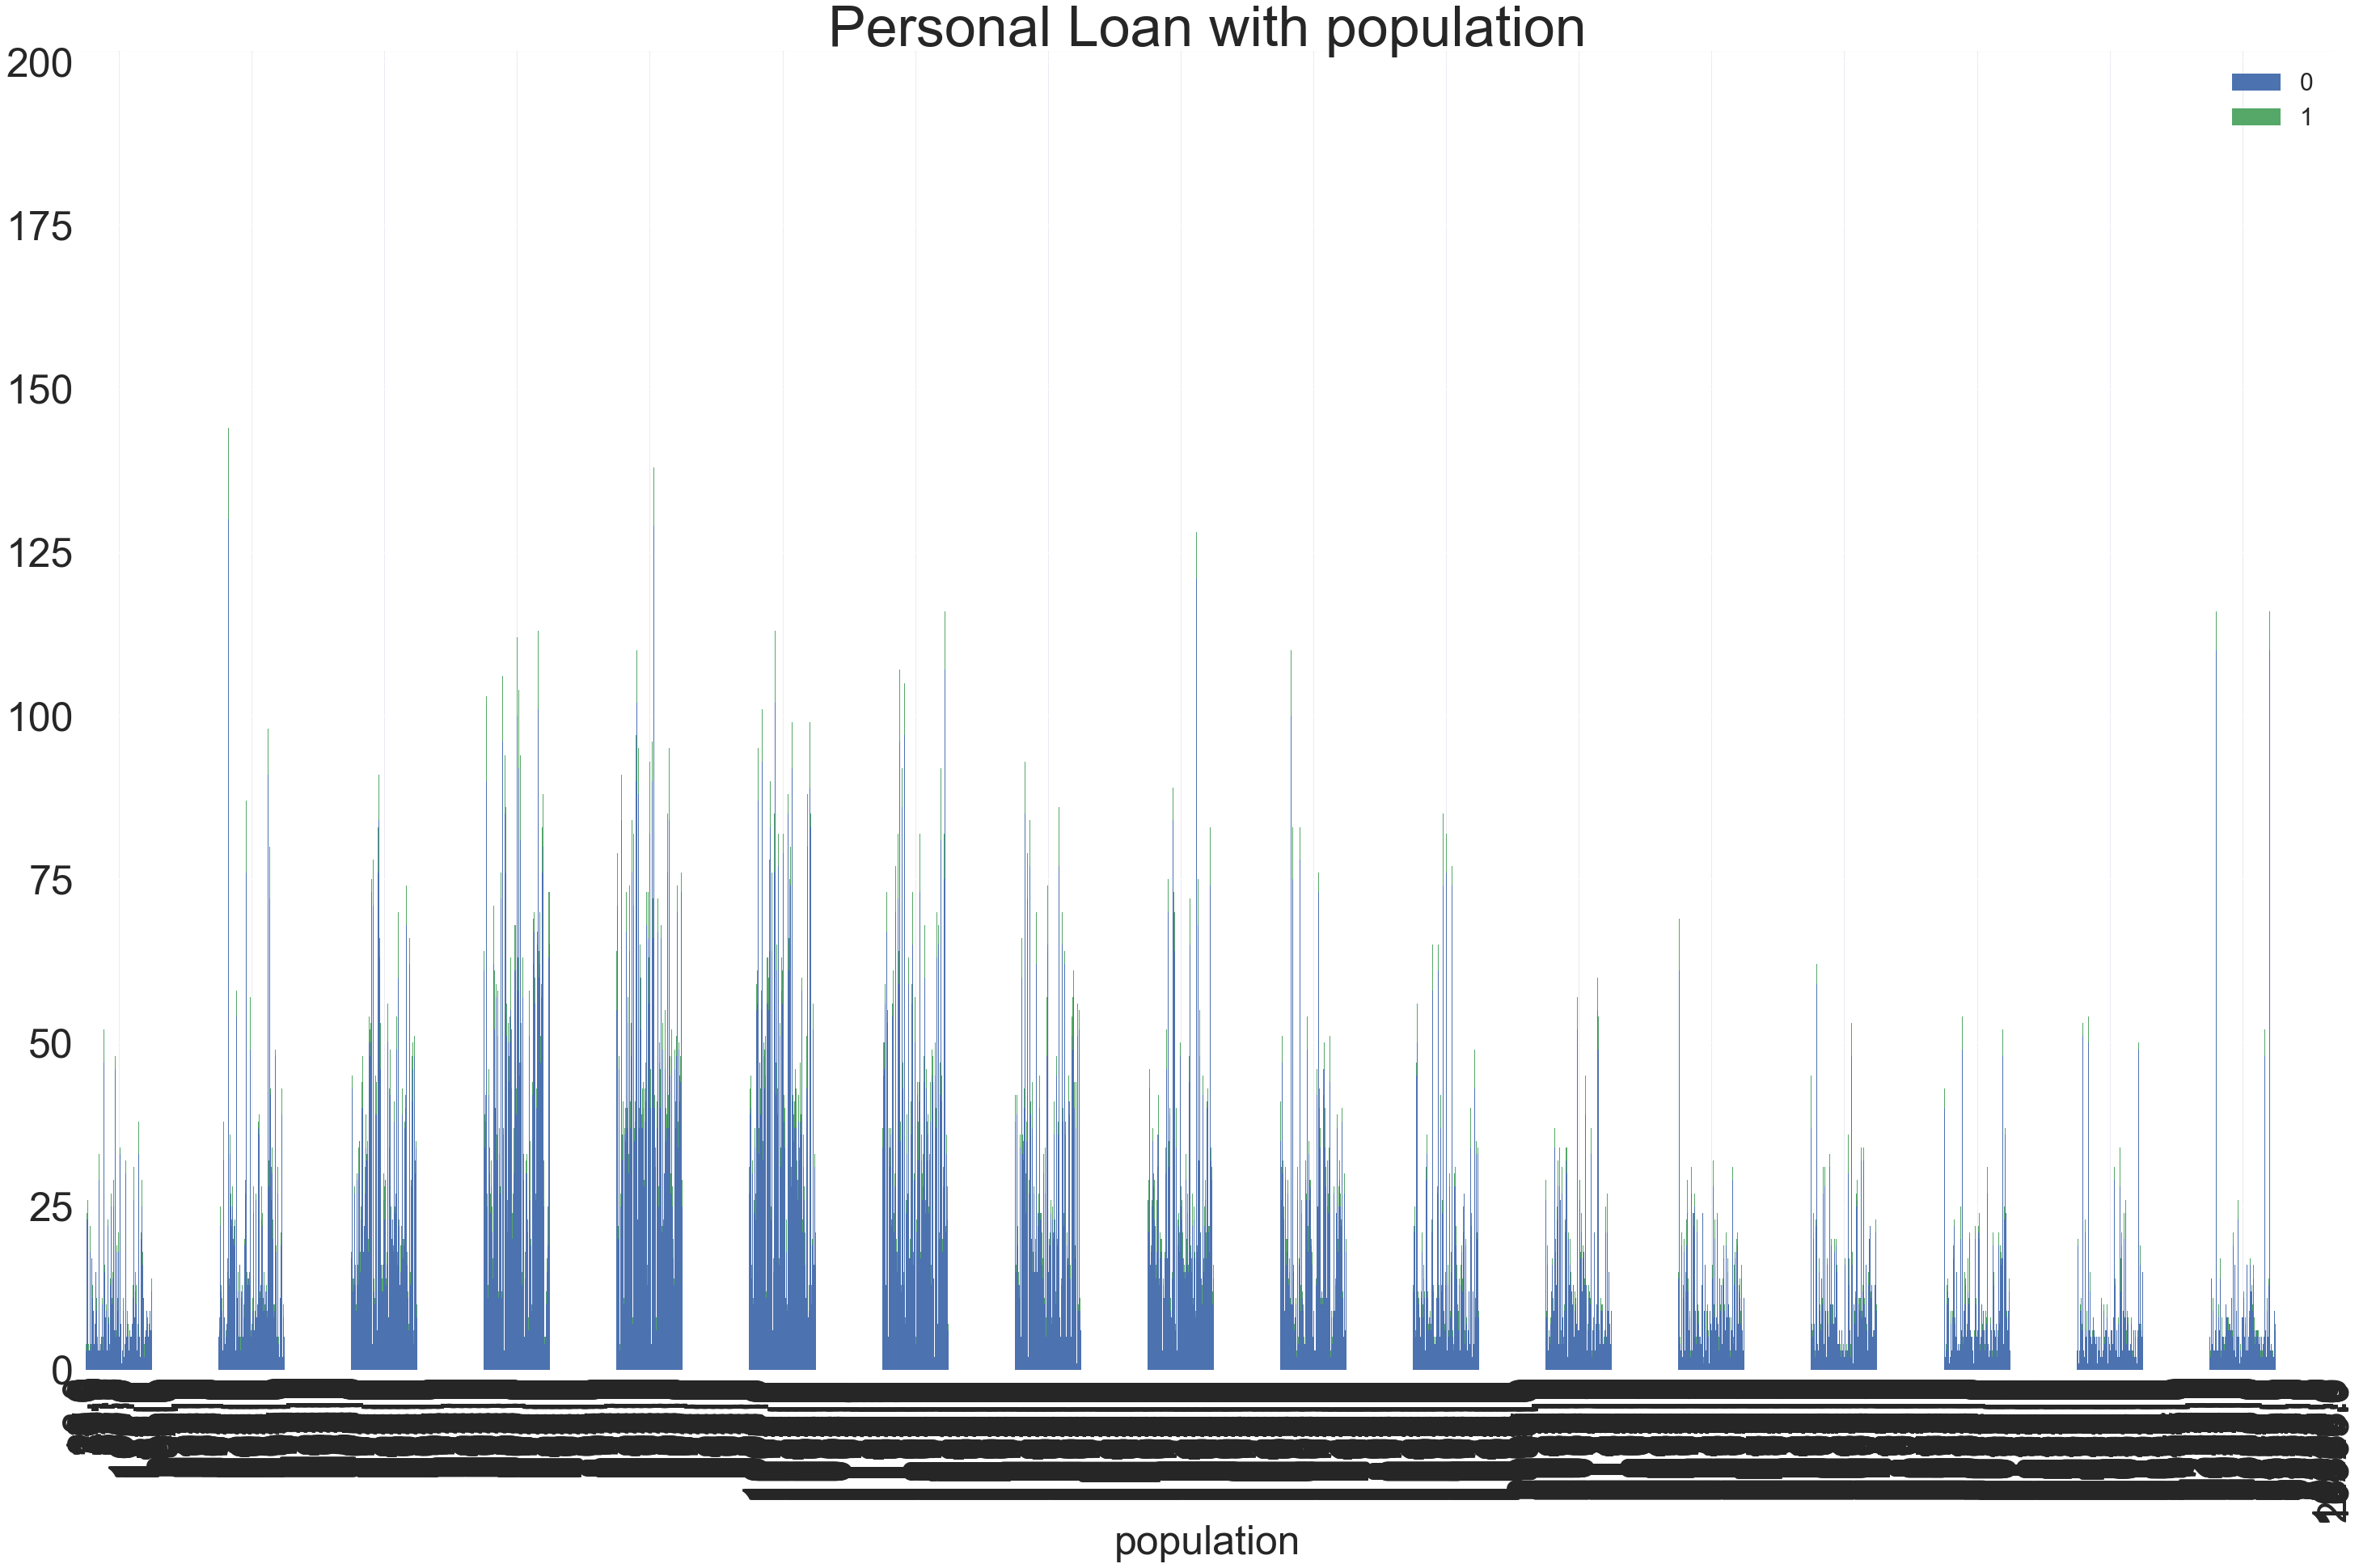

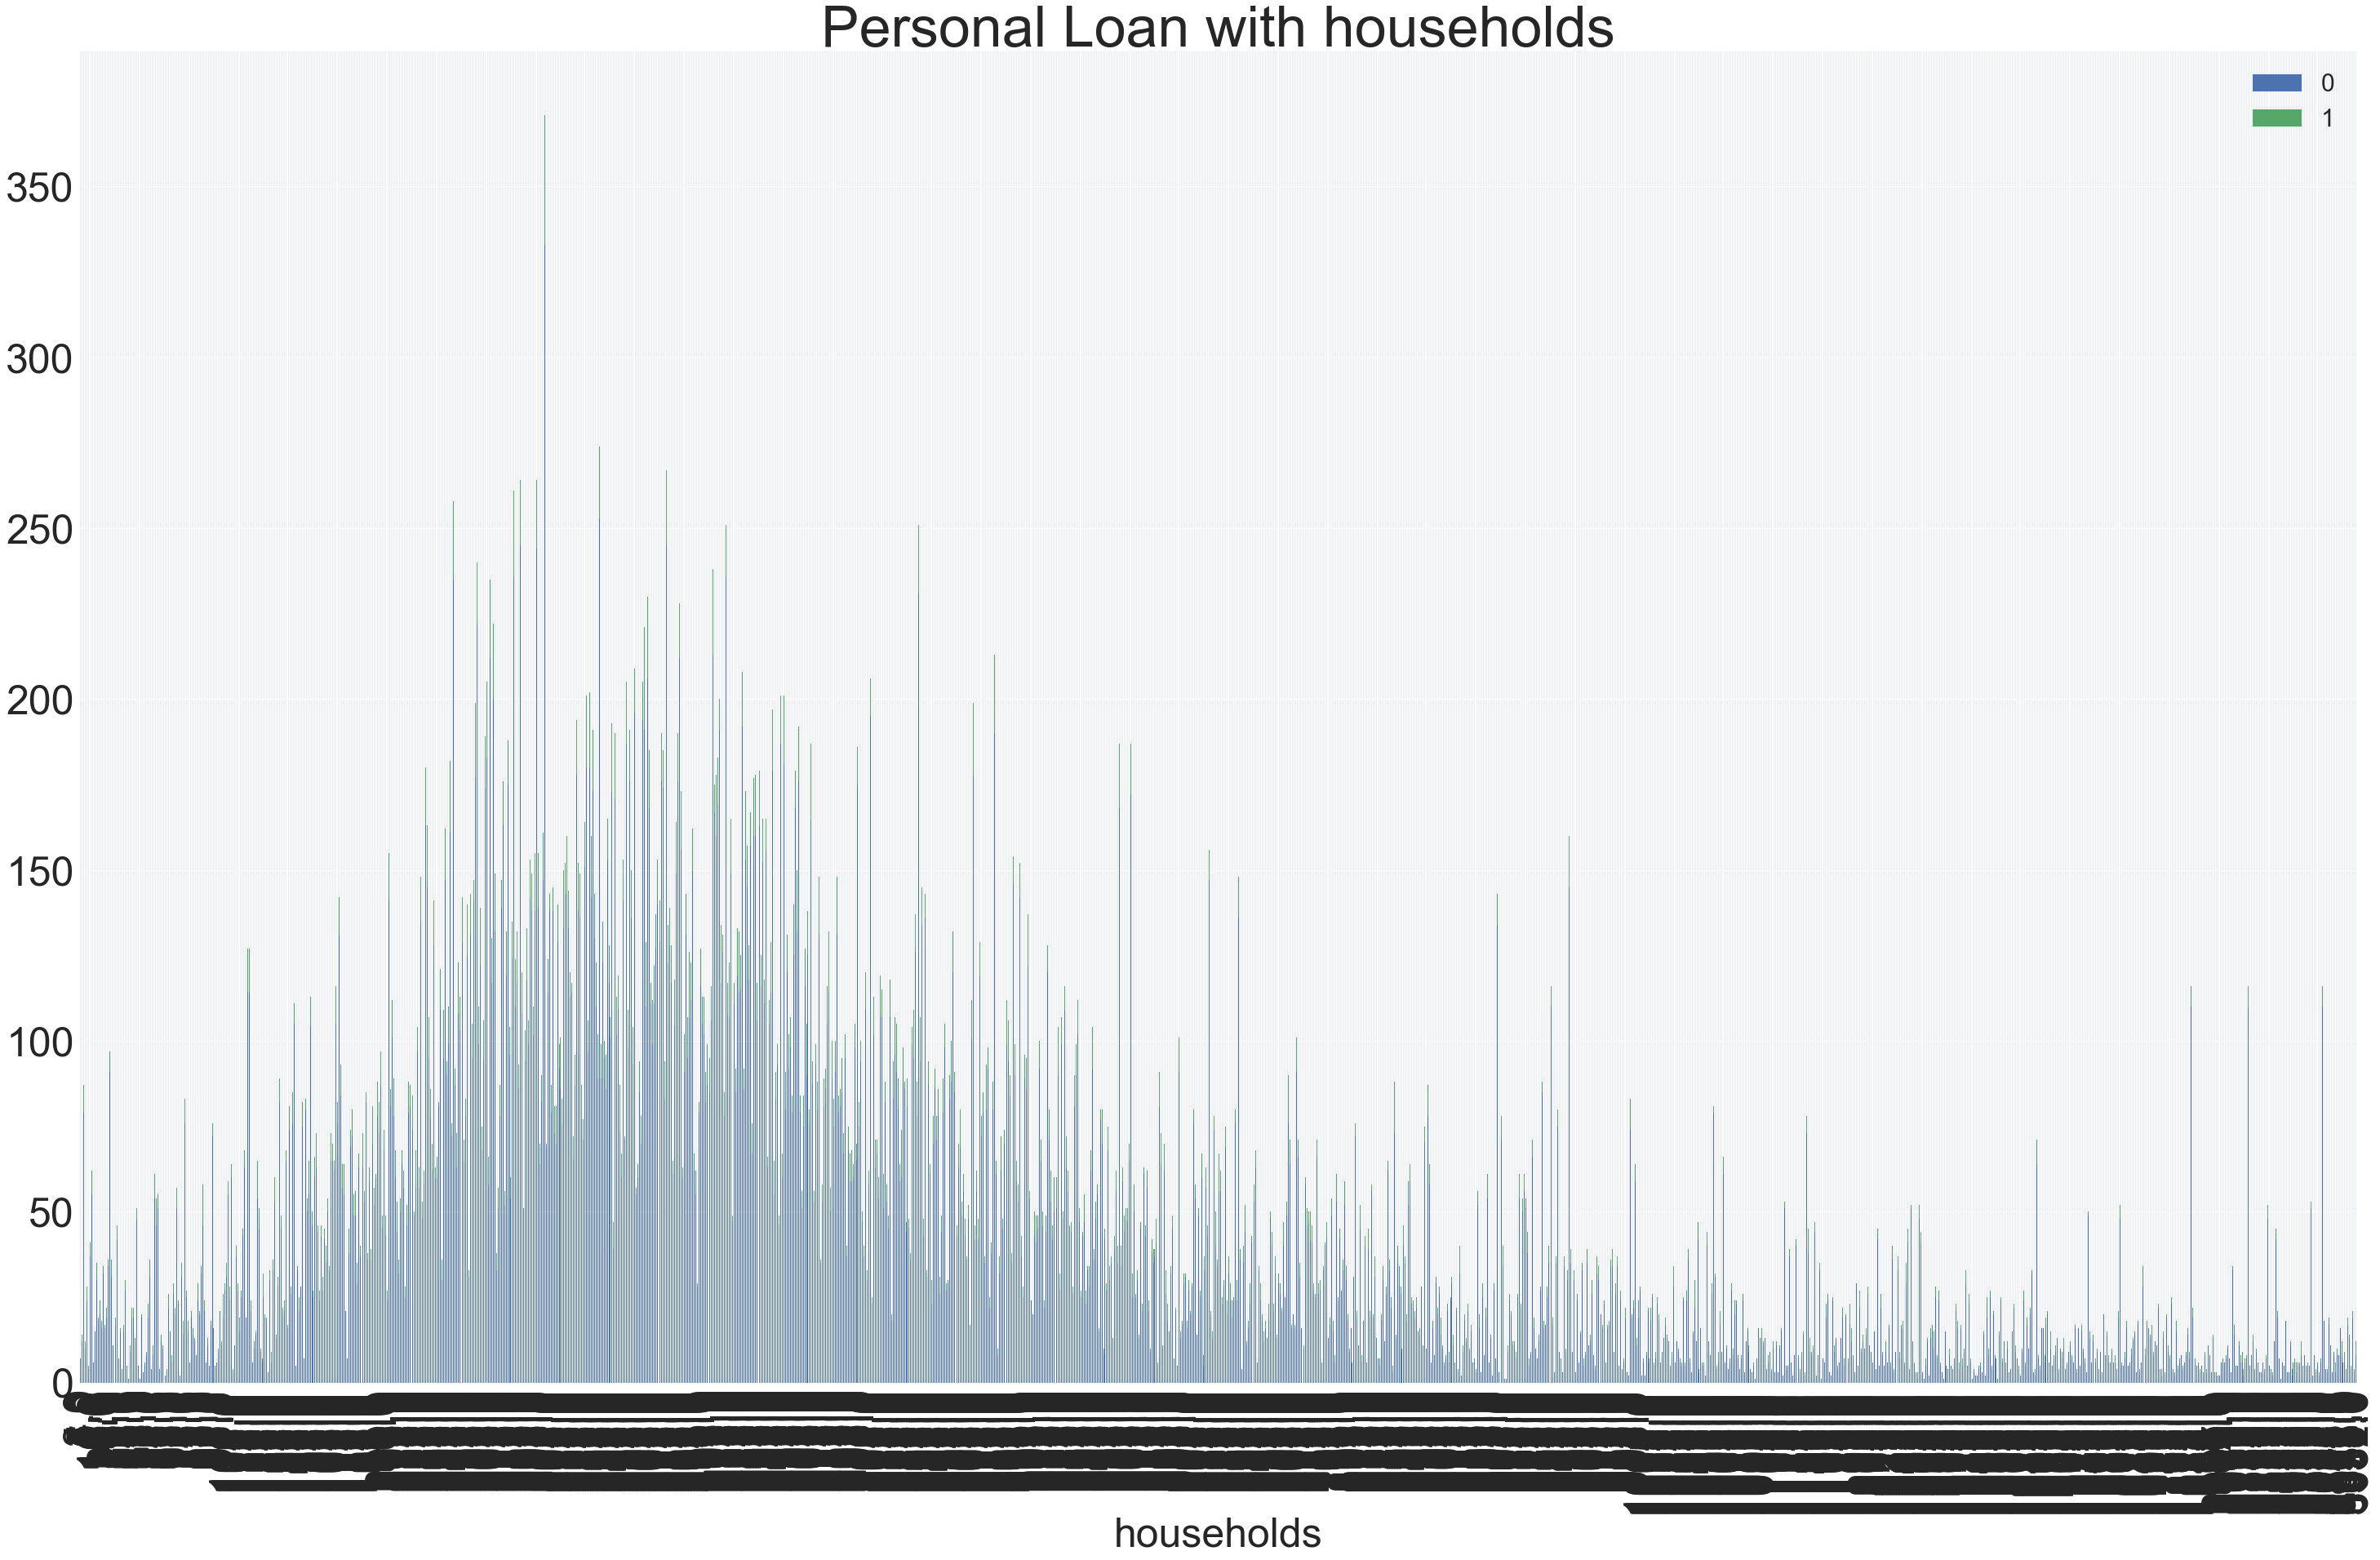

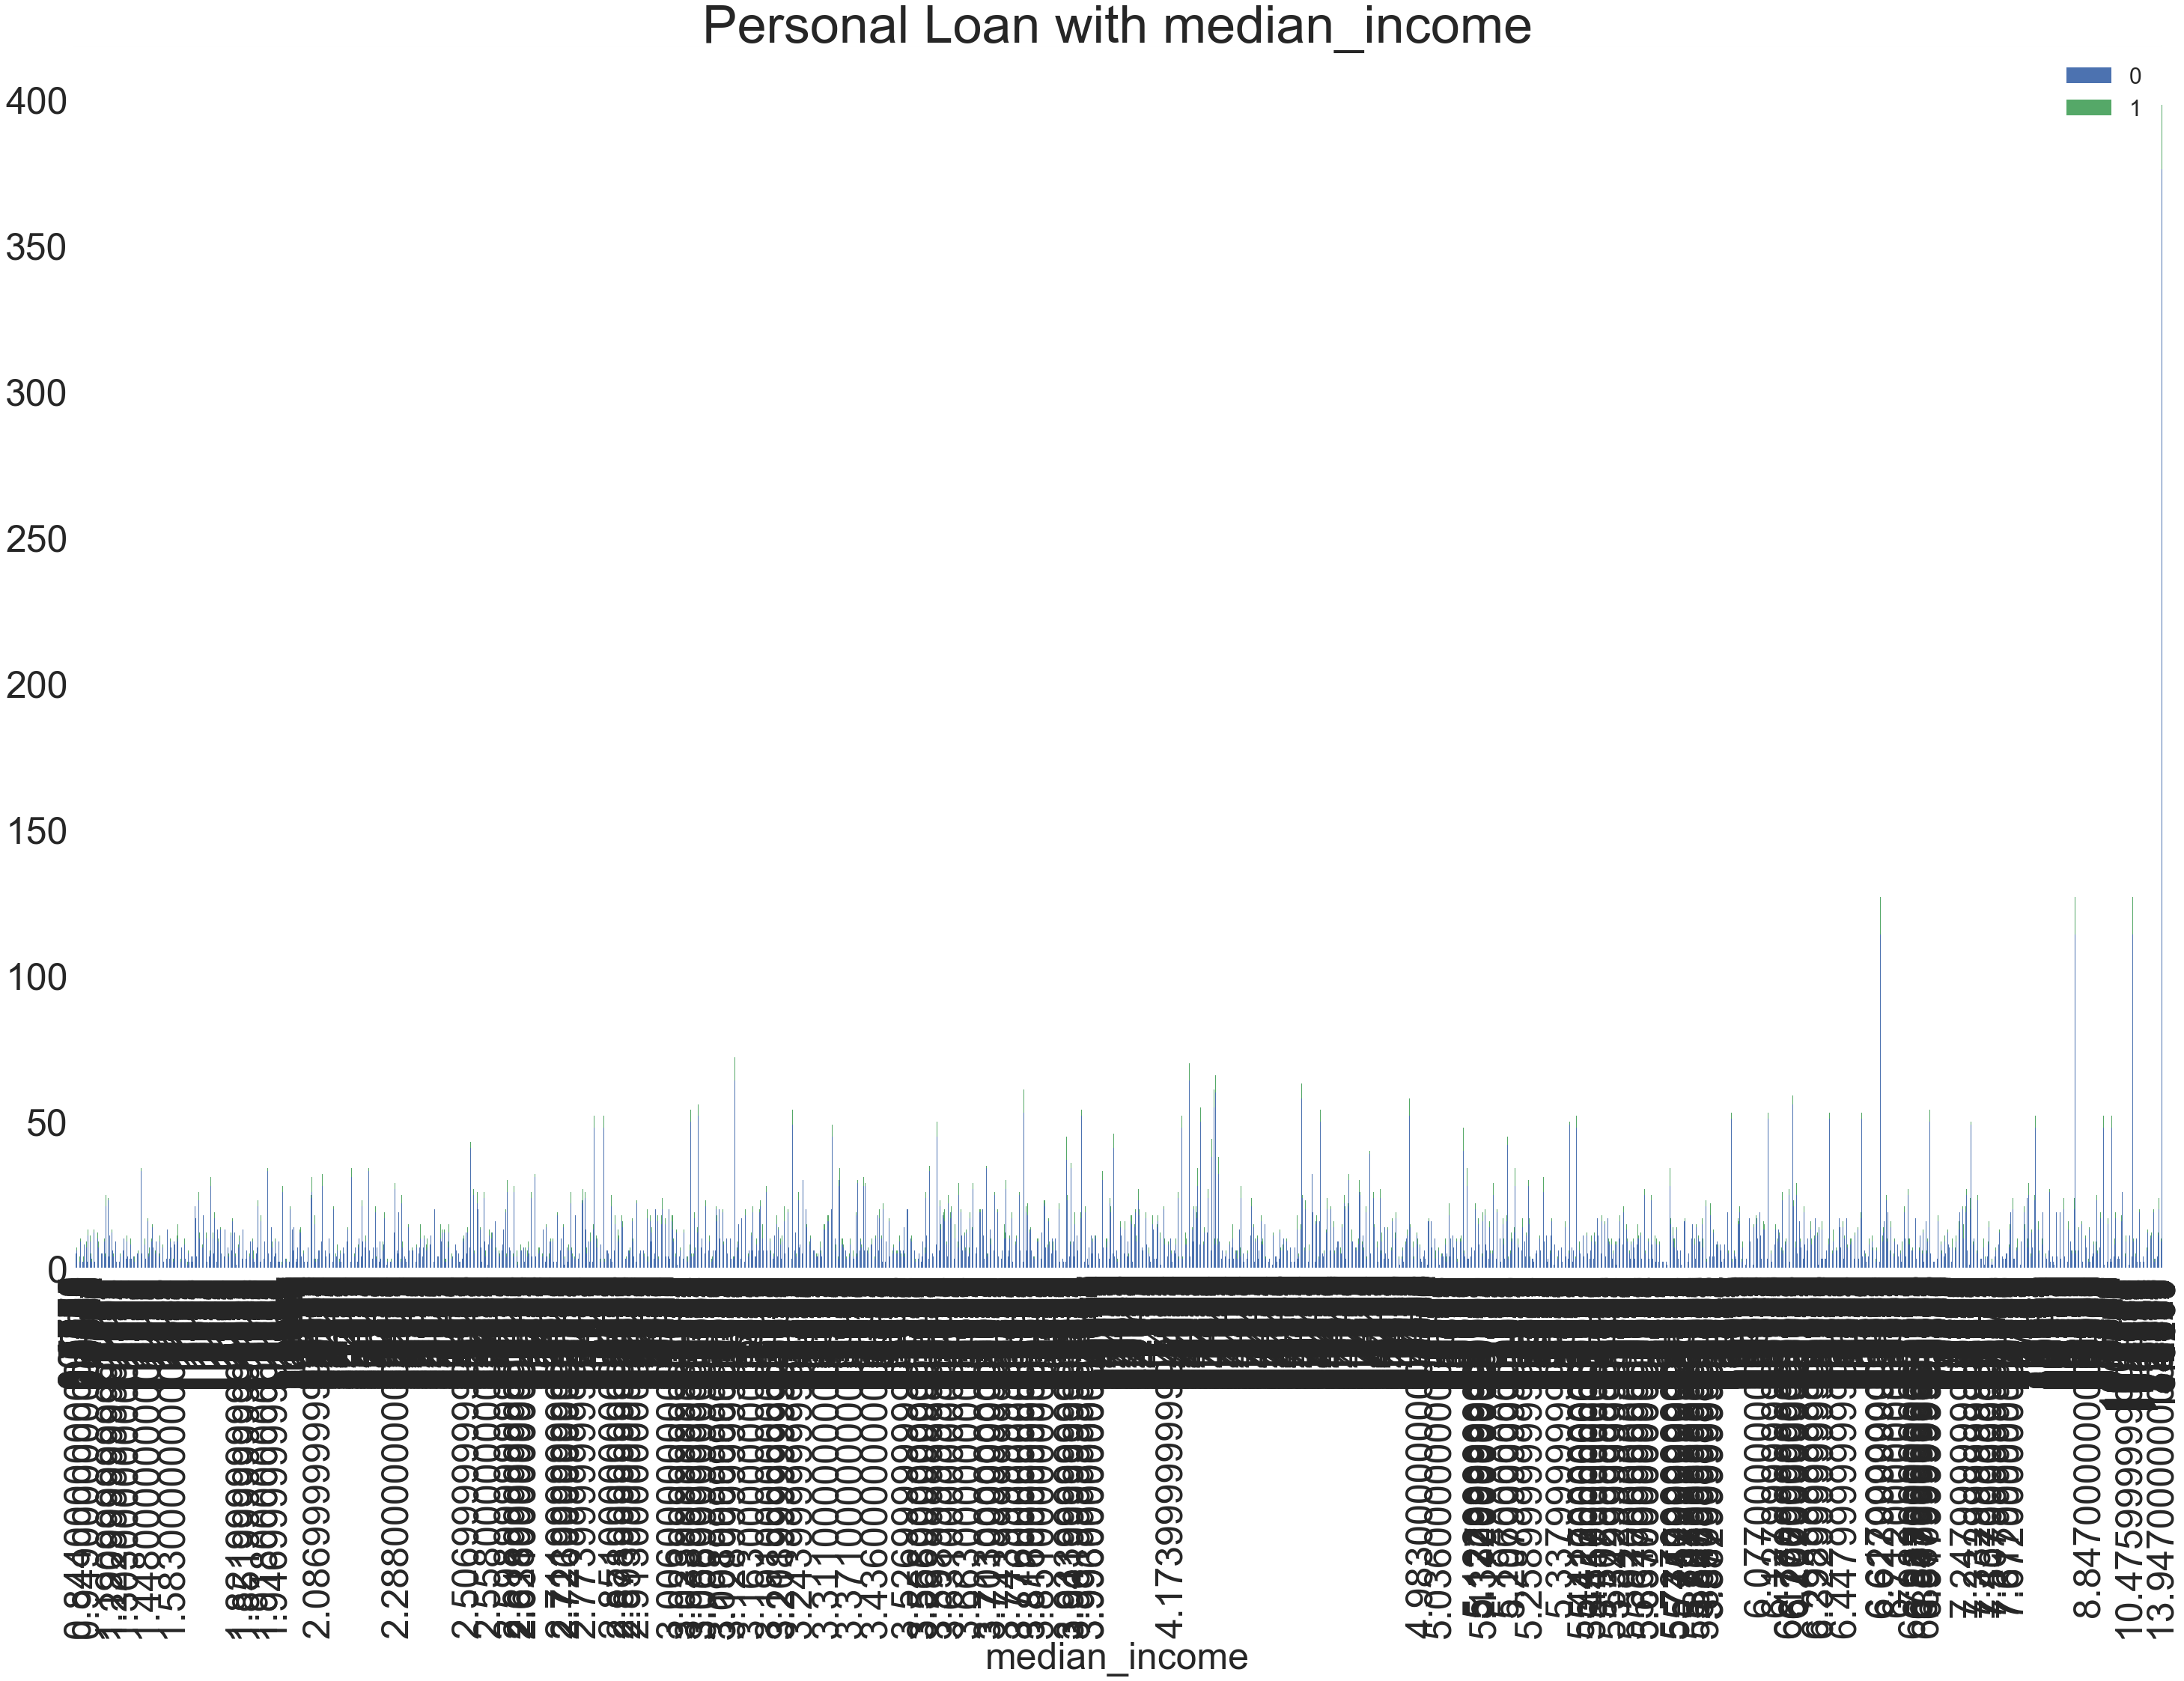

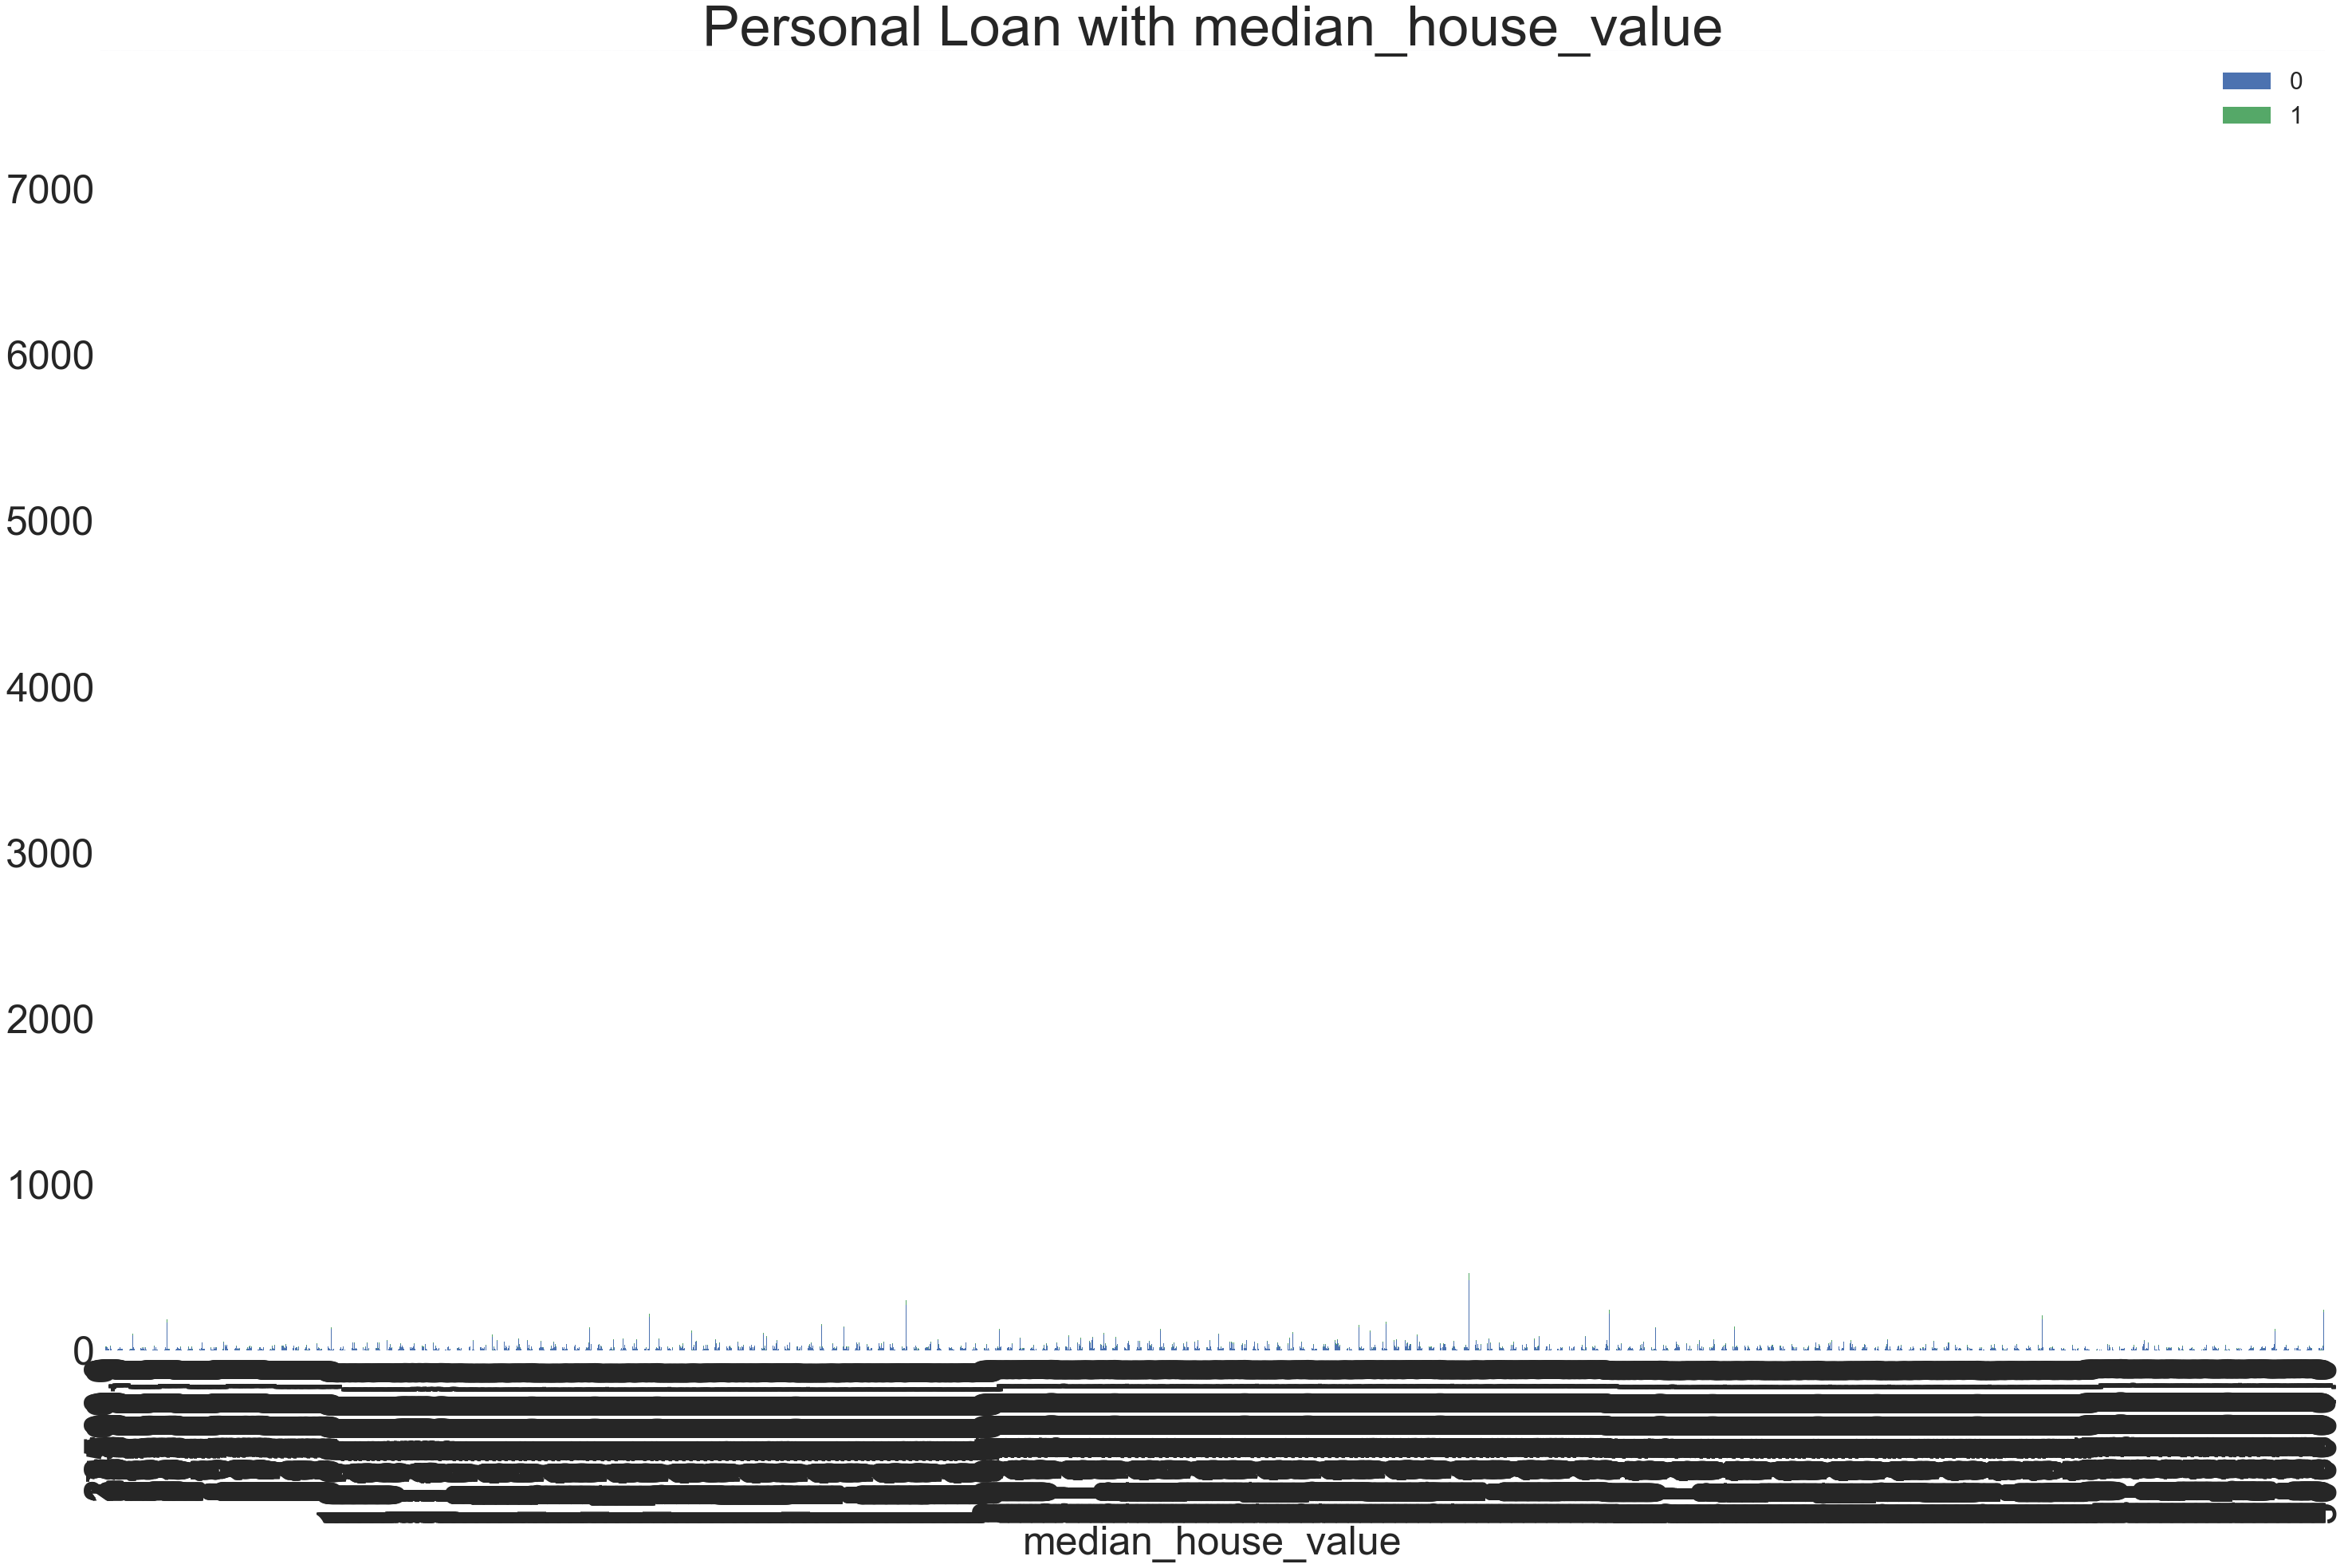

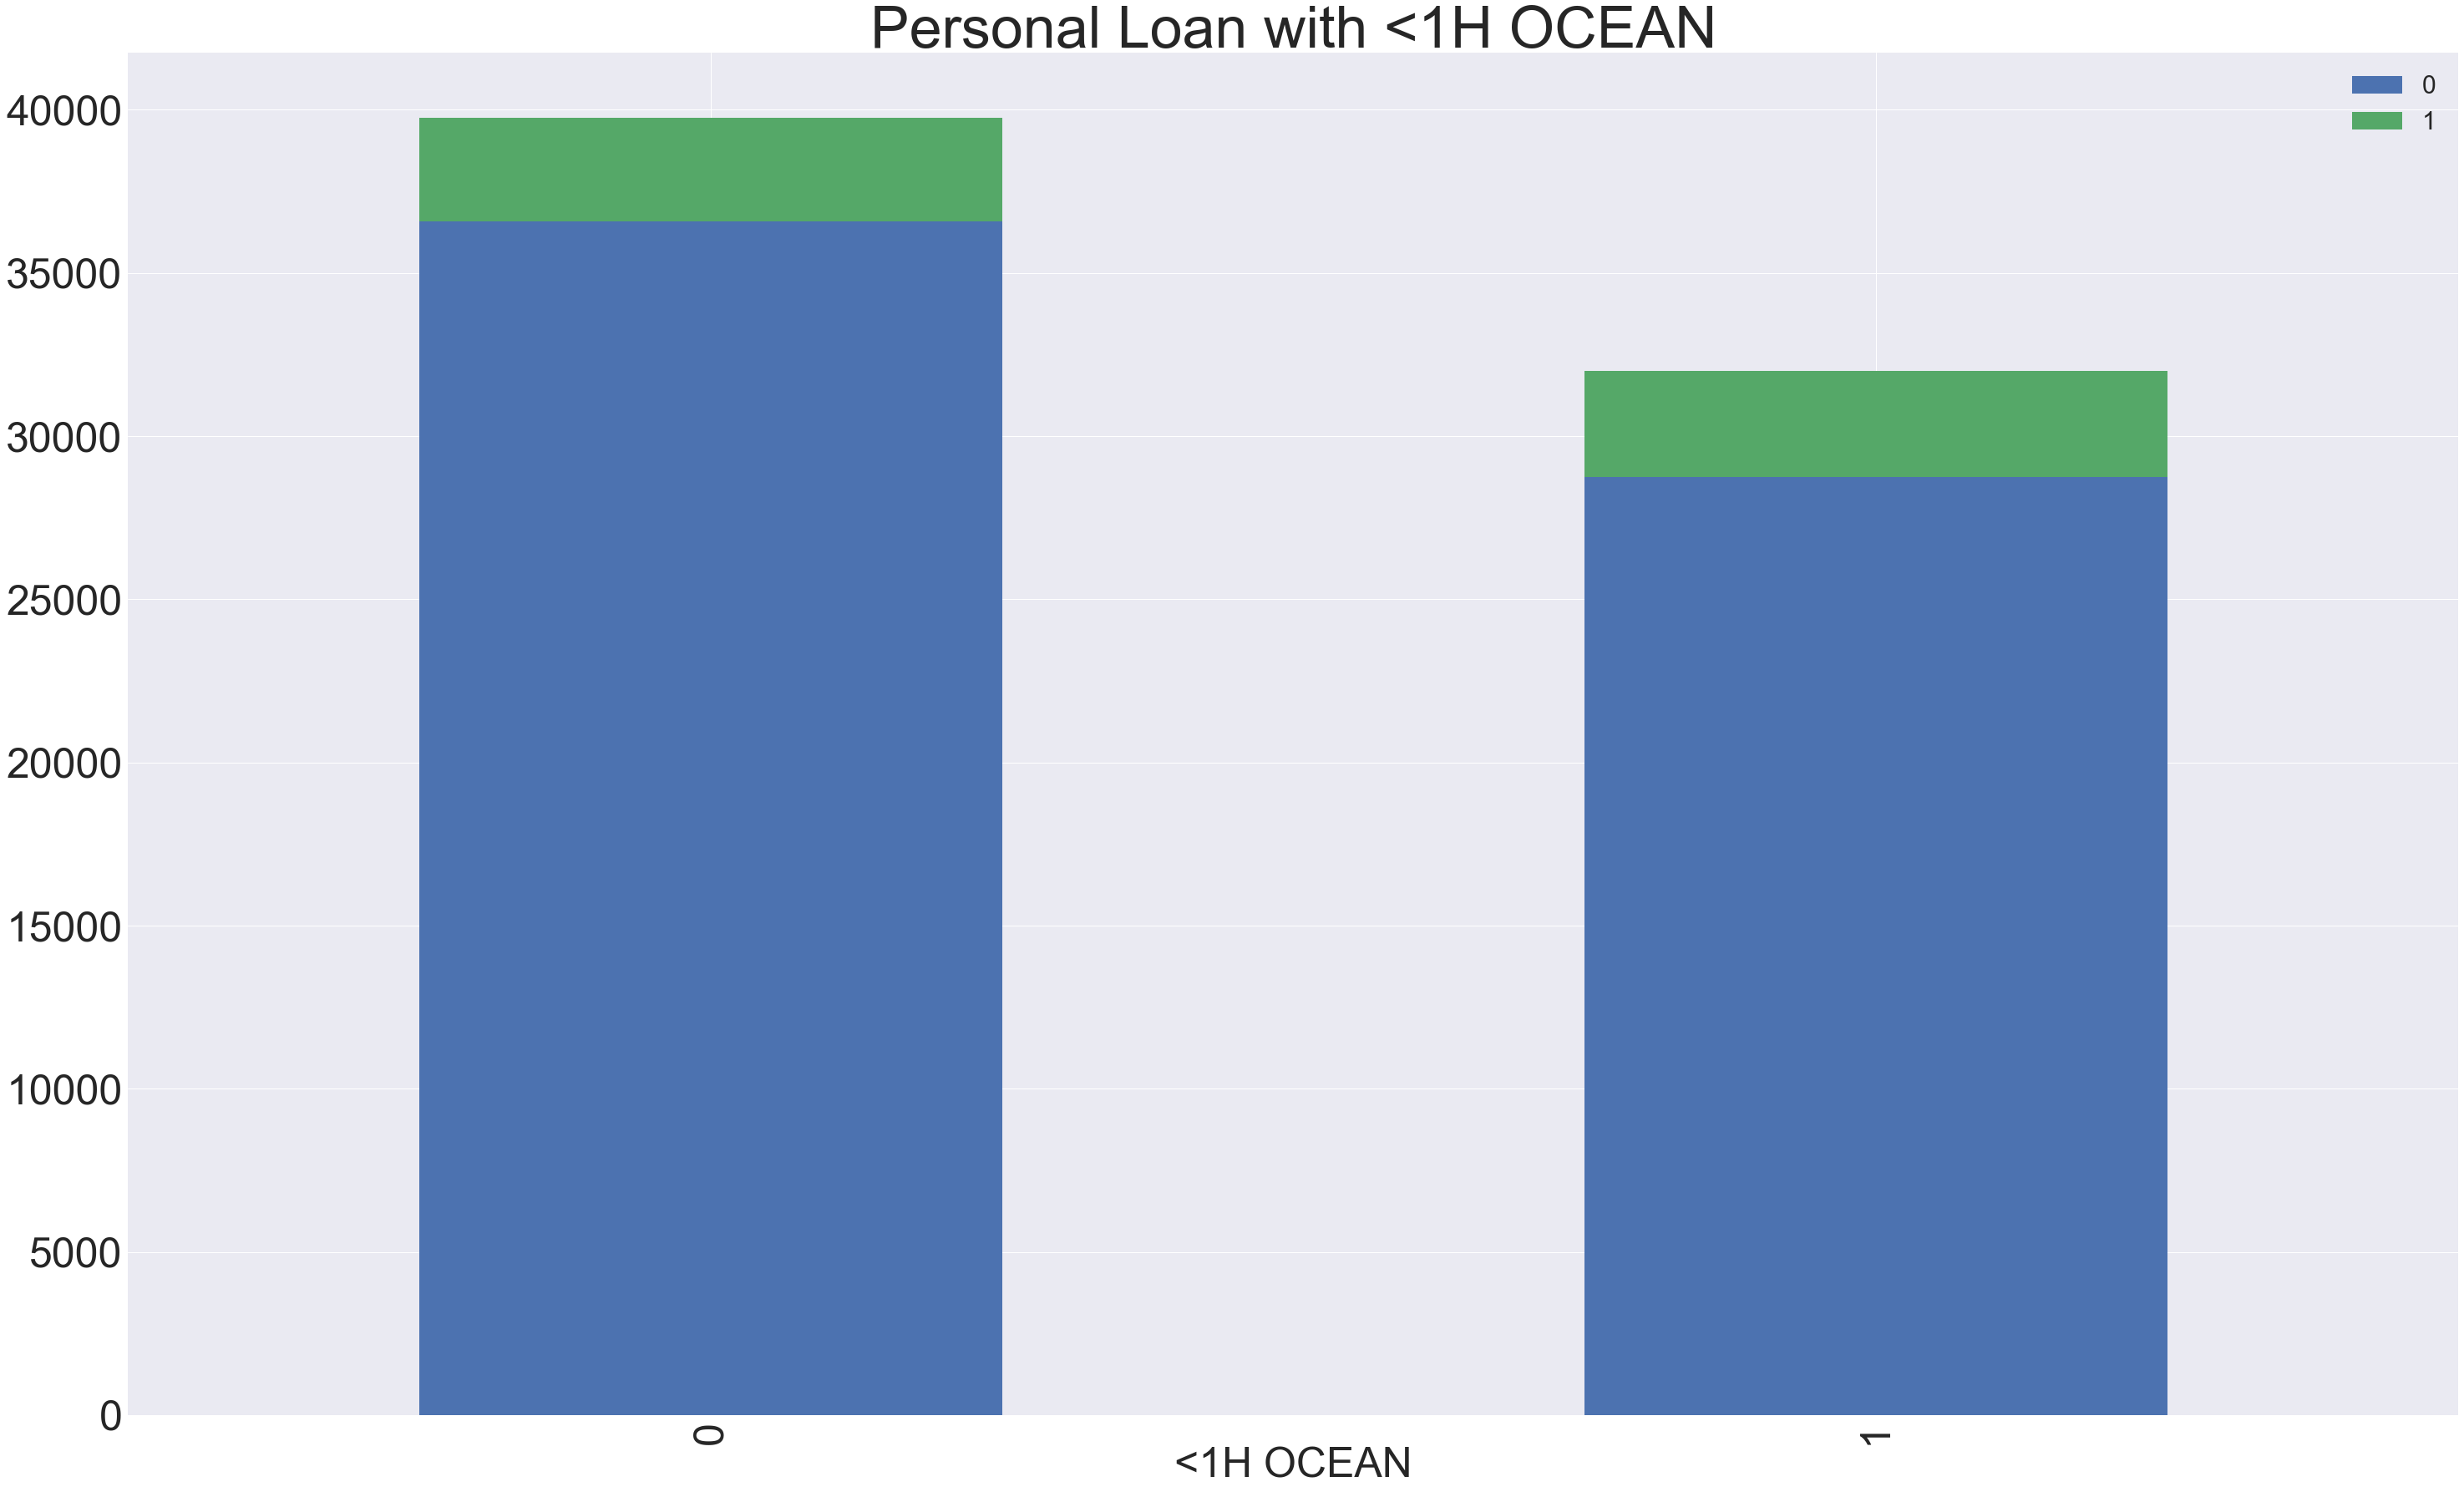

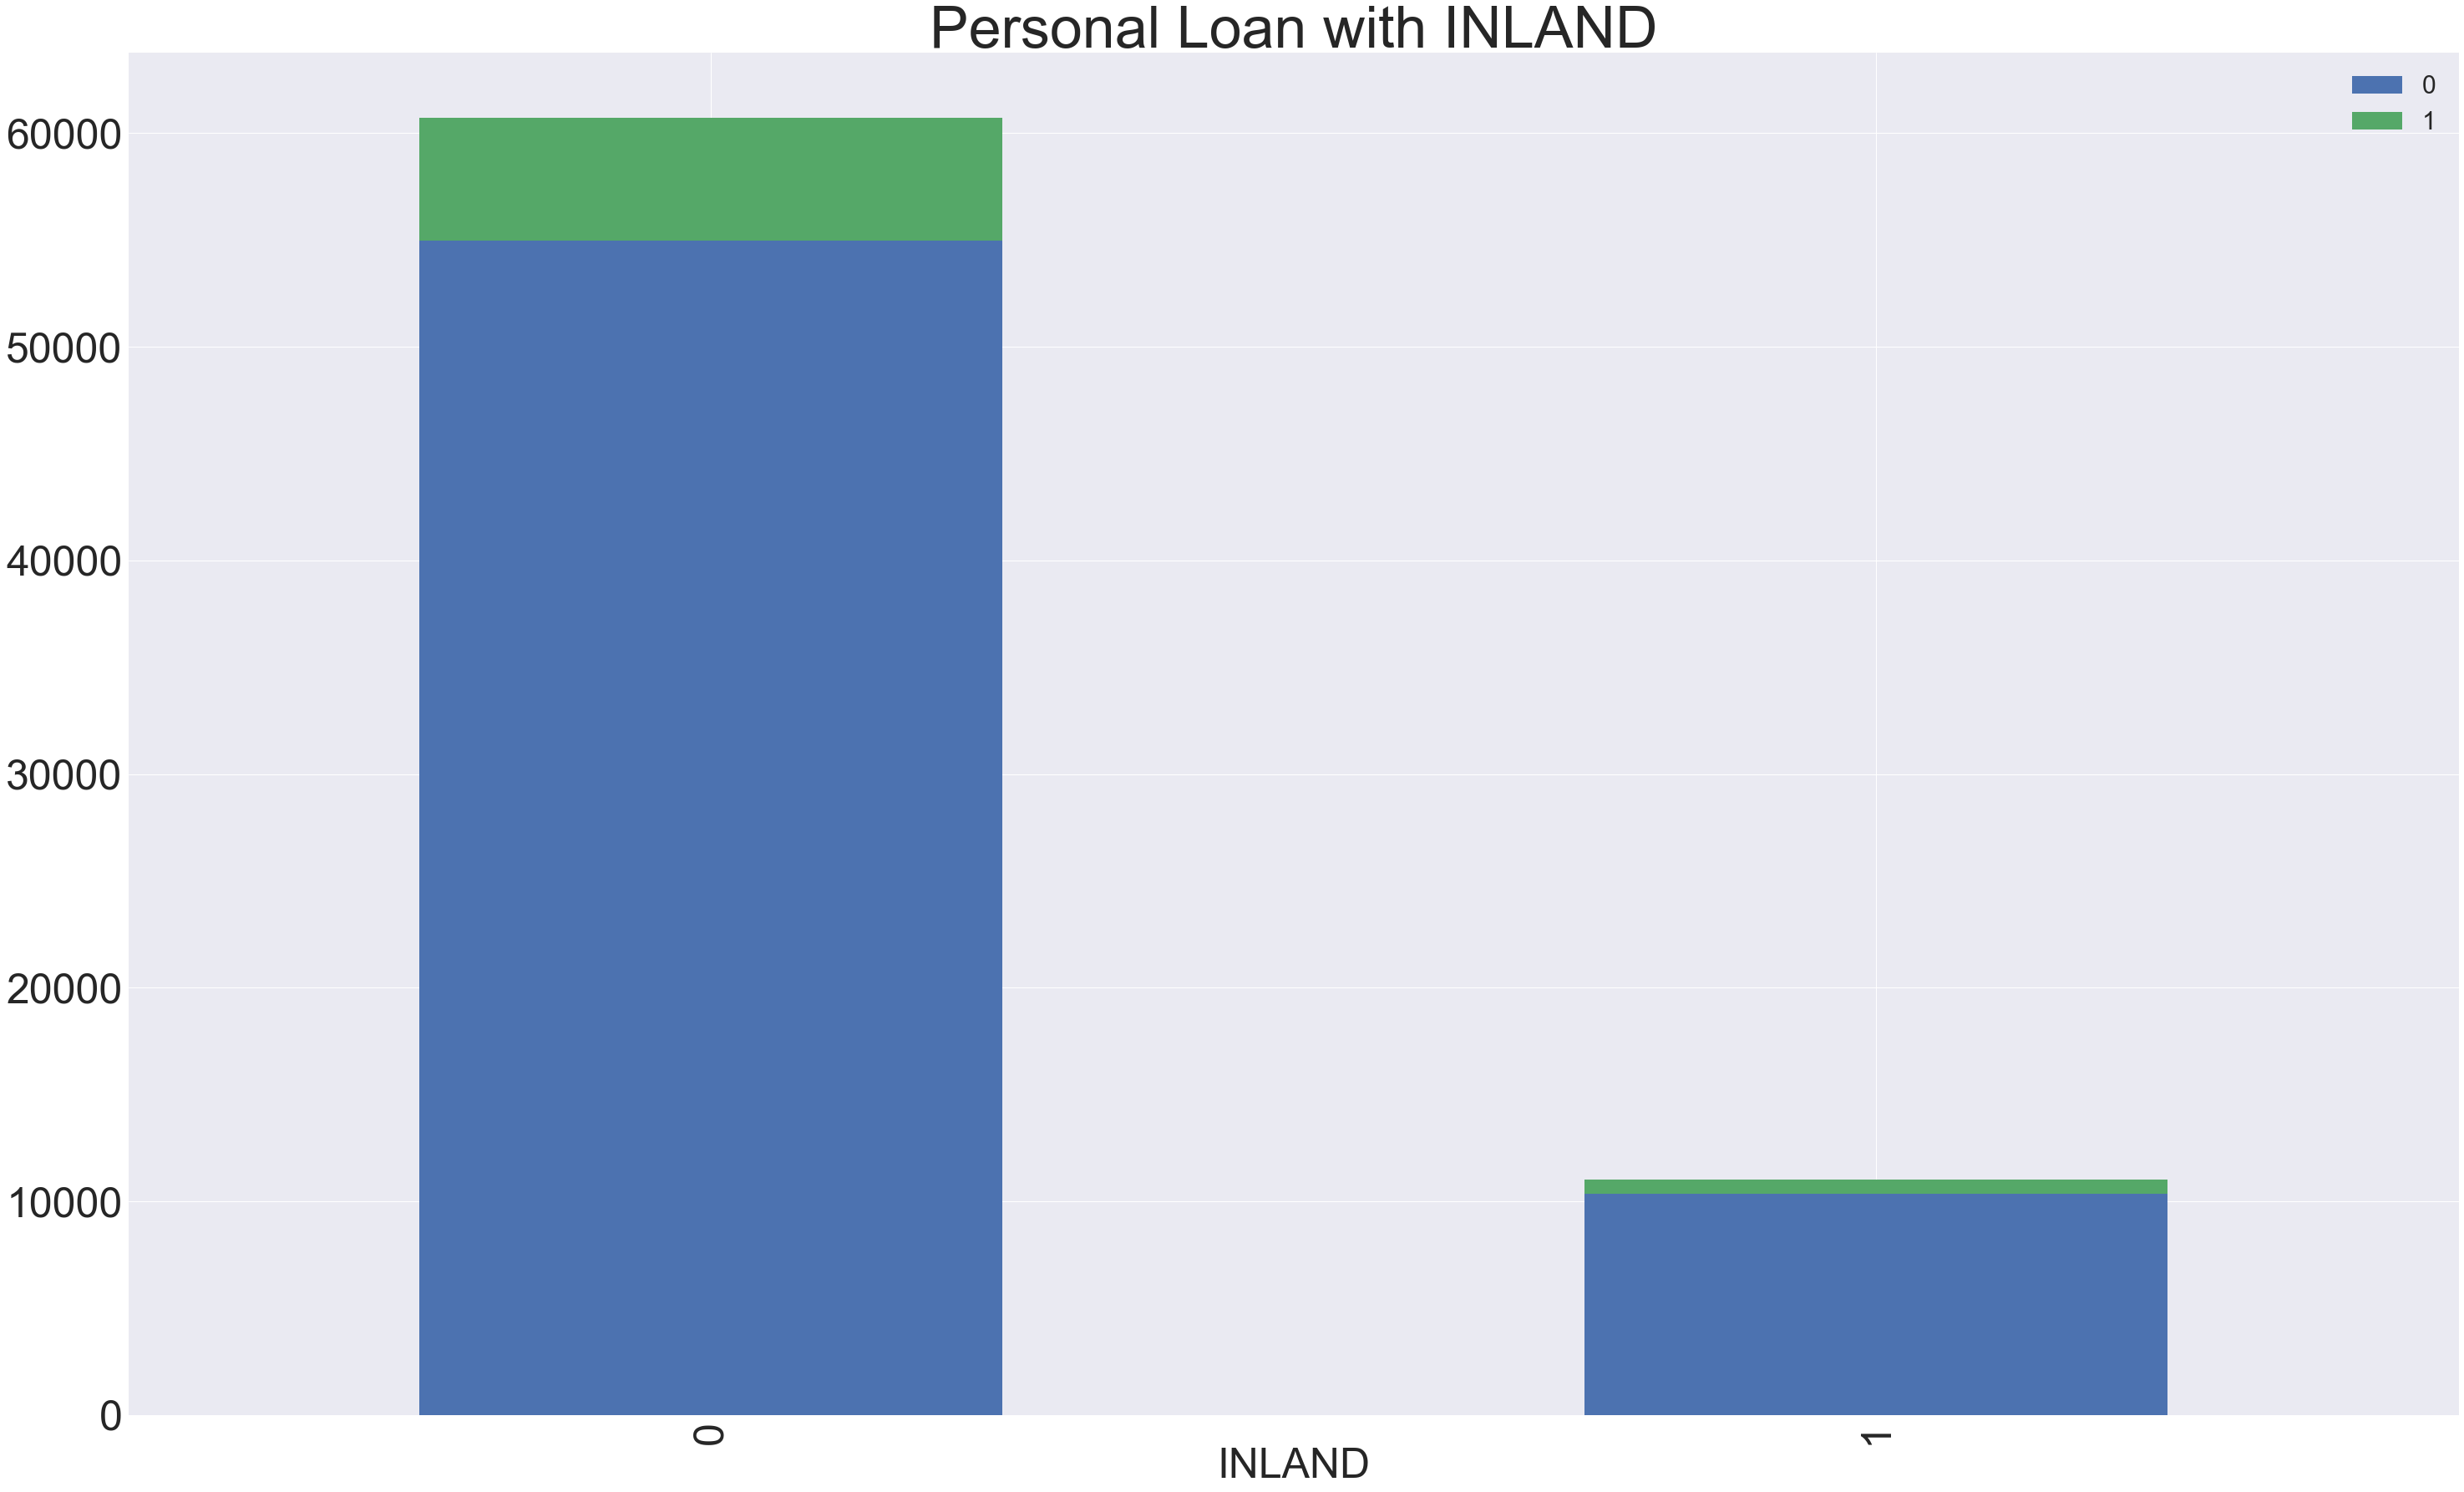

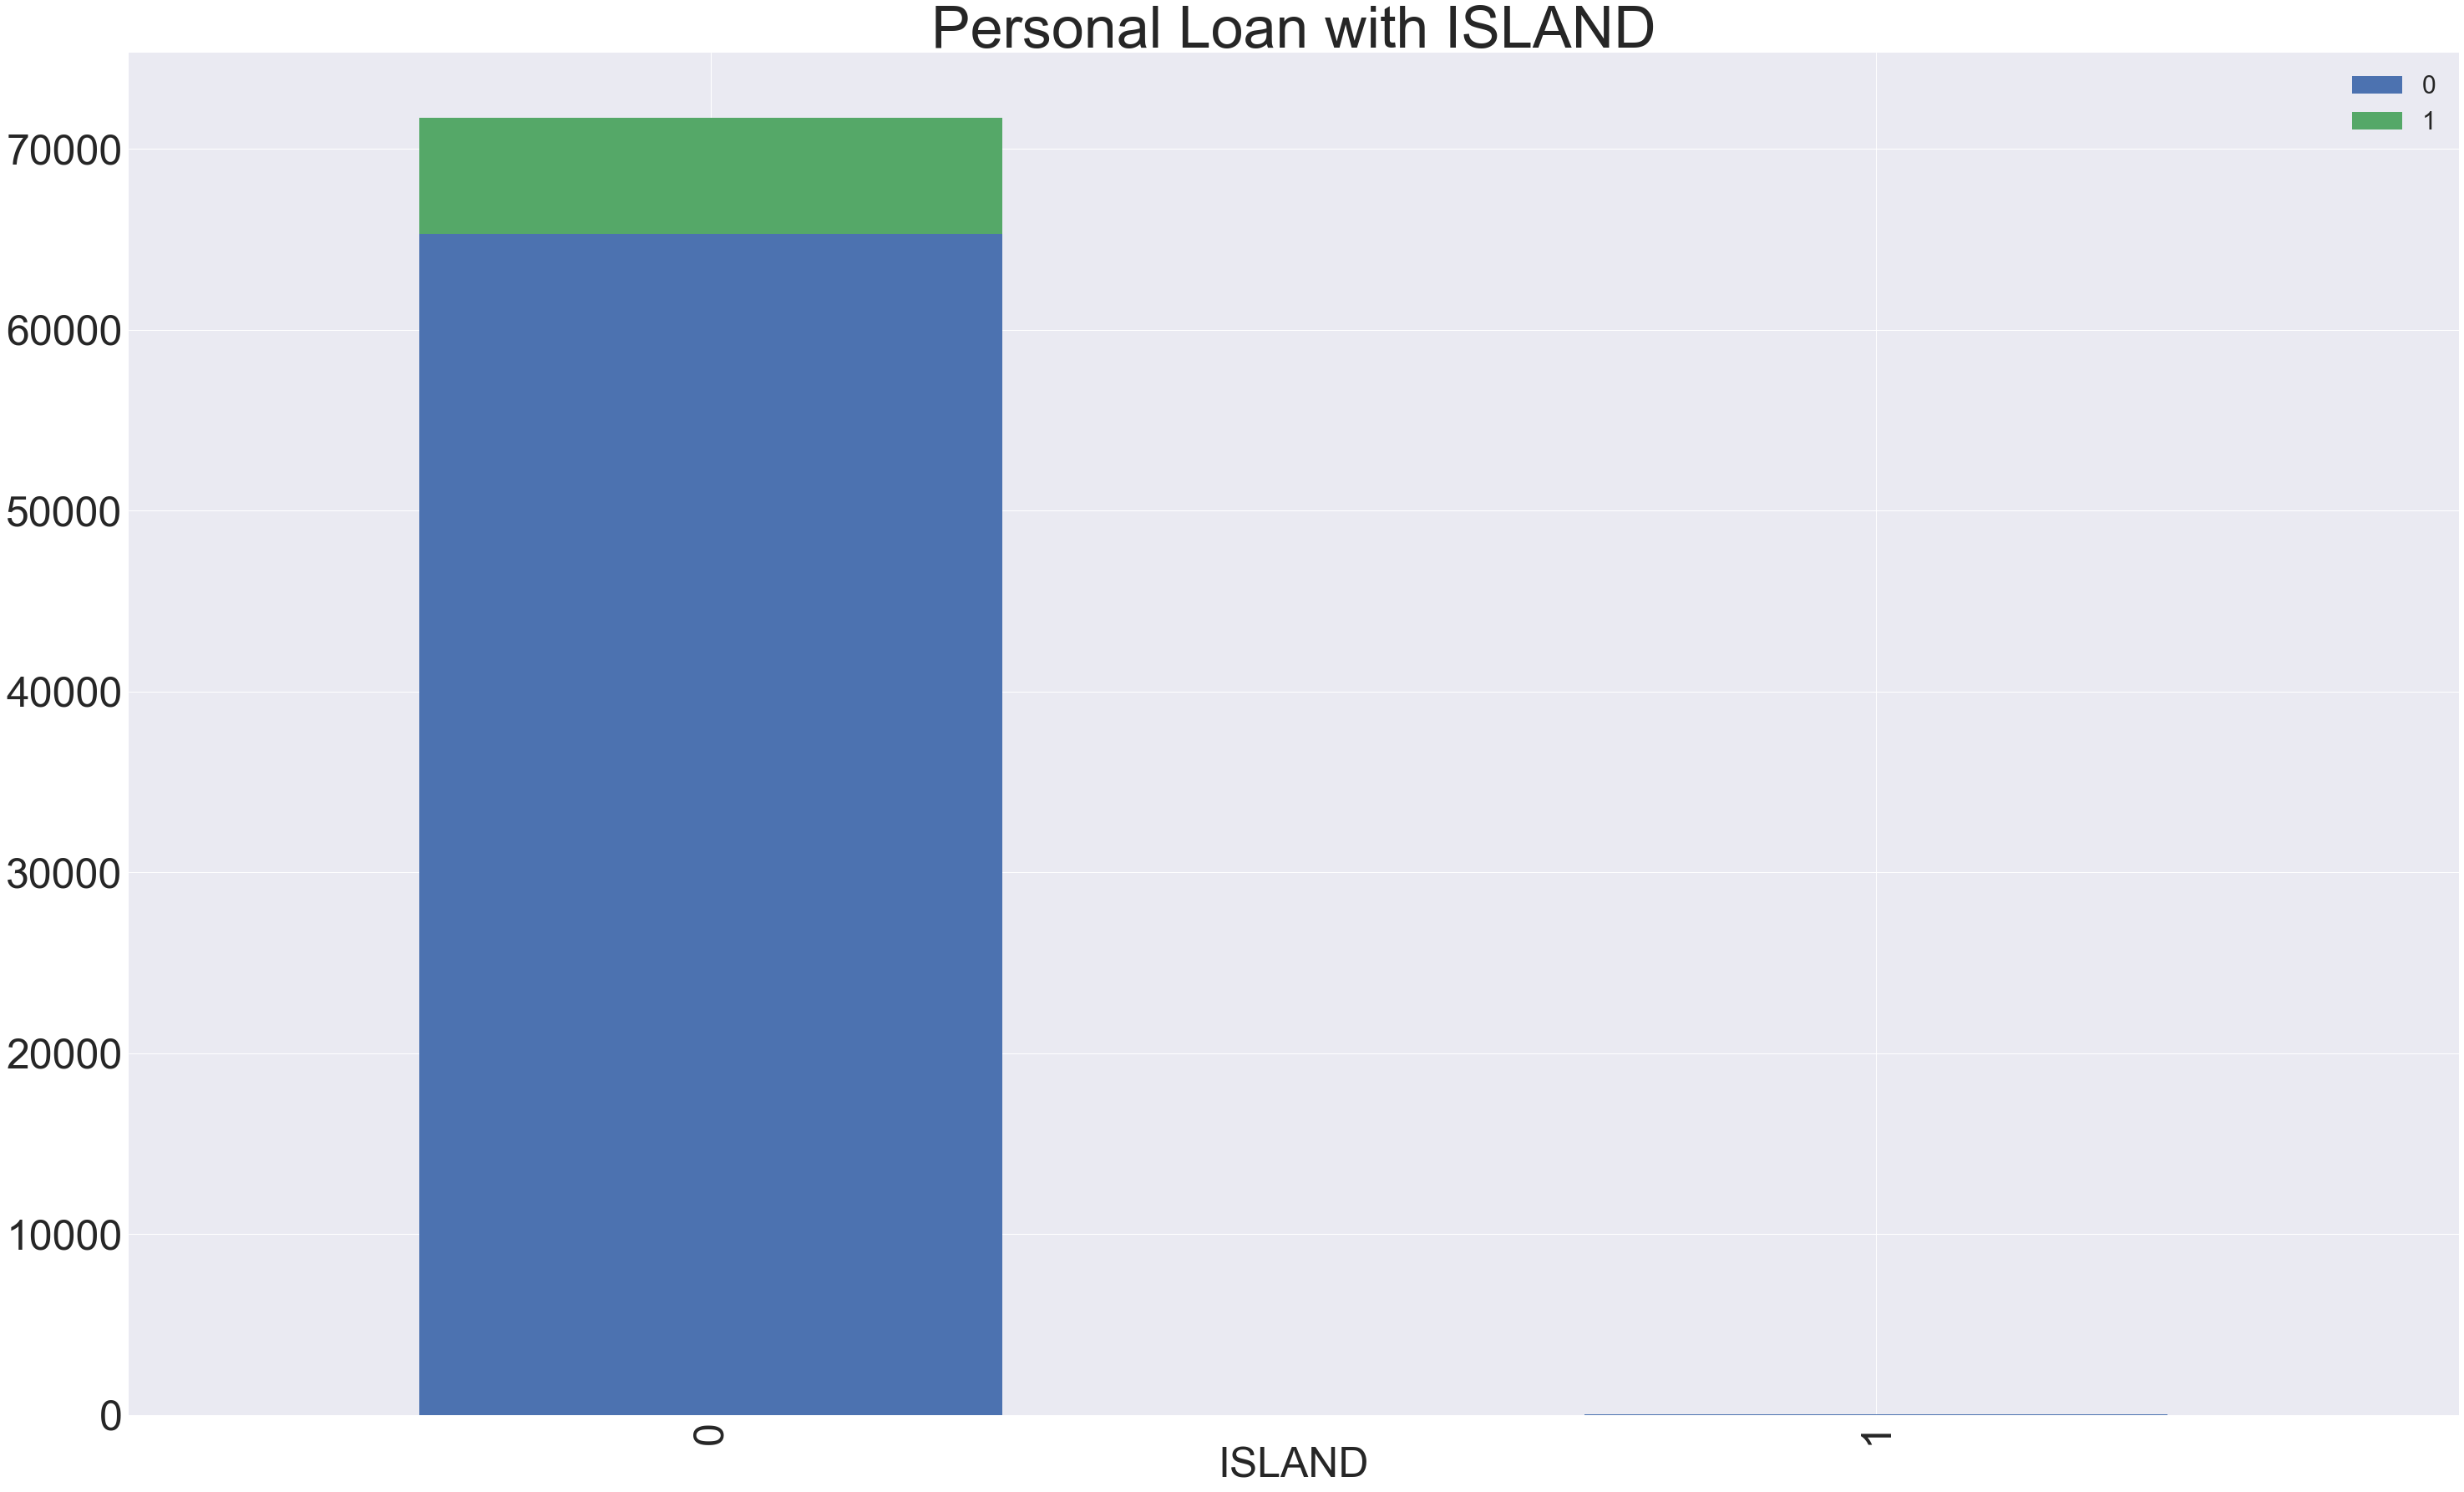

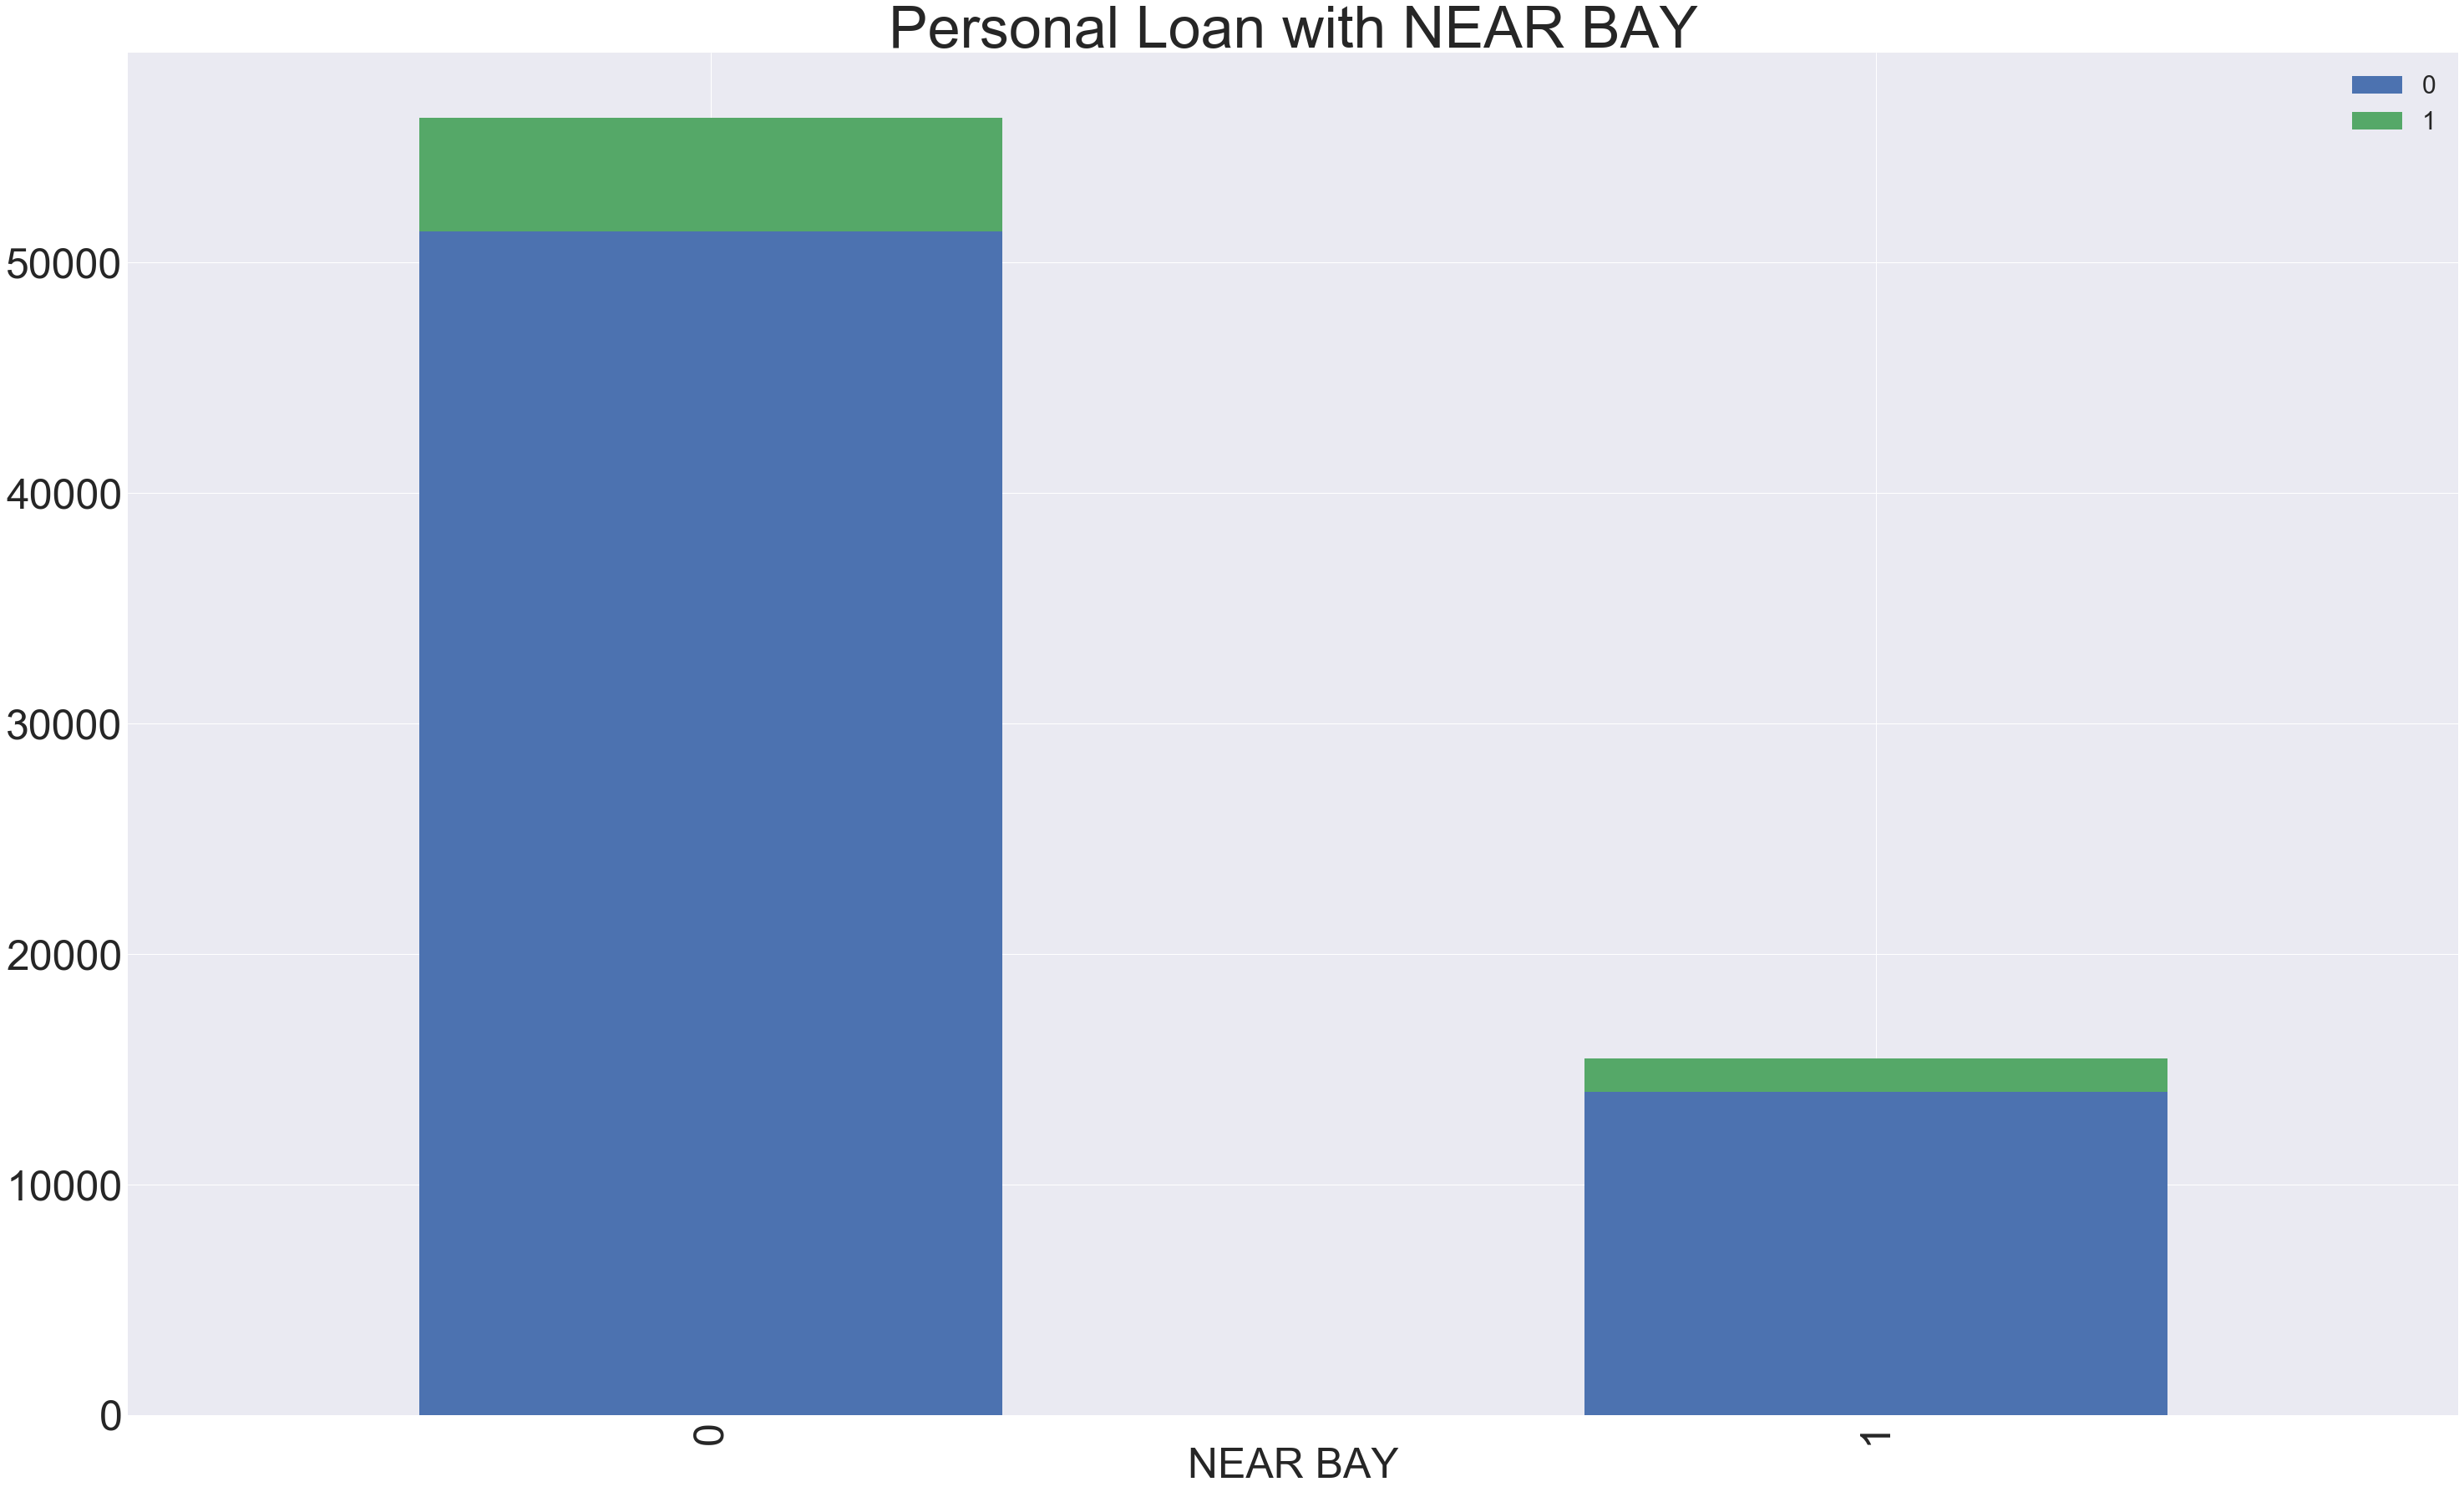

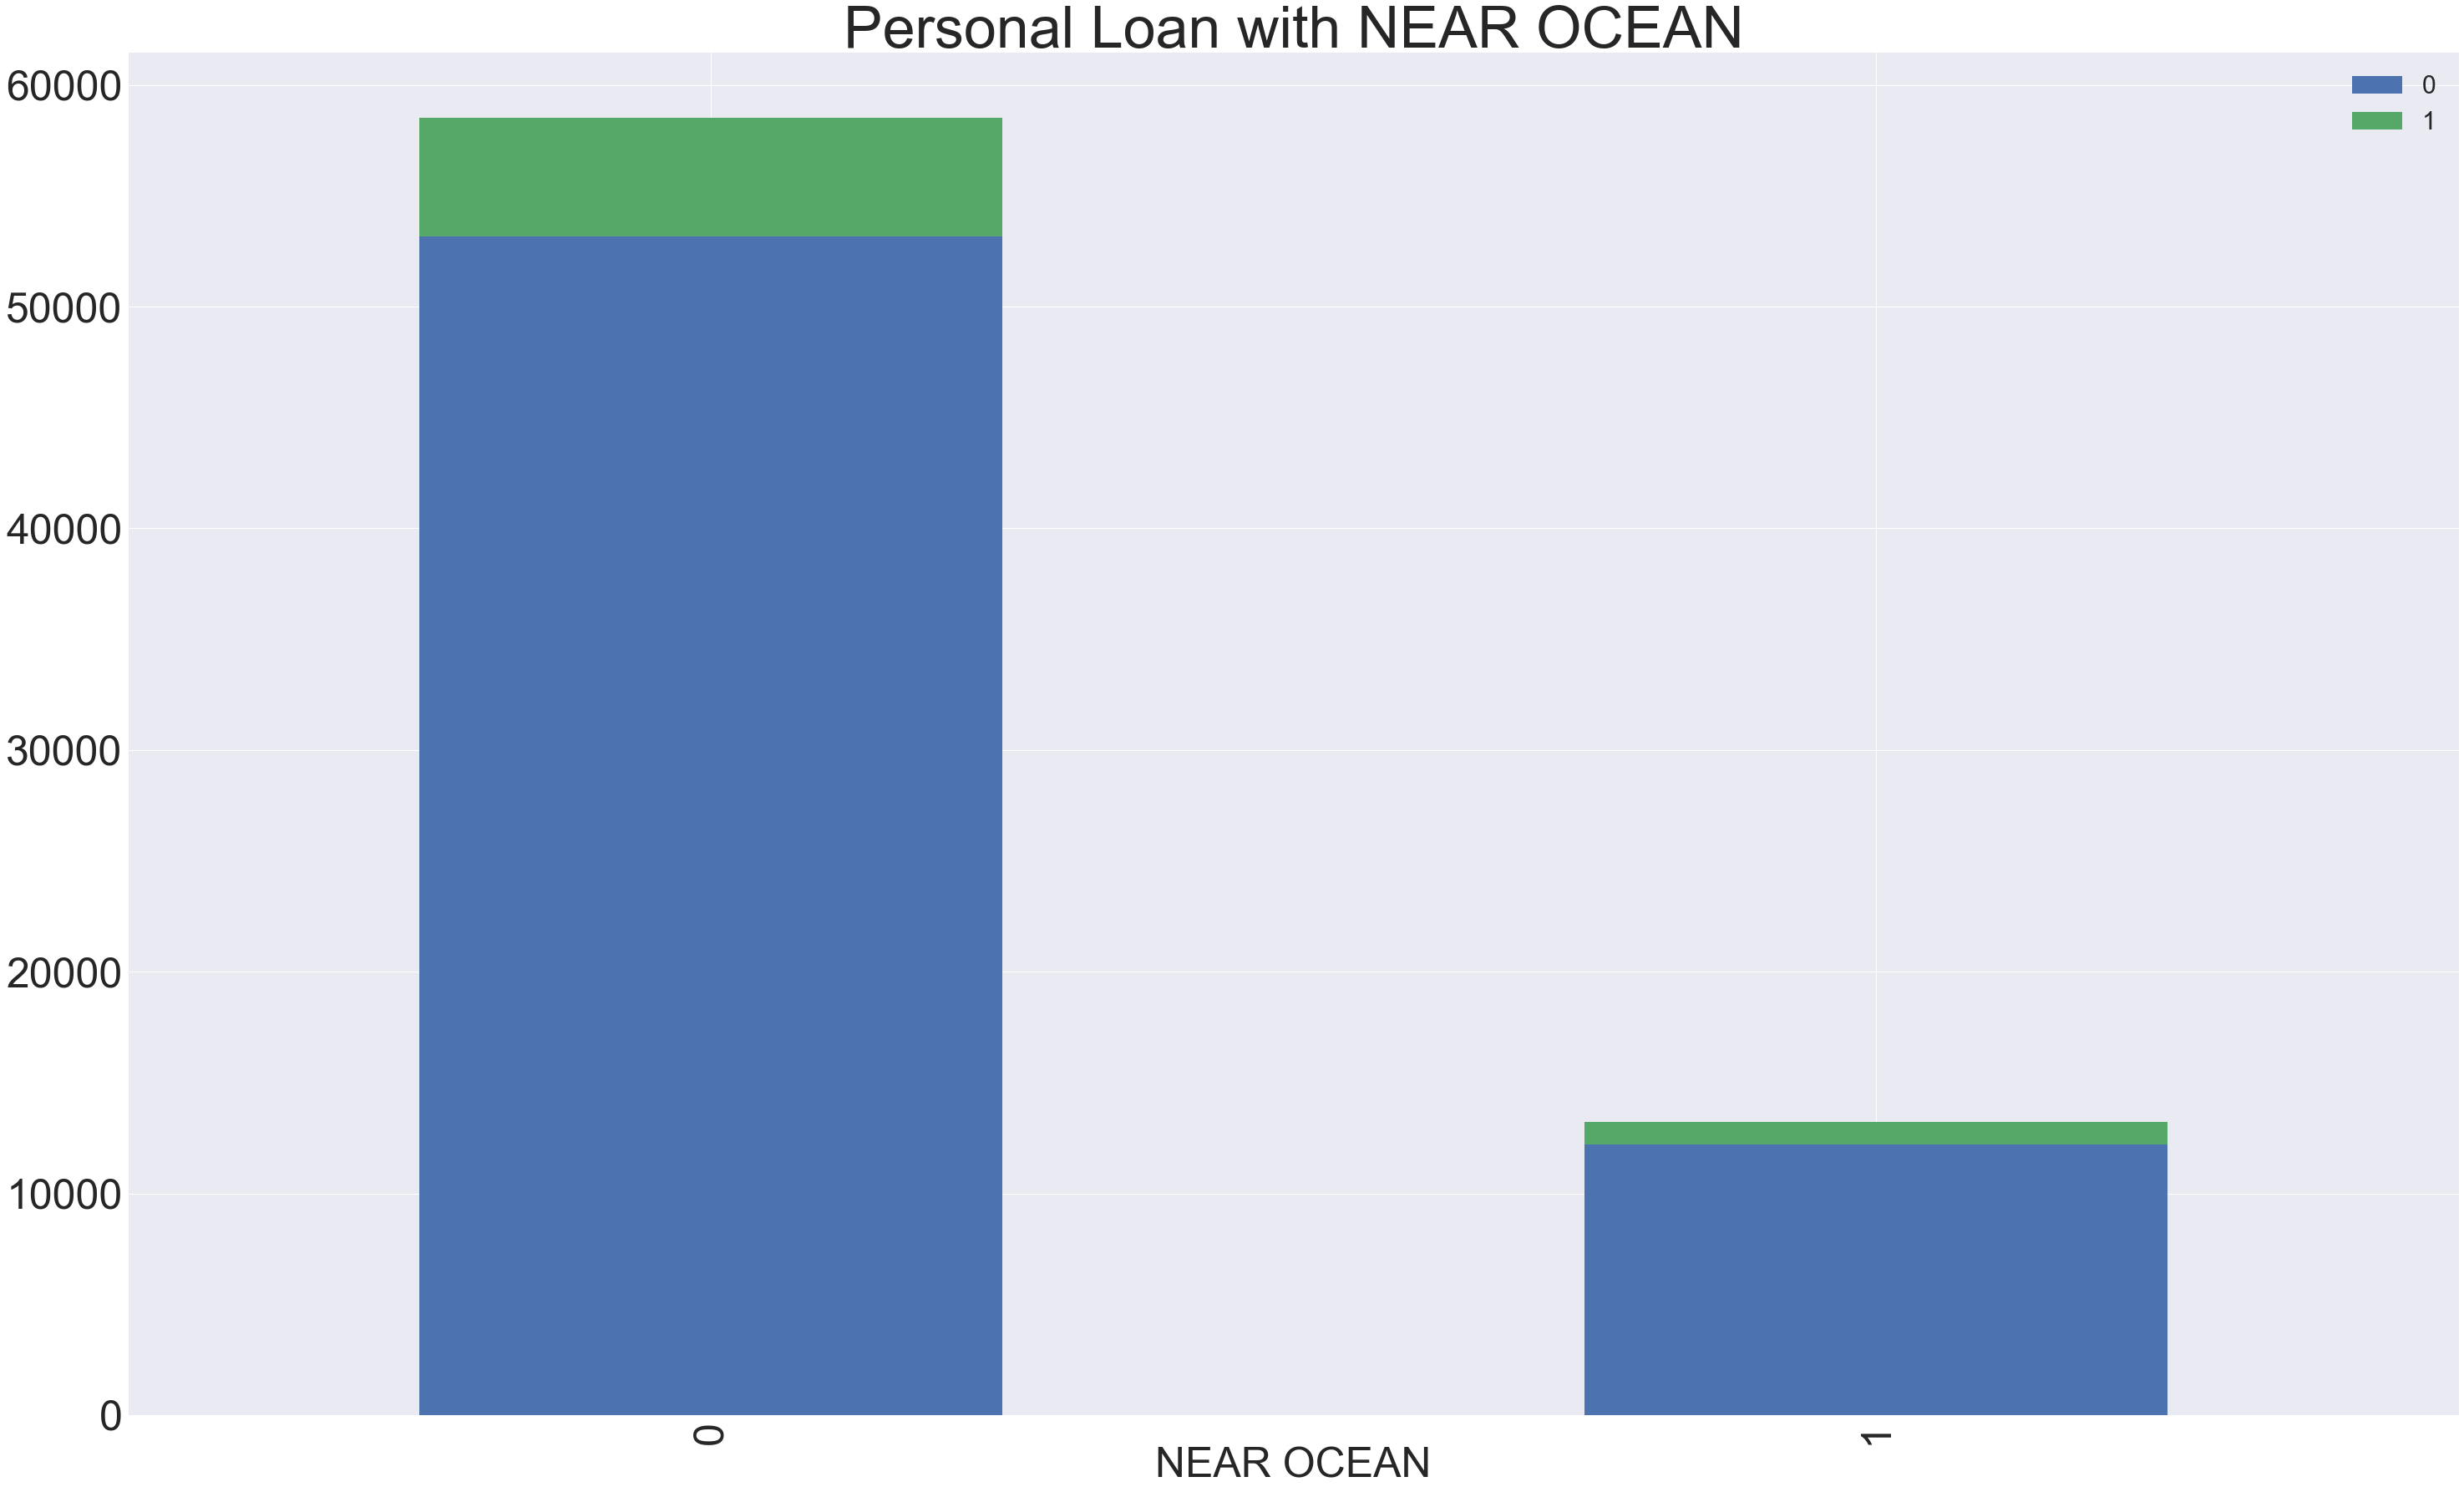

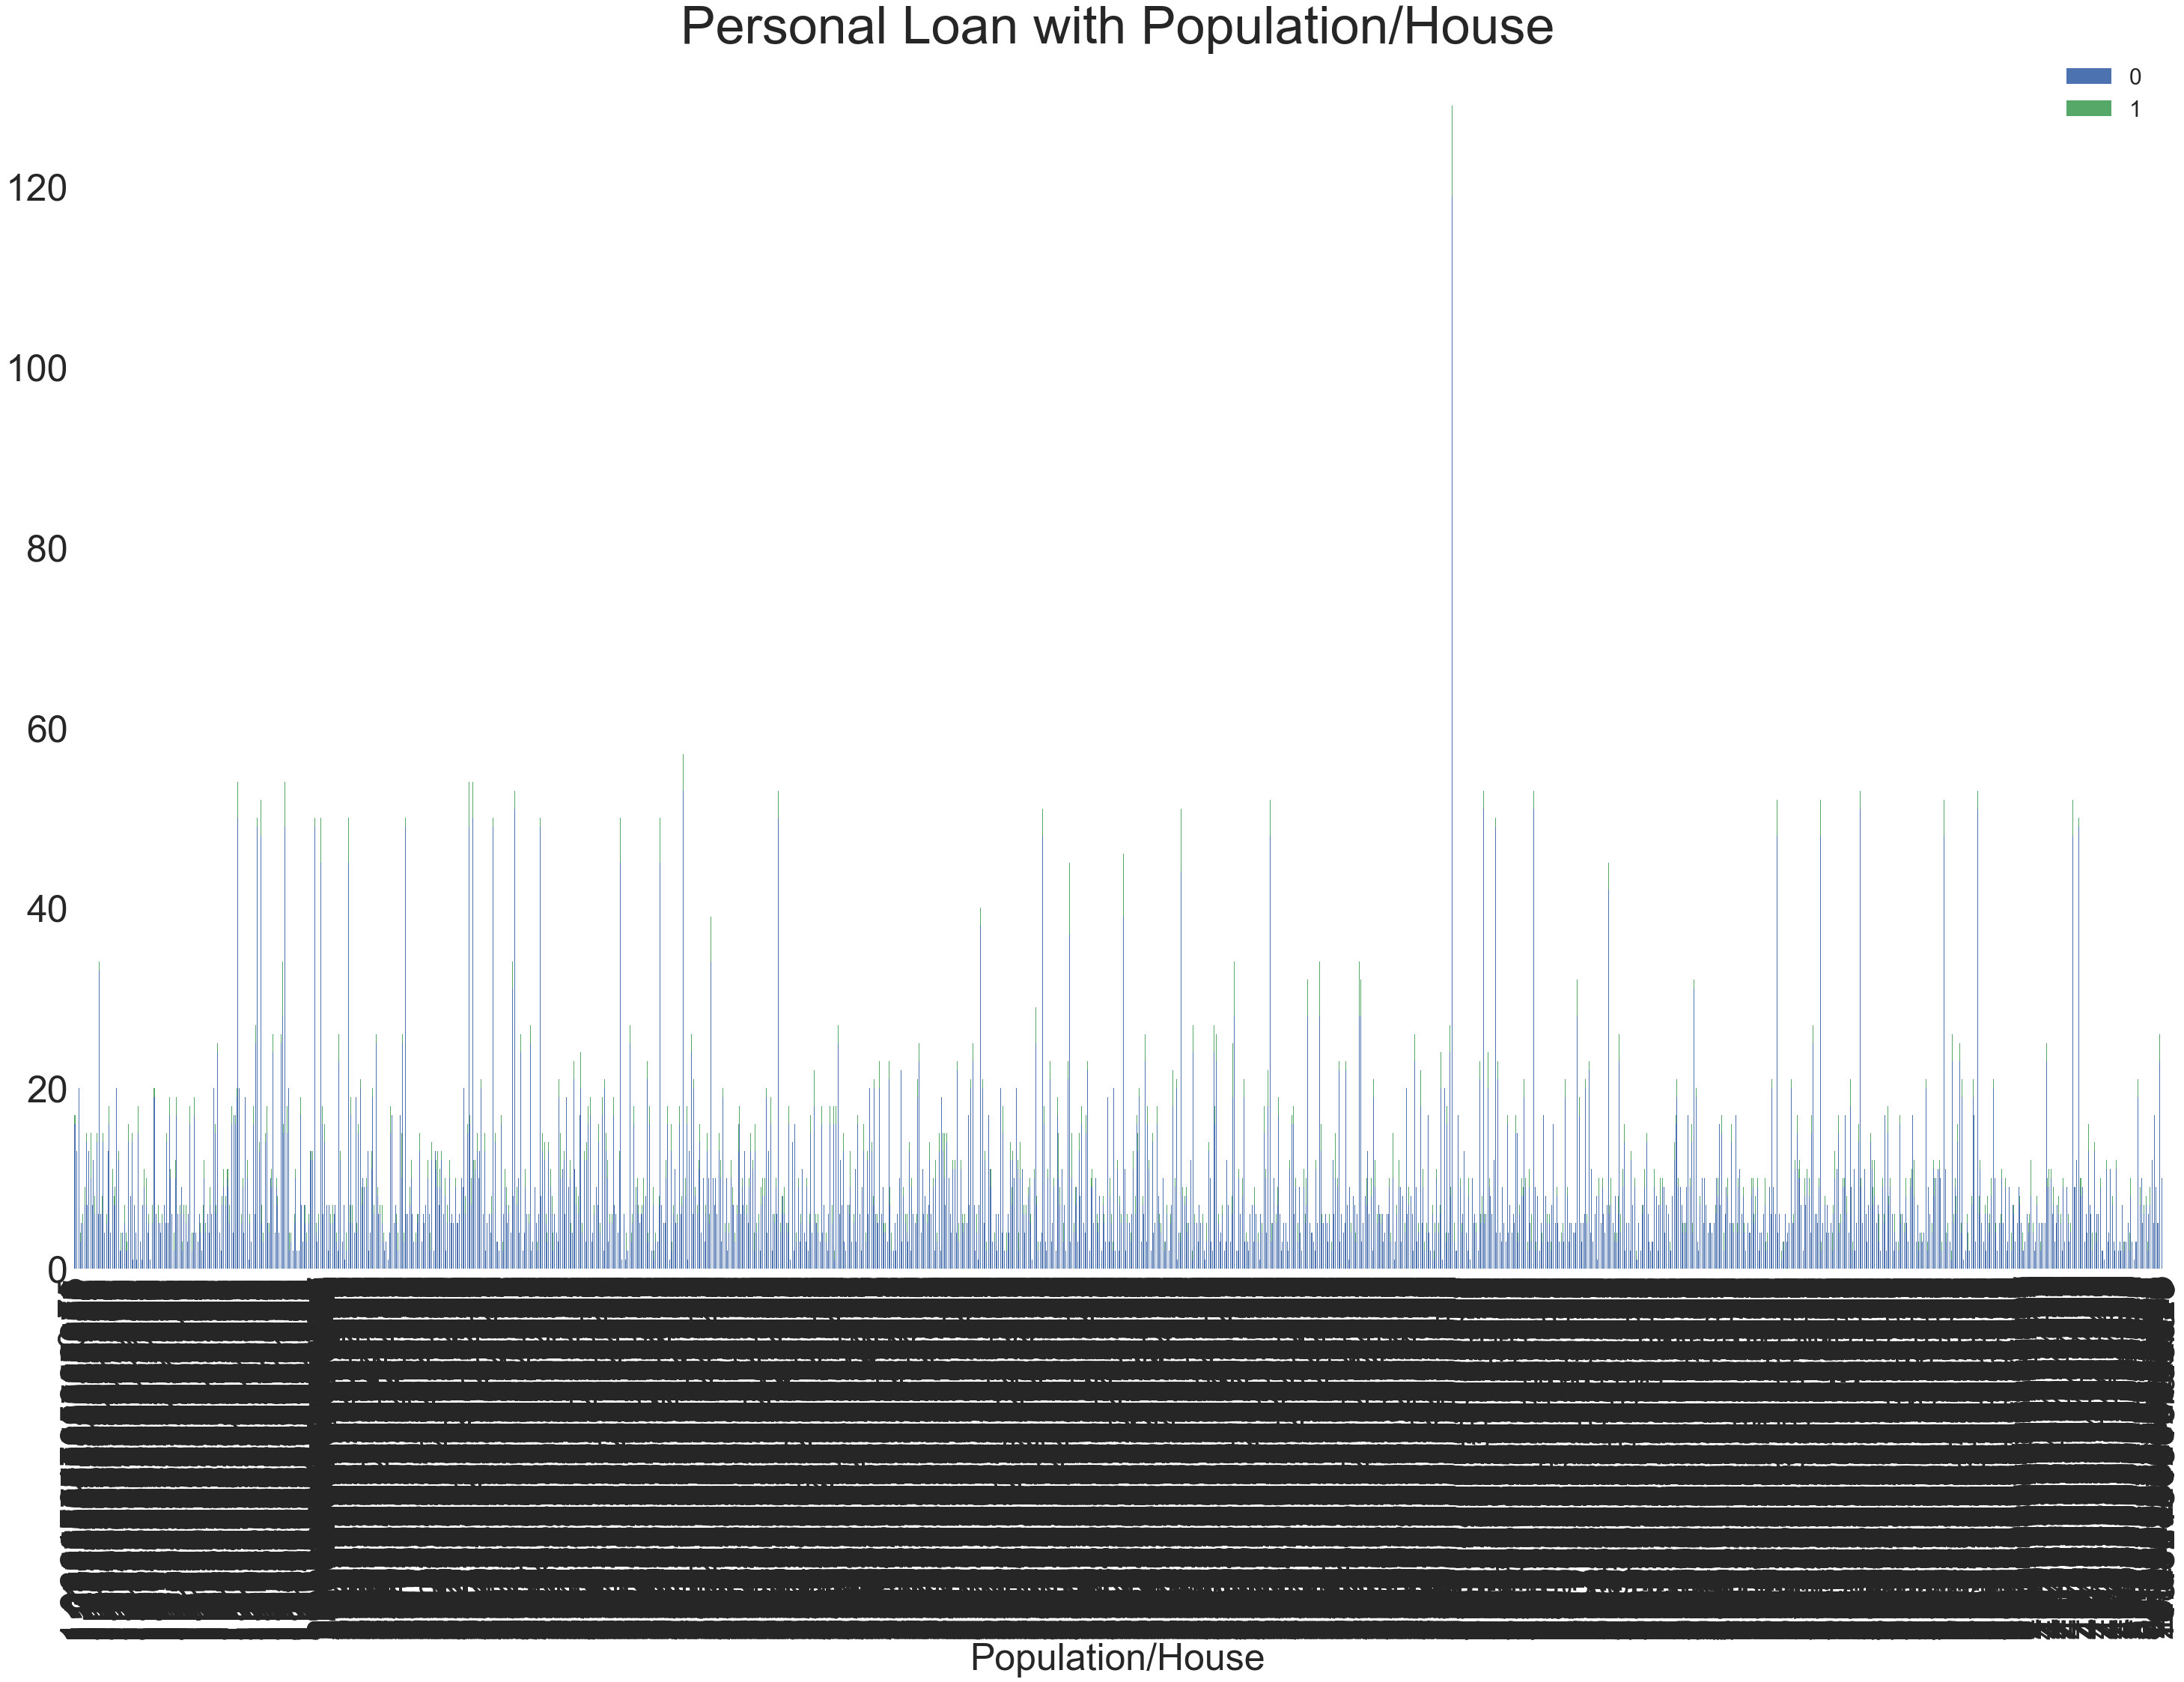

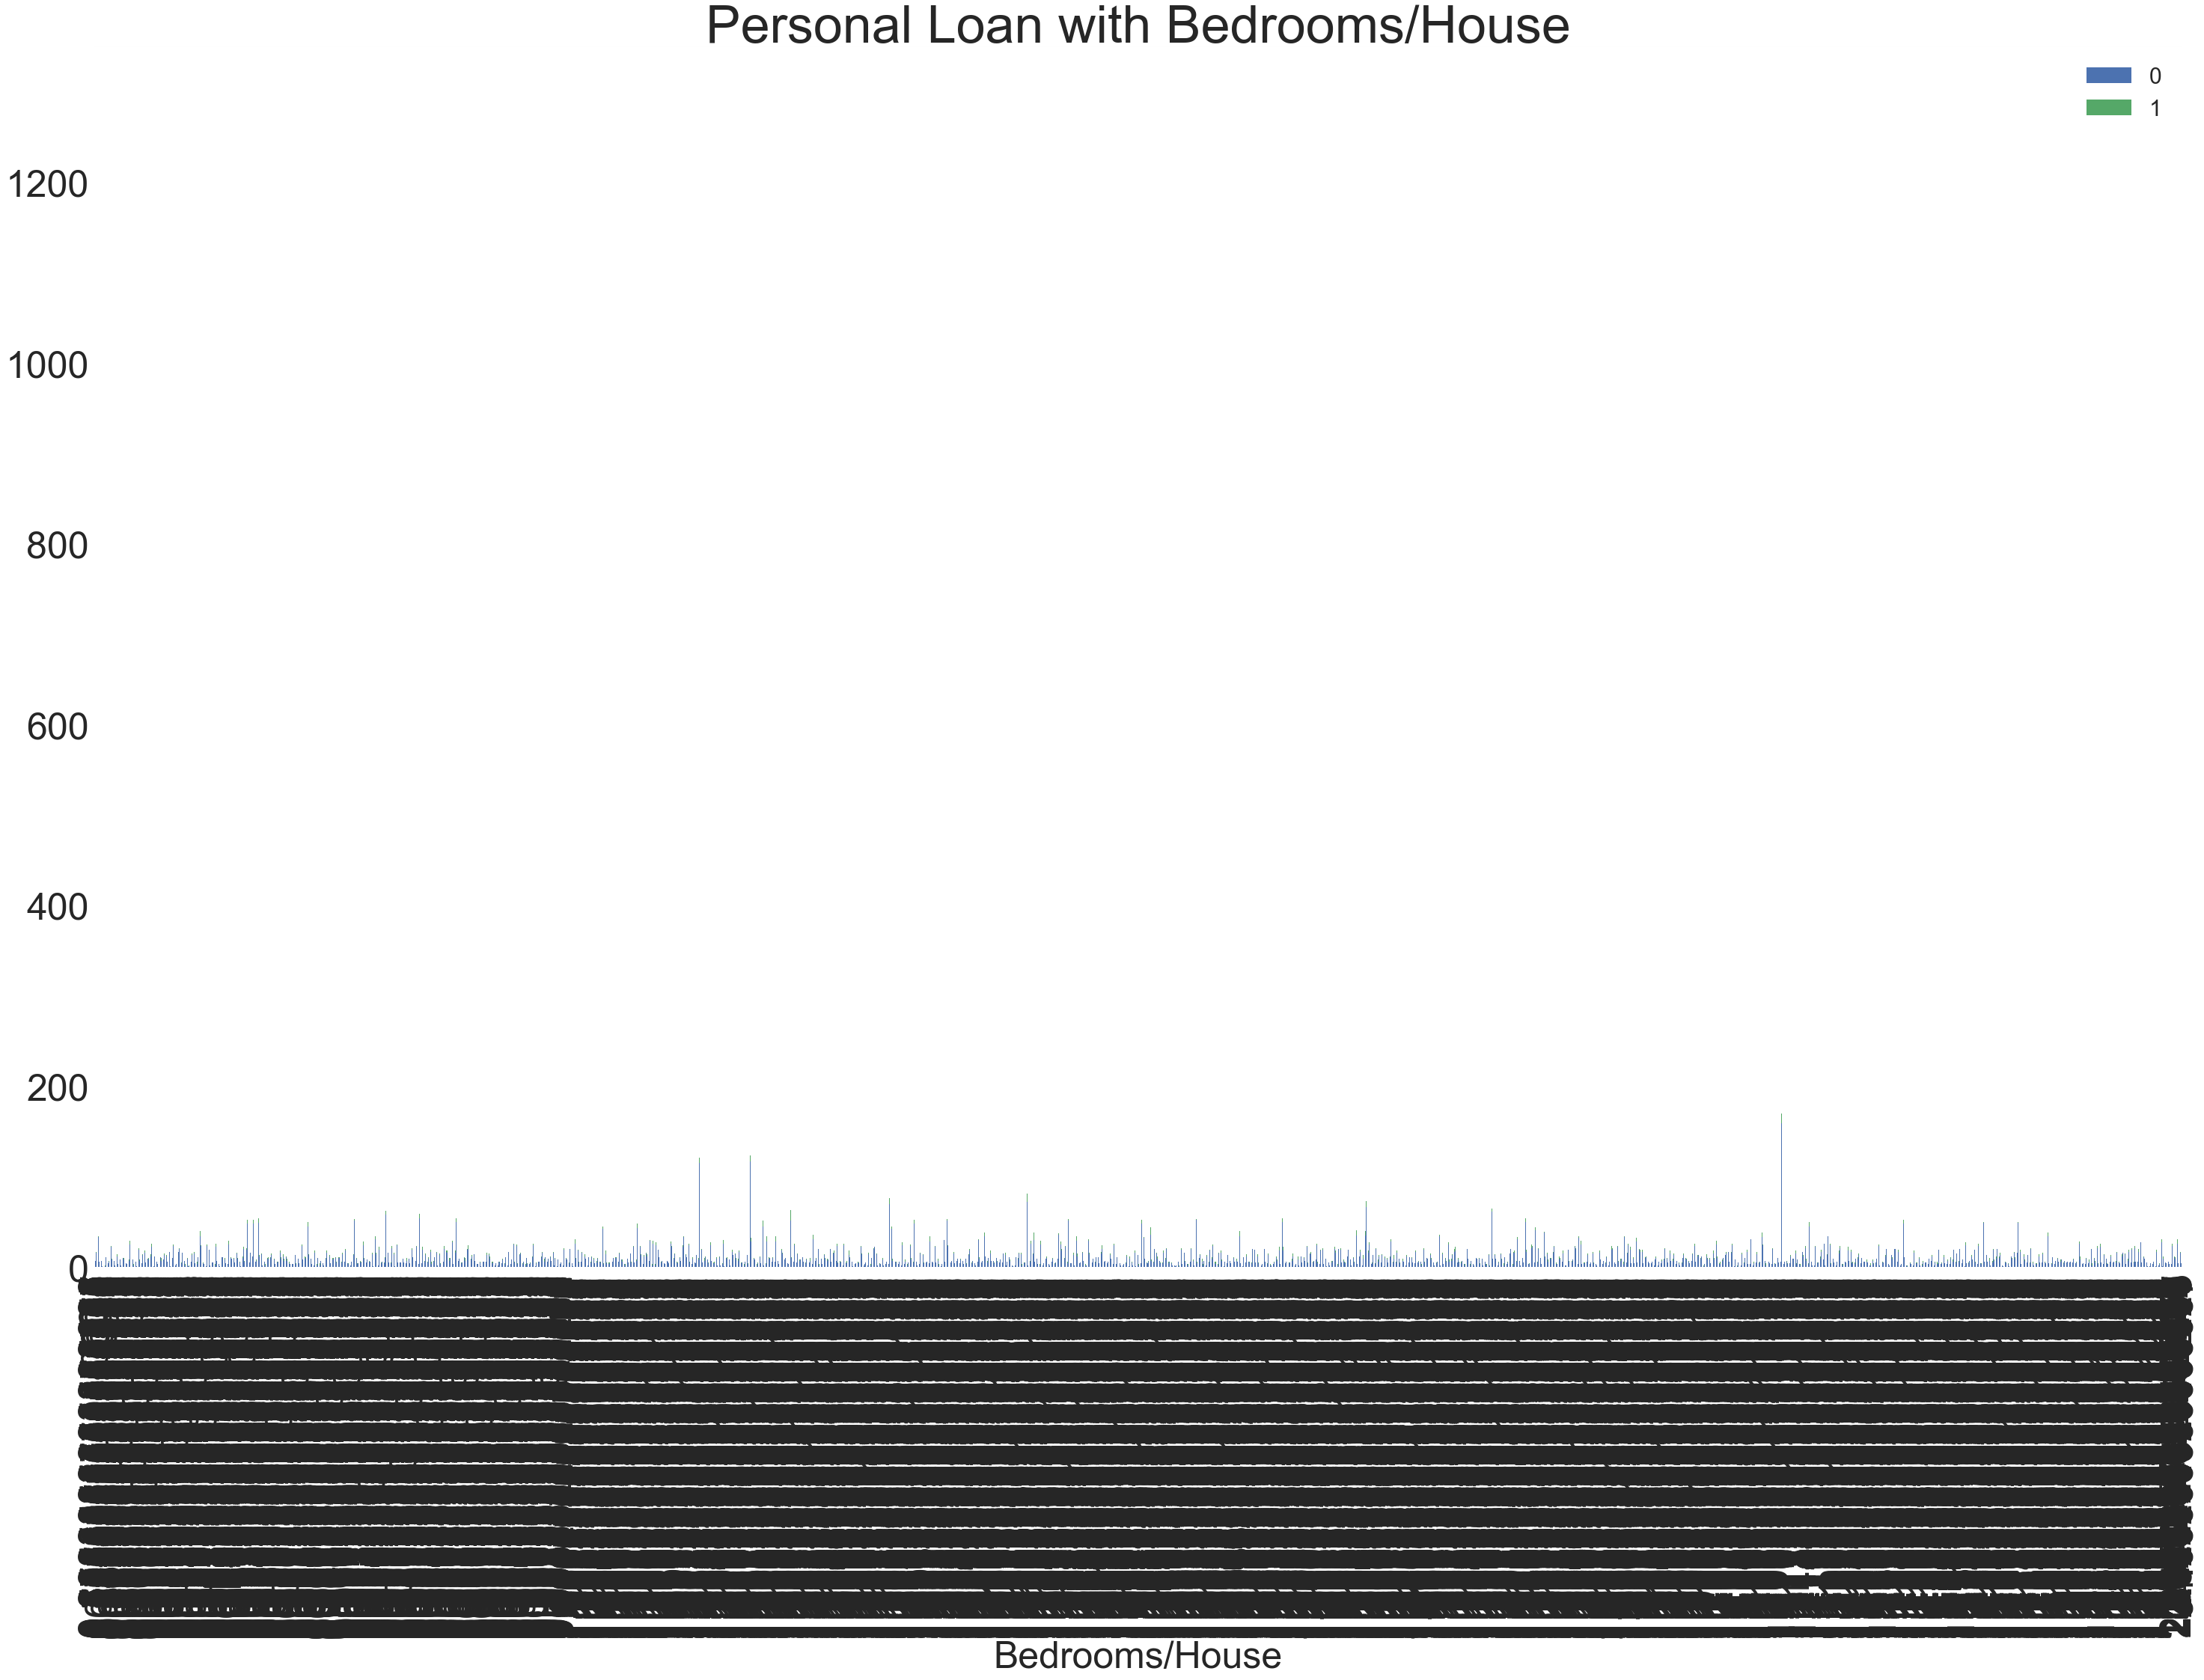

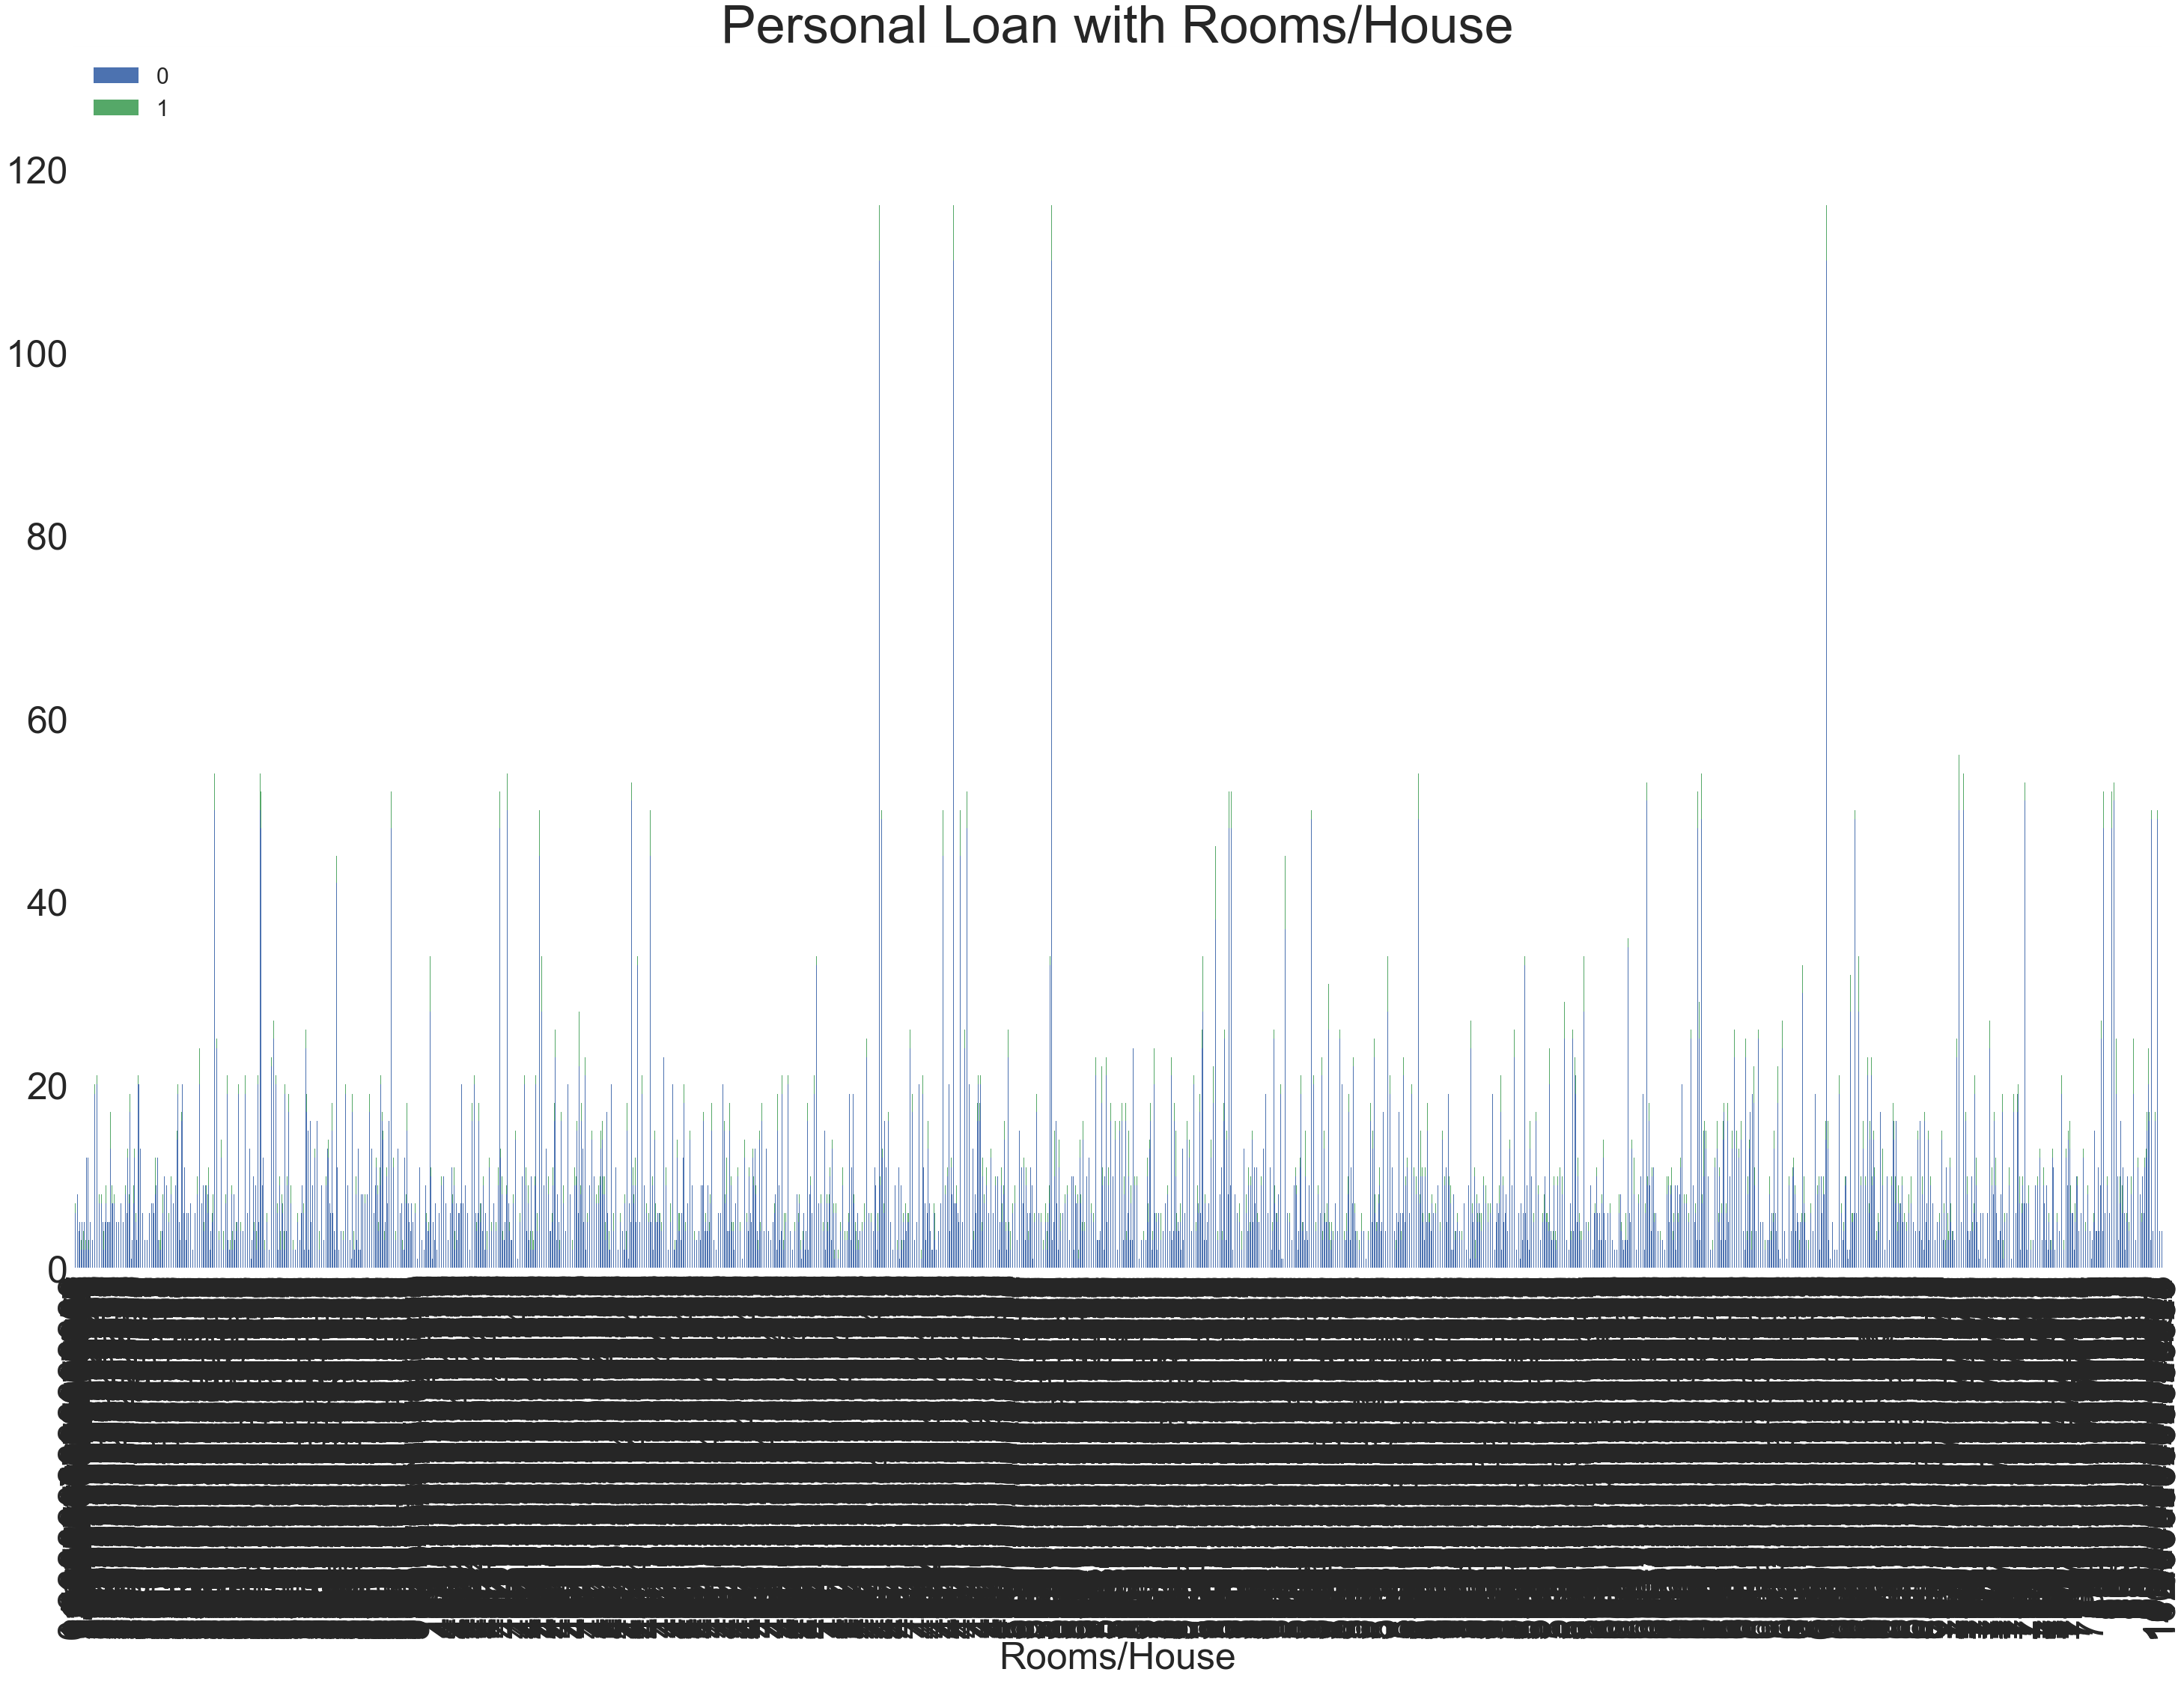

In [277]:
#Now we will go through every column to determine the relationship with the target variable - Personal Loan

for i in list_index:
    bank_cali_merge_new.groupby([i, "Personal Loan"]).size().unstack().plot(kind='bar', stacked=True, figsize=(50,30))
    plt.title(f'Personal Loan with {i}' , fontsize = 70)
    plt.legend(fontsize = 30)
    plt.xticks(fontsize = 50)
    plt.yticks(fontsize = 50)
  
    plt.xlabel(i, fontsize = 50)
    plt.style.use('seaborn')

# Baseline Model - Logistic Regression

In [288]:
#Changing ZIP Code to integer type

bank_cali_merge_new['ZIP Code'].astype(int)

0        91107
1        91107
2        91107
3        91107
4        91107
5        91107
6        91107
7        91107
8        91107
9        91107
10       91107
11       91107
12       91107
13       91107
14       91107
15       91107
16       91107
17       91107
18       91107
19       91107
20       91107
21       91107
22       91107
23       91107
24       91107
25       94112
26       94112
27       94112
28       94112
29       94112
         ...  
71724    94404
71725    94404
71726    94404
71727    94404
71728    94404
71729    94404
71730    94404
71731    94404
71732    94404
71733    94404
71734    94404
71735    94404
71736    94404
71737    94404
71738    94404
71739    94404
71740    94404
71741    94404
71742    94404
71743    94404
71744    94404
71745    94598
71746    94598
71747    94598
71748    94598
71749    94598
71750    94598
71751    94598
71752    94598
71753    94598
Name: ZIP Code, Length: 71754, dtype: int64

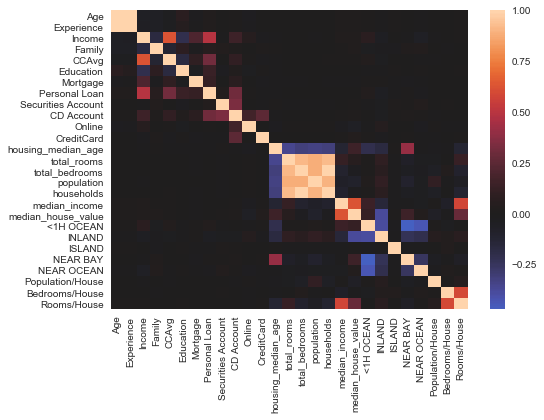

In [343]:
sns.heatmap(bank_cali_merge_new.corr(), center=0);

In [394]:
bank_cali_merge_new.head()

Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   30           4      60    91107       4    2.2          2         0   
2   35          10     200    91107       2    3.0          1       458   
3   54          30      93    91107       1    2.7          2         0   
4   37          12     169    91107       2    5.2          3       249   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   0           0       1           0   
2              0                   0           0       0           0   
3              0                   0           0       1           0   
4              1                   0           0       1           0   

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                38.0       2981.0           432.0      1063.0       437.0   
1                38.0       2981.0           432.0      1063.0       437.0   
2                38.0       2981.0           432.0      1063.0       437.0   
3                38.0       2981.0           432.0      1063.0       437.0   
4                38.0       2981.0           432.0      1063.0       437.0   

   median_income  median_house_value  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0         6.5254            365000.0          0       1       0         0   
1         6.5254            365000.0          0       1       0         0   
2         6.5254            365000.0          0       1       0         0   
3         6.5254            365000.0          0       1       0         0   
4         6.5254            365000.0          0       1       0         0   

   NEAR OCEAN  Population/House  Bedrooms/House  Rooms/House  
0           0          2.432494        0.988558      6.82151  
1           0          2.432494        0.988558      6.82151  
2           0          2.432494        0.988558      6.82151  
3           0          2.432494        0.988558      6.82151  
4           0          2.432494        0.988558      6.82151

In [344]:
#Defining our target variables

X = bank_cali_merge_new.drop(['Age', 'total_rooms', 'households','Personal Loan', 'INLAND'], axis=1)
y = bank_cali_merge_new['Personal Loan']

## Splitting X data into train and test datasets

In [345]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=44)

In [346]:
print(f'My training datasets shape is {X_train.shape}')
print(f'My final test datasets shape is {X_test.shape}')
print(f'My training set dependant variable shape is {y_train.shape}')
print(f'My test set dependant variable shape is {y_test.shape}')

My training datasets shape is (57403, 23)
My final test datasets shape is (14351, 23)
My training set dependant variable shape is (57403,)
My test set dependant variable shape is (14351,)


## Splitting train data into train and validation datasets

In [347]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=52)

## Scaling the Datasets using Standard Scaler

In [348]:
from sklearn.preprocessing import StandardScaler

#Instantiate the class
ss = StandardScaler()

ss.fit(X_train_v)

X_train_v = ss.transform(X_train_v)
X_val = ss.transform(X_val)

X_test = ss.transform(X_test)

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_pa

In [349]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(fit_intercept=True, penalty='l2', solver='lbfgs', class_weight='balanced')
model_log.fit(X_train_v, y_train_v)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [350]:
#Checking the score for the validation data set

model_log.score(X_val, y_val)

0.8913857677902621

89.2% is a good score for our validation data set

## Measuring the accuracy of the model and ROC_AUC score

In [359]:
from sklearn.metrics import accuracy_score, roc_auc_score

### Training

In [360]:
y_train_pred = model_log.predict_proba(X_train_v)[:,1] #We using predict proba to get our accuracy values for the area under the ROC curve

In [361]:
print("ROC_AUC of training model = ", roc_auc_score(y_train_v, y_train_pred))

ROC_AUC of training model =  0.964643346802106


### Validation

In [362]:
y_val_pred = model_log.predict(X_val) #to measure our validation performance and get our accuracy score

print("Accuracy of validation model = ", accuracy_score(y_val,y_val_pred))

print("ROC_AUC of validation model = ", roc_auc_score(y_val, y_val_pred))

Accuracy of validation model =  0.8913857677902621
ROC_AUC of validation model =  0.9010615506486163


## Hyperparameter Tuning of the Baseline Logistic Regression Model

In [363]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [364]:
skf = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

#Establishing our parameters
param_grid = {'penalty':['l1','l2'],
             'C':[0.001, 0.01, 0.1, 1,10,100]}

optmodel_log = GridSearchCV(LogisticRegression(class_weight='balanced', solver='liblinear'),
                            param_grid, 
                            cv=skf, 
                            scoring='roc_auc',
                           return_train_score=True)

#Fitting the optimal model with our training data as we are doing cross validation
optmodel_log.fit(X_train,y_train)
                            

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [365]:
#We will print a dataframe enlisting the details of our tests. This will show the number of tests carried out 
#indicated by the split test score and number of rows

pd.DataFrame(optmodel_log.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       19.980732     22.635230         0.027085        0.002931   0.001   
1        1.259332      0.208033         0.023116        0.001165   0.001   
2        3.366662      0.244345         0.025329        0.002315    0.01   
3        1.517403      0.158969         0.024130        0.001722    0.01   
4       58.809059     26.600940         0.024695        0.001896     0.1   
5        1.701866      0.206520         0.021766        0.000748     0.1   
6       45.258305      8.094936         0.023296        0.000468       1   
7        1.825594      0.085541         0.021349        0.000227       1   
8       94.206107     27.199872         0.031733        0.005273      10   
9        2.242660      0.173316         0.027125        0.003394      10   
10      56.593931     30.164692         0.026282        0.002502     100   
11       2.528658      0.455966         0.038600        0.018120     100   

   param_penalty                         params  split0_test_score  \
0             l1  {'C': 0.001, 'penalty': 'l1'}           0.942994   
1             l2  {'C': 0.001, 'penalty': 'l2'}           0.949672   
2             l1   {'C': 0.01, 'penalty': 'l1'}           0.958775   
3             l2   {'C': 0.01, 'penalty': 'l2'}           0.958106   
4             l1    {'C': 0.1, 'penalty': 'l1'}           0.960445   
5             l2    {'C': 0.1, 'penalty': 'l2'}           0.960396   
6             l1      {'C': 1, 'penalty': 'l1'}           0.961066   
7             l2      {'C': 1, 'penalty': 'l2'}           0.960557   
8             l1     {'C': 10, 'penalty': 'l1'}           0.961143   
9             l2     {'C': 10, 'penalty': 'l2'}           0.960537   
10            l1    {'C': 100, 'penalty': 'l1'}           0.961149   
11            l2    {'C': 100, 'penalty': 'l2'}           0.960531   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.949428           0.950946           0.949904   
1            0.955616           0.956906           0.955224   
2            0.963073           0.964600           0.962765   
3            0.962603           0.964064           0.962171   
4            0.964053           0.965706           0.963514   
5            0.964004           0.965723           0.963223   
6            0.964210           0.965873           0.963586   
7            0.964004           0.965753           0.963527   
8            0.964180           0.965917           0.963578   
9            0.963833           0.965629           0.963563   
10           0.964187           0.965976           0.963589   
11           0.964037           0.965806           0.963263   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.953295         0.949313        0.003430               12   
1            0.958455         0.955174        0.002974               11   
2            0.965926         0.963028        0.002409                9   
3            0.965604         0.962510        0.002510               10   
4            0.966801         0.964104        0.002171                5   
5            0.966810         0.964031        0.002211                8   
6            0.966986         0.964344        0.002033                3   
7            0.966785         0.964125        0.002137                4   
8            0.967027         0.964369        0.002027                2   
9            0.966789         0.964070        0.002127                7   
10           0.967034         0.964387        0.002034                1   
11           0.966786         0.964084        0.002171                6   

    split0_train_score  split1_train_score  split2_train_score  \
0             0.950212            0.949740            0.949075   
1             0.956471            0.955531            0.955019   
2             0.964250            0.963321            0.963033   
3             0.963764            0.962938  

In [387]:
#We will print the best parameters and score for our results

print("Values of the optimised hyperparameters\n for the best model was:\n", optmodel_log.best_params_)

Values of the optimised hyperparameters
 for the best model was:
 {'C': 100, 'penalty': 'l1'}


In [388]:
print("Best score of the optimised hyperparameters\n for the best model was:\n", optmodel_log.best_score_)

Best score of the optimised hyperparameters
 for the best model was:
 0.9643868006140701


96.4% is a great result and is an improvement on the initial 90.1% achieved from our validation data

# Random Forest Classifier

Our first learner model will be the Random Forest Classifier

In [367]:
from sklearn.ensemble import RandomForestClassifier

In [368]:
#Instantiate the model

model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', class_weight='balanced',
                                 max_depth=10, min_samples_leaf=5, random_state=50)

In [369]:
model_rf.fit(X_train_v,y_train_v)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=50, verbose=0, warm_start=False)

## Measuring the accuracy of the model and ROC_AUC scores

### Training

In [370]:
y_train_pred_rf = model_rf.predict_proba(X_train_v)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred_rf))

ROC_AUC of model = 0.9999799026971259


### Validation

In [371]:
y_val_pred_rf = model_rf.predict_proba(X_val)[:,1]

print("ROC_AUC of model:", roc_auc_score(y_val,y_val_pred_rf))

ROC_AUC of model: 0.9998857641535405


## Hyperparameter Tuning of the Random Forest Classifier

In [377]:
param_grid_rf = {'max_depth': [3,5,7], 'min_samples_leaf': [5,10,15,20]}

#Defining the parameters of random forest gridsearch

optmodel_rf = GridSearchCV(RandomForestClassifier(random_state=48, class_weight='balanced', n_estimators=100),
                           param_grid_rf, 
                          cv=skf, 
                          scoring='roc_auc',
                          return_train_score=True)

#fitting on the whole training dataset
optmodel_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=48, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [378]:
#Producing the dataframe listing all the tests of our hyperparameter tuning

pd.DataFrame(optmodel_rf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.471061      0.361756         0.081632        0.001587   
1        2.636412      0.812989         0.096273        0.017615   
2        2.186231      0.161584         0.101053        0.040452   
3        2.083273      0.224759         0.081763        0.001801   
4        3.114288      0.290102         0.098148        0.012783   
5        2.962624      0.060443         0.104712        0.009665   
6        3.342961      0.507580         0.093378        0.001262   
7        2.752698      0.073345         0.091620        0.000858   
8        3.360820      0.063016         0.107162        0.012926   
9        3.359502      0.026354         0.101259        0.000470   
10       3.389430      0.069274         0.102577        0.001541   
11       3.408430      0.102556         0.102168        0.001251   

   param_max_depth param_min_samples_leaf  \
0                3                      5   
1                3                     10   
2                3                     15   
3                3                     20   
4                5                      5   
5                5                     10   
6                5                     15   
7                5                     20   
8                7                      5   
9                7                     10   
10               7                     15   
11               7                     20   

                                      params  split0_test_score  \
0    {'max_depth': 3, 'min_samples_leaf': 5}           0.987613   
1   {'max_depth': 3, 'min_samples_leaf': 10}           0.987290   
2   {'max_depth': 3, 'min_samples_leaf': 15}           0.987288   
3   {'max_depth': 3, 'min_samples_leaf': 20}           0.987263   
4    {'max_depth': 5, 'min_samples_leaf': 5}           0.996508   
5   {'max_depth': 5, 'min_samples_leaf': 10}           0.996504   
6   {'max_depth': 5, 'min_samples_leaf': 15}           0.996479   
7   {'max_depth': 5, 'min_samples_leaf': 20}           0.996329   
8    {'max_depth': 7, 'min_samples_leaf': 5}           0.999170   
9   {'max_depth': 7, 'min_samples_leaf': 10}           0.999111   
10  {'max_depth': 7, 'min_samples_leaf': 15}           0.998833   
11  {'max_depth': 7, 'min_samples_leaf': 20}           0.998762   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.985575           0.986758           0.984519   
1            0.985572           0.986757           0.984427   
2            0.985459           0.986764           0.984419   
3            0.985766           0.986749           0.984407   
4            0.995679           0.997207           0.995951   
5            0.995699           0.997021           0.996282   
6            0.995585           0.996984           0.996387   
7            0.995497           0.997093           0.996150   
8            0.998977           0.999380           0.998890   
9            0.998967           0.999275           0.998782   
10           0.998713           0.999178           0.998609   
11           0.998808           0.999253           0.998618   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.987674         0.986428        0.001220                9   
1            0.987646         0.986338        0.001186               11   
2            0.987636         0.986313        0.001202               12   
3            0.987636         0.986364        0.001163               10   
4            0.996861         0.996441        0.000564                5   
5            0.996556         0.996413        0.000430                6   
6            0.996562         0.996399        0.000456                7   
7            0.996593         0.996332        0.000525                8   
8            0.999170         0.999118        0.000171                1   
9            0.998875         0.999002        0.000174                2   
10           0.9

In [386]:
#Finding the best parameters for our tuning

print("Values of the optimised parameters\n for the best model were:\n", optmodel_rf.best_params_)

Values of the optimised parameters
 for the best model were:
 {'max_depth': 7, 'min_samples_leaf': 5}


In [385]:
print("Best score of the optimised hyperparameters\n for the best model was:\n", optmodel_rf.best_score_)

Best score of the optimised hyperparameters
 for the best model was:
 0.9991175741339117


# Decision Trees

In [389]:
from sklearn.tree import DecisionTreeClassifier

In [404]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=10, 
                                  random_state=50, class_weight='balanced')

In [405]:
model_dt.fit(X_train_v,y_train_v)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [407]:
X.columns

Index(['Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'housing_median_age', 'total_bedrooms', 'population', 'median_income',
       'median_house_value', '<1H OCEAN', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'Population/House', 'Bedrooms/House', 'Rooms/House'],
      dtype='object')

## Measuring accuracy of the model and ROC_AUC scores

### Training

In [408]:
y_train_pred_dt = model_dt.predict_proba(X_train_v)[:,1]

print("ROC_AUC of model =", roc_auc_score(y_train_v, y_train_pred_dt))

ROC_AUC of model = 0.9521545072053388


### Validation

In [409]:
y_val_pred_dt = model_dt.predict_proba(X_val)[:,1]

print("ROC_AUC of model:", roc_auc_score(y_val,y_val_pred_dt))

ROC_AUC of model: 0.954612131846894


## Hyperparameter Tuning of the Decision Tree Classifier

In [437]:
#Establishing our parameter grid

param_grid_dt = {'max_depth': range(1,10), 'min_samples_leaf': [5,10,15,20,25]}

In [438]:
optmodel_dt = GridSearchCV(DecisionTreeClassifier(random_state=55, class_weight='balanced'), 
                           param_grid_dt,
                           cv=skf,  
                           scoring='roc_auc', 
                           return_train_score=True)

#Fitting the model on the whole training dataset
optmodel_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=55,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 10), 'min_samples_leaf': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [439]:
pd.DataFrame(optmodel_dt.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.124440      0.015455         0.020615        0.002137   
1        0.115697      0.013917         0.020441        0.001731   
2        0.109468      0.001278         0.018825        0.000719   
3        0.108289      0.000488         0.019198        0.000714   
4        0.124039      0.016174         0.026410        0.006930   
5        0.165797      0.002027         0.021560        0.001136   
6        0.166764      0.003203         0.021525        0.001132   
7        0.162951      0.012239         0.019935        0.001188   
8        0.148514      0.002025         0.020286        0.001353   
9        0.151120      0.008666         0.019615        0.000706   
10       0.165563      0.008812         0.020345        0.002368   
11       0.164712      0.010228         0.019633        0.000757   
12       0.169901      0.009873         0.024705        0.007682   
13       0.164928      0.009348         0.019967        0.000832   
14       0.164331      0.009147         0.019047        0.000452   
15       0.176635      0.010766         0.019956        0.000981   
16       0.176554      0.009655         0.018786        0.000125   
17       0.175983      0.007776         0.019486        0.001106   
18       0.176918      0.008085         0.019023        0.000899   
19       0.176083      0.009973         0.018919        0.000363   
20       0.185131      0.006473         0.019442        0.000679   
21       0.185163      0.005881         0.019298        0.000490   
22       0.185293      0.006132         0.019414        0.001014   
23       0.186596      0.006563         0.018973        0.000371   
24       0.187076      0.008220         0.019426        0.001171   
25       0.192344      0.006115         0.019933        0.001215   
26       0.187024      0.005682         0.019332        0.000807   
27       0.188137      0.006189         0.019562        0.001051   
28       0.187797      0.006901         0.019388        0.000613   
29       0.187863      0.006299         0.018872        0.000265   
30       0.188556      0.005184         0.019643        0.001033   
31       0.190944      0.006717         0.019116        0.000347   
32       0.198685      0.017741         0.019666        0.000308   
33       0.189095      0.006362         0.019081        0.000071   
34       0.189411      0.005763         0.019205        0.000478   
35       0.190418      0.006899         0.019507        0.001060   
36       0.193088      0.007386         0.019640        0.000607   
37       0.206461      0.005094         0.021706        0.001730   
38       0.205792      0.016753         0.020708        0.001328   
39       0.203992      0.008388         0.022404        0.000756   
40       0.212906      0.012991         0.021231        0.001168   
41       0.215713      0.012121         0.023263        0.001552   
42       0.193220      0.007168         0.020137        0.001188   
43       0.195789      0.007728         0.022006        0.004105   
44       0.197224      0.011305         0.019999        0.000967   

   param_max_depth param_min_samples_leaf  \
0                1                      5   
1                1                     10   
2                1                     15   
3                1                     20   
4                1                     25   
5                2                      5   
6                2                     10   
7                2                     15   
8                2                     20   
9                2                     25   
10               3                      5   
11               3                     10   
12               3                     15   
13               3                     20   
14               3                     25   
15               4                      5   
16               4                     10   
17               4                     15   
18               4  

In [442]:
#Obtaining the best parameters for our result

print("The value of the optimised hyperparameters\n for our model was:\n", optmodel_dt.best_params_)

The value of the optimised hyperparameters
 for our model was:
 {'max_depth': 9, 'min_samples_leaf': 15}


In [443]:
print("The value of the best score\n obtained for our hyperparameters was:\n", optmodel_dt.best_score_)

The value of the best score
 obtained for our hyperparameters was:
 0.9991243306166198


We can see we have improved on our score from prior to producing the hyperparameter optimisation. After tuning we have obtained a score of 99.91%